In [2]:
from sklearn.kernel_ridge import KernelRidge
import numpy as np

In [81]:
data = np.loadtxt("/home/jyb/lyt/chenglab/data.txt")

In [70]:
1

1

In [69]:
from ase.io import read
atoms = read("/home/jyb/decryst/cp_one/DMOF-metal.cif")
print(atoms.get_chemical_symbols(), atoms.get_scaled_positions())

['Zn', 'Zn', 'Zn', 'Zn', 'Zn', 'Zn', 'Zn', 'Zn', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N'] [[0.      0.      0.07575]
 [0.      0.      0.42425]
 [0.5     0.5     0.57575]
 [0.5     0.5     0.92425]
 [0.      0.      0.92425]
 [0.      0.      0.57575]
 [0.5     0.5     0.42425]
 [0.5     0.5     0.07575]
 [0.      0.      0.1812 ]
 [0.      0.      0.3188 ]
 [0.5     0.5     0.6812 ]
 [0.5     0.5     0.8188 ]
 [0.      0.      0.8188 ]
 [0.      0.      0.6812 ]
 [0.5     0.5     0.3188 ]
 [0.5     0.5     0.1812 ]]


In [156]:
x = data[:,0]
x = x.reshape(x.shape[0],1)
y = data[:,1]
y = y.reshape(y.shape[0],1)
sigma = 1
cif = KernelRidge(alpha=0.0, kernel="rbf", gamma = sigma ** -2)
a,b = cif.fit(x,y)

TypeError: cannot unpack non-iterable KernelRidge object

In [162]:
a = cif.dual_coef_
a = [float(i) for i in a]
print(list(a))

[-0.0007874930848753606, -0.0011497399039180276, -0.0015277365846582, -0.0019057332653983725, -0.0022679800844410385, -0.0026459767651812113, -0.0030239734459213846, -0.003386220264964051, -0.0037642169457042236, -0.004142213626444397, -0.004504460445487062, -0.004882457126227235, -0.005260453806967409, -0.005622700626010075, -0.006000697306750248, -0.0063786939874904205, -0.006740940806533088, -0.00711893748727326, -0.007496934168013433, -0.007874930848753606]


In [ ]:
cif

In [ ]:
sigma = 1
cif = KernelRidge(alpha=0.0, kernel="rbf", gamma = sigma ** -2)
cif.fit(x,y)

In [161]:
cif = KernelRidge(alpha=0, kernel="linear", gamma = sigma ** -2)
cif.fit(x,y)

/home/jyb/.conda/envs/dyhpy/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


KernelRidge(alpha=0, coef0=1, degree=3, gamma=1.0, kernel='linear',
            kernel_params=None)

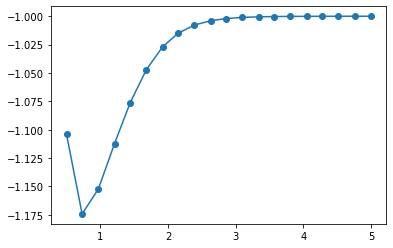

In [133]:
from matplotlib import pyplot as plt
plt.scatter(x,y)
plt.plot(x,cif.predict(x))

In [138]:
y

array([[-1.1041324 ],
       [-1.1742703 ],
       [-1.1523302 ],
       [-1.1122911 ],
       [-1.0763637 ],
       [-1.04709854],
       [-1.0269981 ],
       [-1.01498208],
       [-1.00778427],
       [-1.00394841],
       [-1.00204266],
       [-1.00102643],
       [-1.00052105],
       [-1.0002772 ],
       [-1.00014714],
       [-1.0000809 ],
       [-1.00004767],
       [-1.00002852],
       [-1.00001888],
       [-1.00001171]])

In [143]:
rss = 0
s_0 = s_1 = 0
y_aver = sum(y)/y.shape[0]
for i,j in zip(y,cif.predict(x)):
    rss = (i-j)*(i-j)
    s_0 += (i-y_aver)**2
    s_1 += (i-j)**2
print("this is rss:", rss)
print("this is r2:", 1-s_1/s_0)

this is rss: [0.23113583]
this is r2: [-83.21884603]


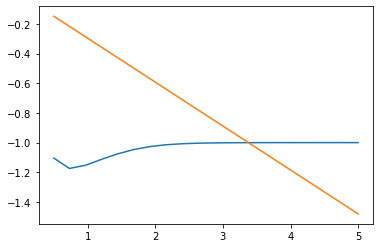

In [146]:
from matplotlib import pyplot as plt
plt.plot(x,y)
plt.plot(x,cif.predict(x))

In [145]:
cif.get_params()

{'alpha': 0,
 'coef0': 1,
 'degree': 3,
 'gamma': 1.0,
 'kernel': 'linear',
 'kernel_params': None}

In [152]:
dir(cif)

['X_fit_',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_estimator_type',
 '_get_kernel',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_pairwise',
 'alpha',
 'coef0',
 'degree',
 'dual_coef_',
 'fit',
 'gamma',
 'get_params',
 'kernel',
 'kernel_params',
 'predict',
 'score',
 'set_params']

In [153]:
cif.coef0

1

In [73]:
n_samples, n_features = 10, 5
rng = np.random.RandomState(0)
y = rng.randn(n_samples)
X = rng.randn(n_samples, n_features)
krr = KernelRidge(alpha=1.0)
krr.fit(X, y)

KernelRidge(alpha=1.0, coef0=1, degree=3, gamma=None, kernel='linear',
            kernel_params=None)

In [78]:
krr.predict(X)

array([ 0.22565729,  0.19966668,  1.30936986,  1.08611432,  0.58153898,
       -0.48681634,  0.48294366, -0.92901046,  0.67976522, -0.41095624])

In [80]:
X

array([[ 0.14404357,  1.45427351,  0.76103773,  0.12167502,  0.44386323],
       [ 0.33367433,  1.49407907, -0.20515826,  0.3130677 , -0.85409574],
       [-2.55298982,  0.6536186 ,  0.8644362 , -0.74216502,  2.26975462],
       [-1.45436567,  0.04575852, -0.18718385,  1.53277921,  1.46935877],
       [ 0.15494743,  0.37816252, -0.88778575, -1.98079647, -0.34791215],
       [ 0.15634897,  1.23029068,  1.20237985, -0.38732682, -0.30230275],
       [-1.04855297, -1.42001794, -1.70627019,  1.9507754 , -0.50965218],
       [-0.4380743 , -1.25279536,  0.77749036, -1.61389785, -0.21274028],
       [-0.89546656,  0.3869025 , -0.51080514, -1.18063218, -0.02818223],
       [ 0.42833187,  0.06651722,  0.3024719 , -0.63432209, -0.36274117]])

In [64]:
cif.get_params()

{'alpha': 1.0,
 'coef0': 1,
 'degree': 20,
 'gamma': 1.0,
 'kernel': 'rbf',
 'kernel_params': None}

In [16]:
from time import time
import os
def loss_fun(x,y):
    cmd = "decr_bias {0} {1} < 0@g1.cr".format(x,y)
    p = os.popen(cmd)
    ret = -float(p.read())
    return ret


In [ ]:
decr_bias 40.64 0.0618926 0.420613 0.453144 0.935162 0.325355 0.07517 0.436911 0.464859 0.0259761 0.206929 < 0@a3b1,1@c2.cr

In [ ]:
0.0686 0.0644 0.0065 0.0755 0.9286 0.9137 0.9272 0.0756 0.8958 0.9373 0.0639 0.0981 0.9384 0.9342 0.0065 0.0746 0.9282 0.115 

In [46]:
from time import time
import os
def loss_fun_all(x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11):
    cmd = "decr_bias {0} {1} {2} {3} {4} {5} {6} {7} {8} {9} {10} < src/0@a3b1,1@c2.cr".format(x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11)
    p = os.popen(cmd)
    ret = -float(p.read())
    return ret

In [58]:
def loss_fun_all(x_1,x_2,x_3,x_4,x_5,x_6):
    cmd = "cp_one/decr_bias {0} {1} {2} {3} {4} {5} 0.0686 0.0644 0.0065 0.0755 0.9286 0.9137 0.9272 0.0756 0.8958 0.9373 0.0639 0.0981 0.9384 0.9342 0.0065 0.0746 0.9282 0.115  < cp_one/0@a6.cr".format(x_1,x_2,x_3,x_4,x_5,x_6)
    p = os.popen(cmd)
    ret = -float(p.read())
    return ret

In [15]:
def loss_fun_all(x_1,x_2,x_3,x_4,x_5,x_6):
    cmd = "cp_one/decr_bias {0} {1} {2} {3} {4} {5} 0 0 0 < cp_one/0@a1.cr".format(x_1,x_2,x_3,x_4,x_5,x_6)
    p = os.popen(cmd)
    ret = -float(p.read())
    return ret

In [ ]:
cp_one/decr_bias 20.9323 20.9322 17.12 90 90 60 0.97 0.5 0.5 < cp_one/0@a1.cr

In [64]:
loss_fun_all(20.9323,20.9322, 17.12, 90, 90, 60)

-0.366342

In [59]:
loss_fun_all(20.9323,20.9322, 17.12, 90, 90, 60)

-0.387767

In [27]:
loss_fun_all(20.9323,20.9322, 17.12, 90, 90, 60)

-0.880843

In [52]:
from ase.io import read
atoms = read("/home/jyb/decryst/cp_one/NU-902-metal.cif")
ls = []
for i in atoms.get_scaled_positions().reshape(1,18):
    ls.append(str(i))

In [53]:
" ".join(ls)

'[0.0686 0.0644 0.0065 0.0755 0.9286 0.9137 0.9272 0.0756 0.8958 0.9373\n 0.0639 0.0981 0.9384 0.9342 0.0065 0.0746 0.9282 0.115 ]'

In [ ]:
from matplotlib import pyplot as plt
ls = []
for i in range(0,100):
    ls.append(loss_fun_all(20.9323,20.9322, 17.12, 90, 90, 60+0.2))

In [ ]:
decr_bias 45.64 0 0 0 0 0 0 0 0 0 0 < 0@a3b1,1@c2.cr

In [11]:
from time import time
import os
def loss_fun_cell(x):
    cmd = "cp_one/decr_bias {0} 0 0 0 0 0 0 0 0 0 0 < src/0@a3b1,1@c2.cr".format(x)
    p = os.popen(cmd)
    ret = p.read()
    return ret

In [ ]:
def loss_fun_cell(x):
    cmd = "cp_one/decr_bias {0} 0 0 0 0 0 0 0 0 0 0 < src/0@a3b1,1@c2.cr".format(x)
    p = os.popen(cmd)
    ret = p.read()
    return ret

In [2]:
def loss_fun_correct(x):
    cmd = "decr_bias {0} 0.0618926 0.420613 0.453144 0.935162 0.325355 0.07517 0.436911 0.464859 0.0259761 0.206929 < src/0@a3b1,1@c2.cr".format(x)
    p = os.popen(cmd)
    ret = -float(p.read())
    return ret

In [13]:
loss_fun_cell(10)

''

In [28]:
loss_fun_correct(50.9)

-0.710581

In [ ]:
# range 50.6 -50.9

In [29]:
from time import time
import os
def loss_fun_cell(x):
    cmd = "decr_bias {0} 0.0418449 0.475916 < 0@g1.cr".format(x)
    p = os.popen(cmd)
    ret = -float(p.read())
    return ret

In [60]:
from bayes_opt import BayesianOptimization

# Bounded region of parameter space
pbounds = {'x_1': (20, 25),'x_2':(20,25),'x_3':(15,19),'x_4':(85,95),'x_5':(85,95),'x_6':(59,80)}

optimizer_cell = BayesianOptimization(
    f=loss_fun_all,
    pbounds=pbounds,
    random_state=1,
)

optimizer_cell.maximize(
    init_points=1000,
    n_iter=200,
)

|   iter    |  target   |    x_1    |    x_2    |    x_3    |    x_4    |    x_5    |    x_6    |
-------------------------------------------------------------------------------------------------
|  1        | -1.273    |  22.09    |  23.6     |  15.0     |  88.02    |  86.47    |  60.94    |
|  2        | -1.275    |  20.93    |  21.73    |  16.59    |  90.39    |  89.19    |  73.39    |
|  3        | -1.27     |  21.02    |  24.39    |  15.11    |  91.7     |  89.17    |  70.73    |
|  4        | -1.271    |  20.7     |  20.99    |  18.2     |  94.68    |  88.13    |  73.54    |
|  5        | -1.328    |  24.38    |  24.47    |  15.34    |  85.39    |  86.7     |  77.44    |
|  6        | -1.129    |  20.49    |  22.11    |  18.83    |  90.33    |  91.92    |  65.63    |
|  7        | -1.702    |  23.43    |  24.17    |  15.07    |  92.5     |  94.89    |  74.71    |
|  8        | -1.56     |  21.4     |  23.95    |  15.41    |  89.48    |  94.09    |  65.17    |
|  9        | -1.273

|  56       | -1.288    |  20.72    |  23.76    |  15.89    |  90.19    |  92.85    |  59.47    |
|  57       | -1.659    |  21.62    |  24.36    |  18.38    |  90.38    |  93.67    |  78.95    |
|  58       | -1.349    |  24.13    |  24.27    |  15.39    |  91.51    |  92.04    |  71.82    |
|  59       | -0.6289   |  24.0     |  20.17    |  18.08    |  92.32    |  87.6     |  64.4     |
|  60       | -1.579    |  23.16    |  21.73    |  18.19    |  89.46    |  92.83    |  79.8     |
|  61       | -1.624    |  21.5     |  20.72    |  18.61    |  90.42    |  94.75    |  72.37    |
|  62       | -1.901    |  24.97    |  22.73    |  17.11    |  86.35    |  88.56    |  59.55    |
|  63       | -1.282    |  20.8     |  23.73    |  15.12    |  88.67    |  93.62    |  73.55    |
|  64       | -1.073    |  23.45    |  20.94    |  16.77    |  90.82    |  94.9     |  63.28    |
|  65       | -1.275    |  21.24    |  21.31    |  18.0     |  89.57    |  85.57    |  69.68    |
|  66       | -1.273

|  109      | -1.548    |  22.54    |  21.31    |  16.43    |  86.08    |  92.88    |  61.24    |
|  110      | -1.556    |  24.93    |  20.89    |  17.29    |  85.45    |  92.87    |  62.98    |
|  111      | -1.274    |  22.64    |  23.7     |  15.6     |  90.51    |  87.17    |  74.94    |
|  112      | -1.544    |  23.61    |  20.88    |  18.45    |  85.2     |  93.6     |  70.74    |
|  113      | -1.42     |  22.02    |  23.79    |  17.87    |  94.87    |  87.78    |  59.08    |
|  114      | -1.364    |  24.67    |  24.29    |  17.92    |  90.17    |  92.07    |  75.39    |
|  115      | -1.12     |  21.87    |  23.85    |  18.0     |  91.13    |  89.02    |  73.64    |
|  116      | -1.277    |  20.02    |  23.87    |  18.59    |  87.39    |  86.21    |  63.63    |
|  117      | -1.272    |  21.51    |  24.42    |  17.17    |  87.87    |  86.38    |  65.09    |
|  118      | -1.586    |  23.07    |  21.62    |  16.83    |  89.44    |  93.28    |  67.95    |
|  119      | -1.269

|  163      | -1.789    |  22.23    |  24.39    |  16.01    |  87.74    |  88.28    |  70.5     |
|  164      | -1.467    |  21.1     |  23.36    |  15.57    |  85.94    |  93.7     |  63.97    |
|  165      | -1.722    |  21.93    |  22.86    |  17.1     |  85.76    |  93.74    |  78.97    |
|  166      | -1.48     |  24.06    |  21.42    |  17.11    |  88.39    |  90.55    |  79.46    |
|  167      | -1.28     |  21.56    |  23.34    |  16.3     |  92.74    |  88.26    |  77.69    |
|  168      | -1.374    |  23.76    |  23.81    |  16.88    |  87.11    |  85.41    |  65.76    |
|  169      | -1.147    |  20.19    |  23.47    |  17.68    |  89.3     |  92.68    |  70.26    |
|  170      | -1.0      |  20.2     |  20.67    |  15.77    |  88.36    |  85.52    |  71.71    |
|  171      | -1.296    |  22.56    |  23.09    |  16.73    |  93.48    |  89.54    |  59.32    |
|  172      | -1.561    |  24.37    |  23.28    |  18.29    |  94.52    |  85.51    |  63.94    |
|  173      | -0.801

|  215      | -1.557    |  23.39    |  22.52    |  15.92    |  86.75    |  86.85    |  76.73    |
|  216      | -1.463    |  24.91    |  24.57    |  16.39    |  92.8     |  90.46    |  76.15    |
|  217      | -1.384    |  22.42    |  22.95    |  18.15    |  86.0     |  90.37    |  66.69    |
|  218      | -1.808    |  23.02    |  24.79    |  16.57    |  88.93    |  92.91    |  72.55    |
|  219      | -1.781    |  21.97    |  23.44    |  16.62    |  86.36    |  89.51    |  66.02    |
|  220      | -1.575    |  21.09    |  24.63    |  17.76    |  90.99    |  92.47    |  70.38    |
|  221      | -1.406    |  23.5     |  24.65    |  18.45    |  86.67    |  87.63    |  60.5     |
|  222      | -1.556    |  24.89    |  21.18    |  17.64    |  85.9     |  87.11    |  69.56    |
|  223      | -1.275    |  20.52    |  21.94    |  17.15    |  88.39    |  90.56    |  70.27    |
|  224      | -1.744    |  21.95    |  23.48    |  17.71    |  91.87    |  90.61    |  66.52    |
|  225      | -1.801

|  272      | -1.232    |  20.77    |  24.48    |  16.24    |  90.48    |  91.82    |  63.97    |
|  273      | -1.274    |  20.84    |  22.54    |  18.17    |  91.92    |  86.19    |  77.92    |
|  274      | -1.656    |  22.4     |  24.73    |  17.21    |  85.85    |  87.02    |  76.94    |
|  275      | -1.867    |  23.53    |  24.47    |  16.32    |  90.28    |  91.5     |  71.48    |
|  276      | -0.9921   |  21.16    |  22.13    |  15.99    |  93.46    |  94.87    |  60.4     |
|  277      | -1.731    |  23.57    |  21.65    |  17.5     |  87.58    |  91.51    |  66.79    |
|  278      | -1.725    |  21.47    |  24.56    |  18.77    |  91.14    |  87.14    |  78.73    |
|  279      | -1.296    |  23.75    |  23.76    |  15.85    |  93.3     |  87.4     |  72.26    |
|  280      | -1.386    |  23.55    |  23.71    |  16.56    |  92.6     |  94.03    |  71.34    |
|  281      | -1.0      |  20.45    |  20.64    |  15.42    |  86.73    |  86.26    |  75.34    |
|  282      | -1.0  

|  323      | -1.079    |  21.1     |  22.14    |  18.4     |  89.5     |  94.35    |  66.41    |
|  324      | -1.886    |  23.1     |  24.9     |  17.57    |  85.45    |  89.64    |  66.03    |
|  325      | -1.577    |  22.66    |  21.42    |  15.49    |  91.68    |  91.81    |  77.21    |
|  326      | -1.27     |  20.66    |  23.99    |  18.31    |  91.47    |  87.05    |  64.49    |
|  327      | -1.785    |  22.09    |  22.71    |  16.91    |  89.67    |  93.4     |  77.27    |
|  328      | -1.398    |  24.08    |  24.39    |  17.28    |  94.64    |  91.07    |  71.68    |
|  329      | -1.276    |  21.6     |  23.41    |  15.21    |  86.35    |  86.3     |  72.76    |
|  330      | -1.276    |  20.88    |  21.71    |  15.18    |  87.34    |  94.64    |  69.69    |
|  331      | -1.033    |  20.76    |  22.62    |  18.77    |  93.66    |  88.92    |  64.96    |
|  332      | -1.559    |  23.81    |  21.2     |  16.02    |  85.84    |  93.64    |  68.41    |
|  333      | -1.059

|  380      | -1.406    |  20.66    |  23.79    |  17.11    |  92.54    |  93.59    |  78.9     |
|  381      | -1.46     |  23.27    |  24.27    |  17.97    |  92.27    |  93.59    |  78.38    |
|  382      | -1.806    |  24.51    |  21.98    |  15.34    |  93.3     |  90.39    |  70.38    |
|  383      | -1.545    |  24.13    |  20.16    |  18.51    |  85.35    |  91.93    |  71.34    |
|  384      | -1.483    |  23.21    |  21.87    |  16.1     |  90.09    |  93.86    |  70.87    |
|  385      | -1.616    |  23.32    |  22.21    |  18.89    |  92.43    |  88.55    |  72.72    |
|  386      | -1.899    |  22.71    |  24.42    |  16.1     |  86.08    |  86.91    |  67.13    |
|  387      | -1.629    |  24.27    |  21.35    |  17.51    |  91.24    |  89.08    |  60.06    |
|  388      | -1.548    |  23.72    |  21.48    |  16.59    |  88.77    |  91.64    |  60.81    |
|  389      | -1.378    |  22.75    |  20.08    |  18.93    |  90.98    |  88.84    |  62.08    |
|  390      | -1.695

|  435      | -1.872    |  22.61    |  23.94    |  18.77    |  89.97    |  90.94    |  65.11    |
|  436      | -1.272    |  20.75    |  20.66    |  17.93    |  92.34    |  86.79    |  67.68    |
|  437      | -1.564    |  22.97    |  20.63    |  18.14    |  91.2     |  91.15    |  73.73    |
|  438      | -1.13     |  24.94    |  22.81    |  18.46    |  89.19    |  91.54    |  78.43    |
|  439      | -1.556    |  23.32    |  21.52    |  17.48    |  88.51    |  88.22    |  71.81    |
|  440      | -1.279    |  20.8     |  22.43    |  18.78    |  88.84    |  86.89    |  68.85    |
|  441      | -1.06     |  24.2     |  24.21    |  18.31    |  85.11    |  87.67    |  80.0     |
|  442      | -1.415    |  20.6     |  22.45    |  18.16    |  86.22    |  91.62    |  69.25    |
|  443      | -1.267    |  20.97    |  24.39    |  15.73    |  91.39    |  92.41    |  70.82    |
|  444      | -1.542    |  23.14    |  20.59    |  16.23    |  90.87    |  88.95    |  72.94    |
|  445      | -1.431

|  488      | -0.9437   |  21.08    |  21.42    |  18.11    |  94.3     |  86.9     |  65.22    |
|  489      | -1.281    |  20.03    |  22.16    |  15.84    |  91.41    |  92.1     |  61.49    |
|  490      | -1.85     |  20.41    |  24.53    |  16.56    |  90.33    |  94.63    |  74.94    |
|  491      | -1.274    |  21.63    |  20.43    |  17.14    |  88.36    |  85.22    |  75.19    |
|  492      | -1.573    |  21.92    |  22.86    |  18.02    |  94.41    |  91.12    |  65.62    |
|  493      | -1.273    |  20.55    |  20.37    |  16.28    |  91.61    |  91.95    |  63.36    |
|  494      | -1.275    |  20.41    |  21.53    |  17.19    |  92.55    |  90.3     |  65.03    |
|  495      | -1.608    |  23.12    |  21.32    |  17.61    |  93.42    |  91.39    |  70.88    |
|  496      | -1.375    |  21.54    |  24.38    |  18.96    |  92.77    |  90.74    |  61.97    |
|  497      | -1.179    |  21.57    |  21.83    |  16.17    |  89.46    |  91.11    |  63.47    |
|  498      | -1.0  

|  540      | -1.239    |  22.88    |  21.19    |  17.23    |  88.95    |  90.07    |  63.12    |
|  541      | -1.272    |  20.78    |  23.77    |  16.32    |  91.44    |  90.65    |  77.89    |
|  542      | -1.694    |  24.4     |  22.22    |  15.82    |  91.32    |  91.37    |  73.54    |
|  543      | -1.737    |  24.54    |  23.91    |  17.5     |  91.01    |  87.13    |  72.68    |
|  544      | -1.655    |  24.07    |  24.61    |  18.67    |  90.61    |  87.6     |  66.01    |
|  545      | -1.7      |  24.99    |  22.63    |  18.26    |  90.97    |  90.07    |  66.32    |
|  546      | -1.307    |  22.69    |  20.03    |  18.51    |  90.61    |  85.24    |  76.18    |
|  547      | -1.272    |  20.68    |  20.15    |  16.85    |  94.61    |  85.94    |  60.38    |
|  548      | -1.369    |  24.4     |  24.11    |  18.28    |  89.68    |  89.27    |  67.42    |
|  549      | -1.681    |  22.91    |  23.64    |  18.14    |  91.55    |  90.62    |  67.66    |
|  550      | -1.315

|  595      | -1.601    |  23.95    |  23.01    |  17.92    |  85.24    |  87.55    |  59.88    |
|  596      | -1.271    |  22.5     |  24.95    |  15.05    |  89.41    |  85.05    |  71.87    |
|  597      | -1.272    |  20.92    |  23.56    |  15.64    |  93.29    |  87.06    |  66.4     |
|  598      | -1.268    |  21.15    |  24.04    |  16.96    |  93.74    |  86.3     |  69.48    |
|  599      | -1.488    |  23.88    |  24.91    |  17.69    |  86.83    |  92.6     |  60.57    |
|  600      | -1.412    |  23.81    |  24.14    |  17.24    |  89.93    |  94.37    |  59.0     |
|  601      | -1.275    |  20.05    |  21.26    |  17.02    |  90.4     |  88.71    |  65.15    |
|  602      | -1.594    |  21.01    |  24.0     |  16.26    |  89.92    |  93.11    |  71.86    |
|  603      | -1.557    |  22.04    |  20.88    |  16.59    |  89.85    |  94.91    |  64.97    |
|  604      | -1.28     |  20.83    |  21.1     |  15.85    |  85.76    |  88.65    |  64.98    |
|  605      | -1.578

|  647      | -1.318    |  24.48    |  24.44    |  15.02    |  93.32    |  94.02    |  69.75    |
|  648      | -1.704    |  23.28    |  23.84    |  17.74    |  89.59    |  90.73    |  71.06    |
|  649      | -1.341    |  24.21    |  21.2     |  18.03    |  93.12    |  92.97    |  75.96    |
|  650      | -1.583    |  24.15    |  22.09    |  17.47    |  92.55    |  92.7     |  79.13    |
|  651      | -1.694    |  24.88    |  22.82    |  16.86    |  93.36    |  87.2     |  75.09    |
|  652      | -1.615    |  20.96    |  22.96    |  17.43    |  89.42    |  93.65    |  70.41    |
|  653      | -1.272    |  22.46    |  22.09    |  15.25    |  88.62    |  85.93    |  70.88    |
|  654      | -1.777    |  23.2     |  23.84    |  17.53    |  86.87    |  92.5     |  70.53    |
|  655      | -1.0      |  20.51    |  20.12    |  16.19    |  91.9     |  94.33    |  79.3     |
|  656      | -1.349    |  23.82    |  21.47    |  17.49    |  87.31    |  92.51    |  62.48    |
|  657      | -1.485

|  698      | -1.793    |  22.28    |  23.0     |  16.65    |  88.04    |  90.25    |  63.01    |
|  699      | -1.281    |  21.07    |  22.55    |  15.06    |  89.45    |  94.97    |  76.28    |
|  700      | -1.276    |  20.42    |  23.28    |  15.9     |  86.18    |  88.49    |  73.22    |
|  701      | -1.54     |  22.75    |  20.22    |  18.43    |  89.78    |  93.57    |  62.94    |
|  702      | -1.275    |  20.42    |  22.58    |  16.82    |  85.14    |  85.39    |  60.97    |
|  703      | -1.111    |  20.2     |  20.88    |  17.3     |  89.77    |  94.8     |  60.49    |
|  704      | -1.06     |  24.34    |  22.89    |  18.51    |  85.56    |  85.99    |  77.12    |
|  705      | -1.286    |  22.85    |  22.79    |  15.05    |  91.42    |  93.48    |  79.92    |
|  706      | -1.538    |  22.16    |  21.56    |  16.62    |  87.28    |  87.26    |  68.11    |
|  707      | -1.105    |  23.42    |  23.3     |  18.09    |  87.17    |  92.29    |  75.7     |
|  708      | -1.53 

|  750      | -1.289    |  20.31    |  22.69    |  16.34    |  88.24    |  87.3     |  59.1     |
|  751      | -1.408    |  23.44    |  23.76    |  16.35    |  89.7     |  92.97    |  72.6     |
|  752      | -1.0      |  20.11    |  21.42    |  18.82    |  93.83    |  88.25    |  78.12    |
|  753      | -1.27     |  22.4     |  21.01    |  16.09    |  87.41    |  85.56    |  68.18    |
|  754      | -1.442    |  24.52    |  22.63    |  17.18    |  87.27    |  85.46    |  61.64    |
|  755      | -1.297    |  21.08    |  24.37    |  18.95    |  85.18    |  89.43    |  66.75    |
|  756      | -1.285    |  22.68    |  23.08    |  16.58    |  86.84    |  90.85    |  59.7     |
|  757      | -1.389    |  24.47    |  23.22    |  15.38    |  90.51    |  86.29    |  61.5     |
|  758      | -1.549    |  21.33    |  23.81    |  17.79    |  90.59    |  87.55    |  69.88    |
|  759      | -1.322    |  24.65    |  20.93    |  17.94    |  93.72    |  91.69    |  63.28    |
|  760      | -1.277

|  806      | -1.623    |  23.54    |  21.67    |  17.68    |  92.8     |  85.87    |  69.72    |
|  807      | -1.0      |  20.52    |  23.25    |  16.26    |  91.44    |  85.49    |  77.21    |
|  808      | -1.519    |  22.39    |  23.97    |  15.91    |  88.35    |  92.64    |  76.92    |
|  809      | -1.456    |  22.19    |  24.65    |  17.32    |  85.49    |  89.53    |  62.37    |
|  810      | -1.743    |  23.66    |  21.74    |  15.8     |  93.43    |  93.18    |  66.22    |
|  811      | -1.274    |  22.02    |  20.3     |  15.72    |  92.36    |  90.66    |  76.29    |
|  812      | -1.793    |  22.51    |  23.84    |  17.04    |  90.68    |  86.85    |  70.43    |
|  813      | -1.389    |  21.01    |  22.78    |  15.57    |  86.86    |  92.65    |  60.49    |
|  814      | -1.273    |  21.85    |  24.39    |  15.42    |  88.59    |  86.14    |  77.41    |
|  815      | -1.272    |  20.63    |  21.27    |  16.69    |  91.65    |  88.45    |  63.48    |
|  816      | -1.68 

|  865      | -1.353    |  23.92    |  23.63    |  16.24    |  86.59    |  93.64    |  71.82    |
|  866      | -1.159    |  21.95    |  23.78    |  17.87    |  91.47    |  87.07    |  77.6     |
|  867      | -1.418    |  23.6     |  21.51    |  15.25    |  94.13    |  92.94    |  69.47    |
|  868      | -1.742    |  22.07    |  23.08    |  16.59    |  85.39    |  88.02    |  64.17    |
|  869      | -1.902    |  24.86    |  23.84    |  16.61    |  92.37    |  88.03    |  70.07    |
|  870      | -1.267    |  21.04    |  21.27    |  16.74    |  85.82    |  93.53    |  78.24    |
|  871      | -1.37     |  21.07    |  22.37    |  18.37    |  87.88    |  91.11    |  68.28    |
|  872      | -1.812    |  21.99    |  23.95    |  16.86    |  89.65    |  94.92    |  79.21    |
|  873      | -1.32     |  21.18    |  21.13    |  17.65    |  89.12    |  92.19    |  74.4     |
|  874      | -1.401    |  23.92    |  21.32    |  18.99    |  89.94    |  85.84    |  61.35    |
|  875      | -1.448

|  918      | -1.578    |  23.9     |  22.1     |  17.69    |  86.66    |  93.24    |  73.39    |
|  919      | -1.53     |  23.95    |  21.8     |  17.65    |  87.17    |  87.21    |  64.09    |
|  920      | -1.061    |  21.32    |  22.04    |  18.31    |  94.47    |  91.32    |  61.83    |
|  921      | -1.834    |  22.1     |  24.68    |  16.28    |  91.19    |  94.35    |  68.67    |
|  922      | -1.446    |  22.5     |  24.59    |  18.72    |  94.04    |  90.14    |  72.44    |
|  923      | -1.537    |  22.95    |  20.79    |  17.49    |  88.19    |  86.31    |  63.52    |
|  924      | -1.329    |  21.57    |  24.76    |  18.96    |  93.67    |  89.62    |  68.78    |
|  925      | -1.776    |  23.82    |  20.49    |  18.98    |  91.92    |  87.99    |  78.09    |
|  926      | -1.538    |  22.76    |  20.43    |  15.43    |  85.32    |  87.16    |  60.08    |
|  927      | -1.562    |  22.55    |  20.41    |  16.77    |  87.36    |  90.6     |  68.22    |
|  928      | -1.155

|  970      | -1.958    |  24.92    |  22.73    |  17.21    |  88.49    |  92.04    |  69.5     |
|  971      | -1.277    |  22.35    |  22.75    |  15.1     |  90.31    |  86.33    |  68.64    |
|  972      | -1.28     |  20.41    |  24.44    |  16.51    |  89.3     |  92.42    |  62.27    |
|  973      | -1.386    |  22.88    |  22.56    |  16.47    |  91.83    |  92.94    |  68.82    |
|  974      | -1.918    |  23.14    |  24.56    |  16.83    |  86.35    |  90.43    |  68.03    |
|  975      | -1.241    |  23.84    |  23.99    |  15.69    |  89.38    |  87.67    |  79.05    |
|  976      | -1.512    |  24.68    |  22.17    |  16.72    |  92.46    |  90.96    |  64.44    |
|  977      | -1.794    |  22.42    |  24.45    |  17.73    |  90.63    |  93.77    |  64.8     |
|  978      | -1.019    |  24.98    |  21.0     |  18.36    |  92.42    |  93.64    |  71.28    |
|  979      | -1.278    |  21.16    |  22.42    |  18.45    |  92.98    |  86.74    |  79.84    |
|  980      | -1.0  

|  1021     | -0.7857   |  23.65    |  20.44    |  18.45    |  92.75    |  87.79    |  63.85    |
|  1022     | -0.8964   |  20.91    |  20.44    |  18.75    |  90.72    |  90.44    |  60.58    |
|  1023     | -0.6645   |  23.27    |  20.26    |  17.89    |  92.73    |  87.72    |  64.86    |
|  1024     | -0.6809   |  20.46    |  20.95    |  17.9     |  89.84    |  90.73    |  61.09    |
|  1025     | -0.883    |  23.59    |  20.0     |  17.68    |  92.89    |  87.76    |  64.2     |
|  1026     | -0.7903   |  20.39    |  20.85    |  17.96    |  90.16    |  90.93    |  59.74    |
|  1027     | -0.8424   |  20.22    |  23.15    |  17.79    |  93.61    |  93.11    |  62.06    |
|  1028     | -0.6765   |  22.12    |  20.17    |  18.04    |  92.08    |  88.58    |  63.84    |
|  1029     | -0.5683   |  21.01    |  20.91    |  17.93    |  90.73    |  89.14    |  60.89    |
|  1030     | -1.552    |  20.72    |  20.69    |  17.96    |  91.07    |  89.11    |  60.25    |
|  1031     | -0.823

|  1072     | -1.267    |  20.61    |  21.15    |  17.87    |  90.59    |  88.63    |  61.58    |
|  1073     | -0.6293   |  20.81    |  21.46    |  17.24    |  89.31    |  92.24    |  61.67    |
|  1074     | -0.9026   |  20.11    |  21.42    |  17.83    |  93.76    |  92.23    |  61.61    |
|  1075     | -0.6712   |  20.93    |  21.07    |  18.03    |  92.83    |  92.0     |  61.78    |
|  1076     | -0.7841   |  22.68    |  20.0     |  18.61    |  92.32    |  88.42    |  63.94    |
|  1077     | -1.274    |  20.31    |  21.44    |  17.81    |  90.77    |  90.05    |  61.54    |
|  1078     | -0.462    |  20.73    |  21.25    |  18.05    |  92.67    |  92.6     |  60.92    |
|  1079     | -0.6306   |  20.49    |  21.46    |  17.95    |  91.9     |  92.85    |  60.82    |
|  1080     | -0.8639   |  20.88    |  21.28    |  17.56    |  90.26    |  92.73    |  61.81    |
|  1081     | -0.7016   |  20.5     |  21.1     |  18.38    |  92.29    |  92.37    |  60.29    |
|  1082     | -0.582

|  1123     | -0.4485   |  20.98    |  20.76    |  18.22    |  94.18    |  92.21    |  61.27    |
|  1124     | -0.9006   |  21.19    |  20.27    |  18.48    |  93.72    |  91.81    |  61.4     |
|  1125     | -0.4323   |  20.99    |  20.95    |  18.14    |  93.89    |  92.11    |  60.54    |
|  1126     | -0.4825   |  21.08    |  20.66    |  18.1     |  92.78    |  94.13    |  59.61    |
|  1127     | -0.4906   |  20.87    |  20.76    |  17.83    |  90.79    |  93.15    |  60.79    |
|  1128     | -0.6165   |  20.96    |  20.66    |  18.42    |  92.37    |  94.04    |  59.09    |
|  1129     | -0.4451   |  20.98    |  20.92    |  18.33    |  94.47    |  92.78    |  60.61    |
|  1130     | -0.4078   |  21.22    |  20.83    |  18.06    |  90.29    |  93.85    |  61.02    |
|  1131     | -1.521    |  20.76    |  20.44    |  18.26    |  94.12    |  92.62    |  59.92    |
|  1132     | -0.689    |  21.35    |  21.3     |  18.11    |  94.54    |  92.38    |  60.84    |
|  1133     | -0.584

|  1174     | -0.5253   |  21.14    |  21.04    |  18.37    |  91.11    |  95.0     |  60.49    |
|  1175     | -0.7781   |  21.22    |  21.15    |  18.76    |  90.59    |  95.0     |  61.37    |
|  1176     | -1.21     |  20.0     |  24.79    |  18.39    |  93.17    |  93.02    |  61.67    |
|  1177     | -1.0      |  20.37    |  20.99    |  15.84    |  89.25    |  89.43    |  78.46    |
|  1178     | -0.521    |  20.77    |  20.93    |  18.07    |  91.94    |  95.0     |  60.54    |
|  1179     | -1.0      |  20.21    |  21.38    |  15.7     |  90.62    |  87.2     |  78.64    |
|  1180     | -0.5387   |  21.41    |  20.55    |  18.33    |  94.75    |  94.52    |  60.71    |
|  1181     | -0.5711   |  20.94    |  20.86    |  17.47    |  94.31    |  94.95    |  60.86    |
|  1182     | -0.4637   |  21.09    |  20.6     |  18.04    |  89.97    |  94.66    |  61.09    |
|  1183     | -1.067    |  21.12    |  20.32    |  17.81    |  94.09    |  95.0     |  60.07    |
|  1184     | -0.652

In [54]:
k_1 = optimizer_cell.max

In [55]:
print(k_1)

{'target': -0.582023, 'params': {'x_1': 21.094377104700953, 'x_2': 20.754501490714077, 'x_3': 18.0, 'x_4': 88.54777611412057, 'x_5': 94.0122044818216, 'x_6': 61.40223045605549}}


In [ ]:
optimizer_cell.maximize(
    init_points=1000,
    n_iter=500,
)

In [62]:
k_1 = optimizer_cell.max
print(k_1)

{'target': -0.407842, 'params': {'x_1': 21.222232128654287, 'x_2': 20.827213747792225, 'x_3': 18.06391997863494, 'x_4': 90.2893656608791, 'x_5': 93.85210295158657, 'x_6': 61.02462641530546}}


In [52]:
optimizer_cell.max

{'target': -0.706768,
 'params': {'x_1': 39.853833756808285,
  'x_10': 0.35481005795993015,
  'x_11': 0.18330012967350306,
  'x_2': 0.11784876220008483,
  'x_3': 0.356926737216732,
  'x_4': 0.3485619708816941,
  'x_5': 0.4139977595205165,
  'x_6': 0.10600656511795836,
  'x_7': 0.11543964778891919,
  'x_8': 0.3202132654184846,
  'x_9': 0.0782884906716792}}

In [ ]:
from bayes_opt import BayesianOptimization

# Bounded region of parameter space
pbounds = {'x_1': (20, 25),'x_2':(20,25),'x_3':(15,19),'x_4':(85,95),'x_5':(85,95),'x_6':(59,80)}

optimizer_cell = BayesianOptimization(
    f=loss_fun_all,
    pbounds=pbounds,
    random_state=1,
)

optimizer_cell.maximize(
    init_points=1000,
    n_iter=400,
)

|   iter    |  target   |    x_1    |    x_2    |    x_3    |    x_4    |    x_5    |    x_6    |
-------------------------------------------------------------------------------------------------
|  1        | -1.0      |  22.09    |  23.6     |  15.0     |  88.02    |  86.47    |  60.94    |
|  2        | -1.0      |  20.93    |  21.73    |  16.59    |  90.39    |  89.19    |  73.39    |
|  3        | -1.0      |  21.02    |  24.39    |  15.11    |  91.7     |  89.17    |  70.73    |
|  4        | -1.0      |  20.7     |  20.99    |  18.2     |  94.68    |  88.13    |  73.54    |
|  5        | -1.262    |  24.38    |  24.47    |  15.34    |  85.39    |  86.7     |  77.44    |
|  6        | -1.116    |  20.49    |  22.11    |  18.83    |  90.33    |  91.92    |  65.63    |
|  7        | -1.665    |  23.43    |  24.17    |  15.07    |  92.5     |  94.89    |  74.71    |
|  8        | -1.557    |  21.4     |  23.95    |  15.41    |  89.48    |  94.09    |  65.17    |
|  9        | -1.0  

|  57       | -1.638    |  21.62    |  24.36    |  18.38    |  90.38    |  93.67    |  78.95    |
|  58       | -1.344    |  24.13    |  24.27    |  15.39    |  91.51    |  92.04    |  71.82    |
|  59       | -0.6023   |  24.0     |  20.17    |  18.08    |  92.32    |  87.6     |  64.4     |
|  60       | -1.554    |  23.16    |  21.73    |  18.19    |  89.46    |  92.83    |  79.8     |
|  61       | -1.597    |  21.5     |  20.72    |  18.61    |  90.42    |  94.75    |  72.37    |
|  62       | -1.895    |  24.97    |  22.73    |  17.11    |  86.35    |  88.56    |  59.55    |
|  63       | -1.0      |  20.8     |  23.73    |  15.12    |  88.67    |  93.62    |  73.55    |
|  64       | -1.055    |  23.45    |  20.94    |  16.77    |  90.82    |  94.9     |  63.28    |
|  65       | -1.0      |  21.24    |  21.31    |  18.0     |  89.57    |  85.57    |  69.68    |
|  66       | -1.0      |  21.06    |  23.99    |  16.19    |  85.28    |  90.93    |  76.72    |
|  67       | -1.674

|  110      | -1.238    |  24.93    |  20.89    |  17.29    |  85.45    |  92.87    |  62.98    |
|  111      | -1.535    |  22.64    |  23.7     |  15.6     |  90.51    |  87.17    |  74.94    |
|  112      | -1.24     |  23.61    |  20.88    |  18.45    |  85.2     |  93.6     |  70.74    |
|  113      | -1.41     |  22.02    |  23.79    |  17.87    |  94.87    |  87.78    |  59.08    |
|  114      | -1.346    |  24.67    |  24.29    |  17.92    |  90.17    |  92.07    |  75.39    |
|  115      | -1.109    |  21.87    |  23.85    |  18.0     |  91.13    |  89.02    |  73.64    |
|  116      | -1.0      |  20.02    |  23.87    |  18.59    |  87.39    |  86.21    |  63.63    |
|  117      | -1.461    |  21.51    |  24.42    |  17.17    |  87.87    |  86.38    |  65.09    |
|  118      | -1.565    |  23.07    |  21.62    |  16.83    |  89.44    |  93.28    |  67.95    |
|  119      | -1.0      |  21.73    |  23.37    |  15.89    |  89.67    |  88.15    |  72.16    |
|  120      | -1.419

|  164      | -1.467    |  21.1     |  23.36    |  15.57    |  85.94    |  93.7     |  63.97    |
|  165      | -1.705    |  21.93    |  22.86    |  17.1     |  85.76    |  93.74    |  78.97    |
|  166      | -1.238    |  24.06    |  21.42    |  17.11    |  88.39    |  90.55    |  79.46    |
|  167      | -1.0      |  21.56    |  23.34    |  16.3     |  92.74    |  88.26    |  77.69    |
|  168      | -1.374    |  23.76    |  23.81    |  16.88    |  87.11    |  85.41    |  65.76    |
|  169      | -1.129    |  20.19    |  23.47    |  17.68    |  89.3     |  92.68    |  70.26    |
|  170      | -1.0      |  20.2     |  20.67    |  15.77    |  88.36    |  85.52    |  71.71    |
|  171      | -1.292    |  22.56    |  23.09    |  16.73    |  93.48    |  89.54    |  59.32    |
|  172      | -1.549    |  24.37    |  23.28    |  18.29    |  94.52    |  85.51    |  63.94    |
|  173      | -0.782    |  20.32    |  22.11    |  18.46    |  85.82    |  89.73    |  61.64    |
|  174      | -1.305

|  220      | -1.547    |  21.09    |  24.63    |  17.76    |  90.99    |  92.47    |  70.38    |
|  221      | -1.408    |  23.5     |  24.65    |  18.45    |  86.67    |  87.63    |  60.5     |
|  222      | -1.247    |  24.89    |  21.18    |  17.64    |  85.9     |  87.11    |  69.56    |
|  223      | -1.0      |  20.52    |  21.94    |  17.15    |  88.39    |  90.56    |  70.27    |
|  224      | -1.728    |  21.95    |  23.48    |  17.71    |  91.87    |  90.61    |  66.52    |
|  225      | -1.77     |  23.07    |  24.68    |  17.39    |  94.8     |  89.41    |  74.53    |
|  226      | -1.0      |  20.19    |  23.82    |  17.07    |  85.05    |  87.77    |  70.23    |
|  227      | -1.246    |  23.84    |  20.27    |  17.2     |  93.01    |  91.5     |  78.56    |
|  228      | -1.716    |  20.37    |  21.38    |  18.68    |  92.65    |  91.0     |  76.49    |
|  229      | -1.302    |  24.48    |  24.86    |  18.99    |  86.4     |  85.71    |  60.54    |
|  230      | -1.0  

|  273      | -1.0      |  20.84    |  22.54    |  18.17    |  91.92    |  86.19    |  77.92    |
|  274      | -1.636    |  22.4     |  24.73    |  17.21    |  85.85    |  87.02    |  76.94    |
|  275      | -1.852    |  23.53    |  24.47    |  16.32    |  90.28    |  91.5     |  71.48    |
|  276      | -0.9728   |  21.16    |  22.13    |  15.99    |  93.46    |  94.87    |  60.4     |
|  277      | -1.712    |  23.57    |  21.65    |  17.5     |  87.58    |  91.51    |  66.79    |
|  278      | -1.702    |  21.47    |  24.56    |  18.77    |  91.14    |  87.14    |  78.73    |
|  279      | -1.292    |  23.75    |  23.76    |  15.85    |  93.3     |  87.4     |  72.26    |
|  280      | -1.385    |  23.55    |  23.71    |  16.56    |  92.6     |  94.03    |  71.34    |
|  281      | -1.0      |  20.45    |  20.64    |  15.42    |  86.73    |  86.26    |  75.34    |
|  282      | -1.0      |  20.2     |  21.21    |  18.52    |  94.74    |  91.05    |  79.5     |
|  283      | -1.0  

|  326      | -1.0      |  20.66    |  23.99    |  18.31    |  91.47    |  87.05    |  64.49    |
|  327      | -1.757    |  22.09    |  22.71    |  16.91    |  89.67    |  93.4     |  77.27    |
|  328      | -1.392    |  24.08    |  24.39    |  17.28    |  94.64    |  91.07    |  71.68    |
|  329      | -1.0      |  21.6     |  23.41    |  15.21    |  86.35    |  86.3     |  72.76    |
|  330      | -1.0      |  20.88    |  21.71    |  15.18    |  87.34    |  94.64    |  69.69    |
|  331      | -1.018    |  20.76    |  22.62    |  18.77    |  93.66    |  88.92    |  64.96    |
|  332      | -1.243    |  23.81    |  21.2     |  16.02    |  85.84    |  93.64    |  68.41    |
|  333      | -1.041    |  22.81    |  23.68    |  18.19    |  89.48    |  86.84    |  76.4     |
|  334      | -1.0      |  20.15    |  24.73    |  17.31    |  93.75    |  91.09    |  64.28    |
|  335      | -1.547    |  21.48    |  22.66    |  18.85    |  86.84    |  90.1     |  66.22    |
|  336      | -1.398

|  380      | -1.393    |  20.66    |  23.79    |  17.11    |  92.54    |  93.59    |  78.9     |
|  381      | -1.432    |  23.27    |  24.27    |  17.97    |  92.27    |  93.59    |  78.38    |
|  382      | -1.738    |  24.51    |  21.98    |  15.34    |  93.3     |  90.39    |  70.38    |
|  383      | -1.243    |  24.13    |  20.16    |  18.51    |  85.35    |  91.93    |  71.34    |
|  384      | -1.462    |  23.21    |  21.87    |  16.1     |  90.09    |  93.86    |  70.87    |
|  385      | -1.593    |  23.32    |  22.21    |  18.89    |  92.43    |  88.55    |  72.72    |
|  386      | -1.886    |  22.71    |  24.42    |  16.1     |  86.08    |  86.91    |  67.13    |
|  387      | -1.614    |  24.27    |  21.35    |  17.51    |  91.24    |  89.08    |  60.06    |
|  388      | -1.536    |  23.72    |  21.48    |  16.59    |  88.77    |  91.64    |  60.81    |
|  389      | -1.329    |  22.75    |  20.08    |  18.93    |  90.98    |  88.84    |  62.08    |
|  390      | -1.671

|  433      | -1.022    |  22.41    |  20.96    |  18.39    |  90.03    |  90.27    |  65.05    |
|  434      | -1.155    |  22.56    |  20.01    |  16.11    |  88.49    |  87.84    |  60.8     |
|  435      | -1.859    |  22.61    |  23.94    |  18.77    |  89.97    |  90.94    |  65.11    |
|  436      | -1.0      |  20.75    |  20.66    |  17.93    |  92.34    |  86.79    |  67.68    |
|  437      | -1.504    |  22.97    |  20.63    |  18.14    |  91.2     |  91.15    |  73.73    |
|  438      | -1.116    |  24.94    |  22.81    |  18.46    |  89.19    |  91.54    |  78.43    |
|  439      | -1.534    |  23.32    |  21.52    |  17.48    |  88.51    |  88.22    |  71.81    |
|  440      | -1.624    |  20.8     |  22.43    |  18.78    |  88.84    |  86.89    |  68.85    |
|  441      | -1.054    |  24.2     |  24.21    |  18.31    |  85.11    |  87.67    |  80.0     |
|  442      | -1.391    |  20.6     |  22.45    |  18.16    |  86.22    |  91.62    |  69.25    |
|  443      | -1.566

|  485      | -1.659    |  22.65    |  23.3     |  17.78    |  88.13    |  85.38    |  67.71    |
|  486      | -1.322    |  21.13    |  20.01    |  17.74    |  94.52    |  88.91    |  65.31    |
|  487      | -1.637    |  22.77    |  24.26    |  18.18    |  91.85    |  89.32    |  73.5     |
|  488      | -0.9327   |  21.08    |  21.42    |  18.11    |  94.3     |  86.9     |  65.22    |
|  489      | -1.0      |  20.03    |  22.16    |  15.84    |  91.41    |  92.1     |  61.49    |
|  490      | -1.814    |  20.41    |  24.53    |  16.56    |  90.33    |  94.63    |  74.94    |
|  491      | -1.0      |  21.63    |  20.43    |  17.14    |  88.36    |  85.22    |  75.19    |
|  492      | -1.556    |  21.92    |  22.86    |  18.02    |  94.41    |  91.12    |  65.62    |
|  493      | -1.0      |  20.55    |  20.37    |  16.28    |  91.61    |  91.95    |  63.36    |
|  494      | -1.0      |  20.41    |  21.53    |  17.19    |  92.55    |  90.3     |  65.03    |
|  495      | -1.57 

|  538      | -1.154    |  22.58    |  20.78    |  16.12    |  93.83    |  91.32    |  79.24    |
|  539      | -1.156    |  23.0     |  20.05    |  16.66    |  85.22    |  88.14    |  69.11    |
|  540      | -1.231    |  22.88    |  21.19    |  17.23    |  88.95    |  90.07    |  63.12    |
|  541      | -1.0      |  20.78    |  23.77    |  16.32    |  91.44    |  90.65    |  77.89    |
|  542      | -1.668    |  24.4     |  22.22    |  15.82    |  91.32    |  91.37    |  73.54    |
|  543      | -1.72     |  24.54    |  23.91    |  17.5     |  91.01    |  87.13    |  72.68    |
|  544      | -1.649    |  24.07    |  24.61    |  18.67    |  90.61    |  87.6     |  66.01    |
|  545      | -1.687    |  24.99    |  22.63    |  18.26    |  90.97    |  90.07    |  66.32    |
|  546      | -1.162    |  22.69    |  20.03    |  18.51    |  90.61    |  85.24    |  76.18    |
|  547      | -1.0      |  20.68    |  20.15    |  16.85    |  94.61    |  85.94    |  60.38    |
|  548      | -1.365

|  589      | -1.0      |  20.58    |  20.1     |  16.34    |  94.93    |  88.13    |  74.49    |
|  590      | -1.468    |  23.58    |  22.86    |  16.47    |  87.08    |  94.8     |  60.38    |
|  591      | -1.027    |  21.18    |  21.54    |  18.64    |  92.13    |  87.65    |  62.45    |
|  592      | -1.529    |  24.4     |  23.97    |  15.15    |  93.79    |  90.88    |  68.61    |
|  593      | -1.249    |  23.37    |  20.2     |  16.32    |  85.88    |  91.84    |  67.36    |
|  594      | -1.179    |  22.39    |  21.45    |  18.15    |  85.47    |  87.81    |  71.4     |
|  595      | -1.604    |  23.95    |  23.01    |  17.92    |  85.24    |  87.55    |  59.88    |
|  596      | -1.0      |  22.5     |  24.95    |  15.05    |  89.41    |  85.05    |  71.87    |
|  597      | -1.0      |  20.92    |  23.56    |  15.64    |  93.29    |  87.06    |  66.4     |
|  598      | -1.0      |  21.15    |  24.04    |  16.96    |  93.74    |  86.3     |  69.48    |
|  599      | -1.487

|  643      | -1.147    |  23.31    |  21.68    |  15.81    |  89.08    |  86.51    |  76.35    |
|  644      | -1.787    |  23.55    |  22.01    |  15.69    |  93.76    |  91.39    |  79.93    |
|  645      | -1.0      |  20.51    |  21.22    |  15.33    |  92.45    |  86.6     |  77.51    |
|  646      | -1.0      |  22.46    |  22.63    |  15.17    |  91.14    |  87.28    |  63.48    |
|  647      | -1.321    |  24.48    |  24.44    |  15.02    |  93.32    |  94.02    |  69.75    |
|  648      | -1.69     |  23.28    |  23.84    |  17.74    |  89.59    |  90.73    |  71.06    |
|  649      | -1.316    |  24.21    |  21.2     |  18.03    |  93.12    |  92.97    |  75.96    |
|  650      | -1.572    |  24.15    |  22.09    |  17.47    |  92.55    |  92.7     |  79.13    |
|  651      | -1.671    |  24.88    |  22.82    |  16.86    |  93.36    |  87.2     |  75.09    |
|  652      | -1.594    |  20.96    |  22.96    |  17.43    |  89.42    |  93.65    |  70.41    |
|  653      | -1.0  

|  694      | -1.773    |  22.09    |  24.86    |  16.32    |  88.62    |  89.4     |  59.85    |
|  695      | -1.651    |  21.99    |  23.09    |  17.31    |  93.73    |  91.41    |  70.7     |
|  696      | -1.239    |  23.2     |  20.24    |  18.98    |  86.52    |  89.18    |  65.2     |
|  697      | -1.247    |  22.89    |  22.8     |  16.41    |  94.74    |  92.51    |  77.69    |
|  698      | -1.782    |  22.28    |  23.0     |  16.65    |  88.04    |  90.25    |  63.01    |
|  699      | -1.0      |  21.07    |  22.55    |  15.06    |  89.45    |  94.97    |  76.28    |
|  700      | -1.0      |  20.42    |  23.28    |  15.9     |  86.18    |  88.49    |  73.22    |
|  701      | -0.7193   |  22.75    |  20.22    |  18.43    |  89.78    |  93.57    |  62.94    |
|  702      | -1.0      |  20.42    |  22.58    |  16.82    |  85.14    |  85.39    |  60.97    |
|  703      | -0.9388   |  20.2     |  20.88    |  17.3     |  89.77    |  94.8     |  60.49    |
|  704      | -1.045

|  745      | -1.0      |  20.8     |  22.55    |  15.57    |  86.89    |  89.1     |  62.06    |
|  746      | -1.388    |  22.81    |  22.28    |  18.77    |  91.7     |  86.03    |  71.75    |
|  747      | -1.248    |  22.1     |  22.5     |  17.62    |  86.86    |  88.6     |  69.09    |
|  748      | -1.576    |  23.07    |  21.43    |  17.01    |  87.79    |  90.72    |  66.19    |
|  749      | -1.672    |  24.2     |  23.43    |  18.26    |  86.54    |  86.85    |  70.39    |
|  750      | -1.0      |  20.31    |  22.69    |  16.34    |  88.24    |  87.3     |  59.1     |
|  751      | -1.4      |  23.44    |  23.76    |  16.35    |  89.7     |  92.97    |  72.6     |
|  752      | -1.0      |  20.11    |  21.42    |  18.82    |  93.83    |  88.25    |  78.12    |
|  753      | -1.0      |  22.4     |  21.01    |  16.09    |  87.41    |  85.56    |  68.18    |
|  754      | -1.44     |  24.52    |  22.63    |  17.18    |  87.27    |  85.46    |  61.64    |
|  755      | -1.288

|  801      | -1.0      |  21.2     |  22.63    |  15.52    |  87.9     |  89.01    |  73.84    |
|  802      | -1.741    |  24.51    |  22.14    |  17.86    |  86.39    |  86.01    |  68.41    |
|  803      | -0.899    |  23.8     |  21.16    |  18.24    |  87.52    |  85.84    |  69.77    |
|  804      | -1.257    |  20.0     |  23.54    |  17.96    |  94.73    |  91.63    |  69.38    |
|  805      | -1.0      |  20.37    |  22.67    |  15.57    |  93.02    |  90.76    |  63.47    |
|  806      | -1.61     |  23.54    |  21.67    |  17.68    |  92.8     |  85.87    |  69.72    |
|  807      | -1.0      |  20.52    |  23.25    |  16.26    |  91.44    |  85.49    |  77.21    |
|  808      | -1.489    |  22.39    |  23.97    |  15.91    |  88.35    |  92.64    |  76.92    |
|  809      | -1.449    |  22.19    |  24.65    |  17.32    |  85.49    |  89.53    |  62.37    |
|  810      | -1.69     |  23.66    |  21.74    |  15.8     |  93.43    |  93.18    |  66.22    |
|  811      | -1.098

|  855      | -1.691    |  23.5     |  24.81    |  18.08    |  94.78    |  90.9     |  72.0     |
|  856      | -1.668    |  23.2     |  21.63    |  15.13    |  92.88    |  92.1     |  60.66    |
|  857      | -1.0      |  20.74    |  23.43    |  17.14    |  86.91    |  85.56    |  71.84    |
|  858      | -1.0      |  20.27    |  21.07    |  17.01    |  85.94    |  89.09    |  59.42    |
|  859      | -1.0      |  20.6     |  24.7     |  17.24    |  91.86    |  88.78    |  75.03    |
|  860      | -1.305    |  24.48    |  24.55    |  16.99    |  92.63    |  92.09    |  78.98    |
|  861      | -1.468    |  21.21    |  22.81    |  15.18    |  94.23    |  94.45    |  69.52    |
|  862      | -1.813    |  22.93    |  23.86    |  16.0     |  88.79    |  87.89    |  70.31    |
|  863      | -1.605    |  24.74    |  21.93    |  15.18    |  91.83    |  89.95    |  65.23    |
|  864      | -1.484    |  22.08    |  24.31    |  18.28    |  86.71    |  91.85    |  79.95    |
|  865      | -1.346

|  910      | -1.0      |  20.26    |  24.0     |  15.72    |  91.69    |  93.35    |  79.26    |
|  911      | -1.623    |  20.63    |  22.62    |  18.4     |  90.38    |  92.3     |  75.49    |
|  912      | -1.775    |  24.18    |  23.33    |  18.59    |  91.48    |  94.45    |  72.22    |
|  913      | -1.364    |  24.36    |  22.98    |  16.38    |  93.13    |  89.32    |  61.66    |
|  914      | -1.631    |  24.84    |  24.26    |  17.25    |  91.71    |  94.98    |  62.39    |
|  915      | -1.541    |  22.67    |  21.95    |  17.16    |  86.03    |  89.41    |  68.69    |
|  916      | -1.447    |  22.98    |  23.31    |  17.36    |  92.29    |  90.81    |  68.31    |
|  917      | -1.265    |  22.48    |  22.15    |  15.84    |  87.27    |  89.57    |  68.1     |
|  918      | -1.555    |  23.9     |  22.1     |  17.69    |  86.66    |  93.24    |  73.39    |
|  919      | -1.523    |  23.95    |  21.8     |  17.65    |  87.17    |  87.21    |  64.09    |
|  920      | -1.051

|  963      | -1.449    |  24.22    |  23.88    |  17.69    |  85.32    |  85.09    |  66.53    |
|  964      | -1.0      |  20.15    |  22.59    |  15.01    |  89.81    |  88.78    |  79.11    |
|  965      | -0.9684   |  20.28    |  20.33    |  18.4     |  92.95    |  94.36    |  60.64    |
|  966      | -1.308    |  23.1     |  22.57    |  16.29    |  91.11    |  94.18    |  60.31    |
|  967      | -1.777    |  23.3     |  21.43    |  16.62    |  93.5     |  86.22    |  76.7     |
|  968      | -1.292    |  22.02    |  24.92    |  18.67    |  89.08    |  87.98    |  63.64    |
|  969      | -1.0      |  21.09    |  23.84    |  18.02    |  94.78    |  85.83    |  63.62    |
|  970      | -1.944    |  24.92    |  22.73    |  17.21    |  88.49    |  92.04    |  69.5     |
|  971      | -1.0      |  22.35    |  22.75    |  15.1     |  90.31    |  86.33    |  68.64    |
|  972      | -1.29     |  20.41    |  24.44    |  16.51    |  89.3     |  92.42    |  62.27    |
|  973      | -1.382

In [36]:
from bayes_opt import BayesianOptimization

# Bounded region of parameter space
pbounds = {'x': (30, 55)}

optimizer_cell = BayesianOptimization(
    f=loss_fun_cell,
    pbounds=pbounds,
    random_state=1,
)

optimizer_cell.maximize(
    init_points=500,
    n_iter=100,
)

|   iter    |  target   |     x     |
-------------------------------------
|  1        | -1.307    |  40.43    |
|  2        | -1.57     |  48.01    |
|  3        | -1.467    |  30.0     |
|  4        | -1.582    |  37.56    |
|  5        | -1.562    |  33.67    |
|  6        | -1.545    |  32.31    |
|  7        | -1.541    |  34.66    |
|  8        | -1.552    |  38.64    |
|  9        | -0.8328   |  39.92    |
|  10       | -1.574    |  43.47    |
|  11       | -1.353    |  40.48    |
|  12       | -1.566    |  47.13    |
|  13       | -1.553    |  35.11    |
|  14       | -2.793    |  51.95    |
|  15       | -1.542    |  30.68    |
|  16       | -1.572    |  46.76    |
|  17       | -1.313    |  40.43    |
|  18       | -1.579    |  43.97    |
|  19       | -1.566    |  33.51    |
|  20       | -1.55     |  34.95    |
|  21       | -1.566    |  50.02    |
|  22       | -2.895    |  54.21    |
|  23       | -1.569    |  37.84    |
|  24       | -1.564    |  47.31    |
|  25       

|  132      | -2.891    |  54.24    |
|  133      | -1.575    |  44.03    |
|  134      | -1.545    |  30.47    |
|  135      | -1.566    |  50.02    |
|  136      | -1.572    |  35.82    |
|  137      | -1.567    |  50.18    |
|  138      | -0.9222   |  39.7     |
|  139      | -2.805    |  51.59    |
|  140      | -1.574    |  48.68    |
|  141      | -1.578    |  43.91    |
|  142      | -1.561    |  33.41    |
|  143      | -1.535    |  31.5     |
|  144      | -1.561    |  33.03    |
|  145      | -1.54     |  31.11    |
|  146      | -1.56     |  32.69    |
|  147      | -1.568    |  35.64    |
|  148      | -1.569    |  47.82    |
|  149      | -1.583    |  43.99    |
|  150      | -1.537    |  30.31    |
|  151      | -1.549    |  31.8     |
|  152      | -2.905    |  54.18    |
|  153      | -1.574    |  44.2     |
|  154      | -1.553    |  35.08    |
|  155      | -1.579    |  36.31    |
|  156      | -1.577    |  48.6     |
|  157      | -1.548    |  34.89    |
|  158      

|  271      | -0.9001   |  40.04    |
|  272      | -1.569    |  37.93    |
|  273      | -1.577    |  45.55    |
|  274      | -1.488    |  40.76    |
|  275      | -2.115    |  54.35    |
|  276      | -1.566    |  46.95    |
|  277      | -1.548    |  34.96    |
|  278      | -1.457    |  40.67    |
|  279      | -1.554    |  38.58    |
|  280      | -1.572    |  49.94    |
|  281      | -2.802    |  52.0     |
|  282      | -2.841    |  52.6     |
|  283      | -1.572    |  46.57    |
|  284      | -1.573    |  36.76    |
|  285      | -1.579    |  36.31    |
|  286      | -2.825    |  51.37    |
|  287      | -1.566    |  43.19    |
|  288      | -1.568    |  50.05    |
|  289      | -1.567    |  44.31    |
|  290      | -1.576    |  48.33    |
|  291      | -1.562    |  42.98    |
|  292      | -1.576    |  49.27    |
|  293      | -1.571    |  44.22    |
|  294      | -1.531    |  41.64    |
|  295      | -1.555    |  38.57    |
|  296      | -1.552    |  31.71    |
|  297      

|  413      | -1.571    |  50.07    |
|  414      | -1.567    |  47.42    |
|  415      | -1.575    |  49.16    |
|  416      | -1.556    |  38.56    |
|  417      | -2.834    |  51.15    |
|  418      | -1.473    |  40.72    |
|  419      | -2.865    |  50.6     |
|  420      | -1.578    |  45.66    |
|  421      | -1.563    |  33.59    |
|  422      | -1.549    |  31.96    |
|  423      | -1.548    |  30.46    |
|  424      | -1.543    |  31.67    |
|  425      | -1.538    |  41.46    |
|  426      | -1.561    |  32.83    |
|  427      | -1.542    |  30.69    |
|  428      | -1.578    |  48.87    |
|  429      | -0.8204   |  39.87    |
|  430      | -1.574    |  48.67    |
|  431      | -1.545    |  41.31    |
|  432      | -1.539    |  41.25    |
|  433      | -1.514    |  41.95    |
|  434      | -1.519    |  41.85    |
|  435      | -1.572    |  50.08    |
|  436      | -0.9203   |  40.06    |
|  437      | -2.833    |  52.62    |
|  438      | -1.549    |  30.93    |
|  439      

|  545      | -0.8203   |  39.88    |
|  546      | -0.8205   |  39.87    |
|  547      | -0.8202   |  39.88    |
|  548      | -0.8203   |  39.88    |
|  549      | -0.8203   |  39.88    |
|  550      | -0.8203   |  39.87    |
|  551      | -0.8202   |  39.88    |
|  552      | -0.8202   |  39.88    |
|  553      | -0.8202   |  39.88    |
|  554      | -0.8203   |  39.88    |
|  555      | -0.8206   |  39.88    |
|  556      | -0.8203   |  39.87    |
|  557      | -0.8203   |  39.87    |
|  558      | -0.8205   |  39.87    |
|  559      | -0.8203   |  39.87    |
|  560      | -0.8203   |  39.88    |
|  561      | -0.8203   |  39.88    |
|  562      | -0.8203   |  39.88    |
|  563      | -0.8203   |  39.87    |
|  564      | -0.8203   |  39.87    |
|  565      | -0.8203   |  39.88    |
|  566      | -0.8203   |  39.88    |
|  567      | -0.8203   |  39.88    |
|  568      | -0.8203   |  39.88    |
|  569      | -0.8202   |  39.88    |
|  570      | -0.8203   |  39.88    |
|  571      

In [57]:
import numpy as np
my_npz = np.load('/home/data/jyb/Trained_Model_Zr6/UiO-67-fake-Copy1.npz')
print(my_npz['zeros']) # 拿到文件对应的内容
print(my_npz['ones'])
print(my_npz['arange'])

KeyError: 'zeros is not a file in the archive'

In [40]:
optimizer_cell.max

{'target': -0.820245, 'params': {'x': 39.8759972190131}}

In [ ]:
from bayes_opt import BayesianOptimization

# Bounded region of parameter space
pbounds = {'x': (30, 55)}

optimizer_cell = BayesianOptimization(
    f=loss_fun_correct,
    pbounds=pbounds,
    random_state=1,
)

optimizer_cell.maximize(
    init_points=500,
    n_iter=500,
)

In [42]:
optimizer_cell.max

{'target': -0.820245, 'params': {'x': 39.8759972190131}}

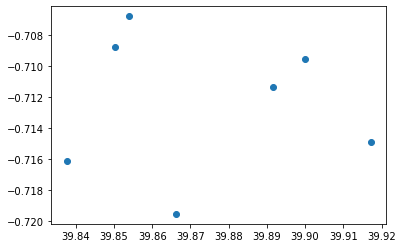

In [54]:
low_limit = -0.72
para_0 = []
para_1 = []
for i in optimizer_cell.res:
    los = i['target']
    if los > low_limit:
        #print("this is coordinate {0} {0} {1}; loss: {2} \n".format(i['params']['x'],i['params']['y'],los))
        para_0.append(i['params']['x_1'])
        para_1.append(los)

from matplotlib import pyplot as plt
plt.scatter(para_0,para_1)

In [15]:
optimizer_cell.max

{'target': -0.368314, 'params': {'x': 35.204508634404135}}

In [ ]:
t_1 = time()
optimizer.maximize(
    init_points=500,
    n_iter=500,
)
t_2 = time()
print(t_1,t_2)

|   iter    |  target   |     x     |
-------------------------------------
|  1        | -0.3743   |  29.6     |
|  2        | -0.3727   |  40.21    |
|  3        | -0.3911   |  15.0     |
|  4        | -0.3929   |  25.58    |
|  5        | -0.3859   |  20.14    |
|  6        | -0.3798   |  18.23    |
|  7        | -0.3736   |  21.52    |
|  8        | -0.3819   |  27.09    |
|  9        | -0.389    |  28.89    |
|  10       | -0.3947   |  33.86    |
|  11       | -0.3888   |  29.67    |
|  12       | -0.3719   |  38.98    |
|  13       | -0.3734   |  22.16    |
|  14       | -0.3739   |  45.73    |
|  15       | -0.3739   |  15.96    |
|  16       | -0.3878   |  38.47    |
|  17       | -0.3814   |  29.61    |
|  18       | -0.378    |  34.55    |
|  19       | -0.3768   |  19.91    |
|  20       | -0.3831   |  21.93    |
|  21       | -0.3846   |  43.03    |
|  22       | -0.3809   |  48.89    |
|  23       | -0.3786   |  25.97    |
|  24       | -0.3967   |  39.23    |
|  25       

In [37]:
print(t_1-t_2)

NameError: name 't_1' is not defined

In [1]:
from time import time
import os
def loss_fun_all(x,y,z):
    cmd = "decr_bias {0} {1} {2} < 0@g1.cr".format(x,y,z)
    p = os.popen(cmd)
    ret = -float(p.read())
    return ret

In [ ]:
from bayes_opt import BayesianOptimization

# Bounded region of parameter space
pbounds = {'x': (15, 50),"y": (0,0.125), "z": (0,1)}

optimizer_all = BayesianOptimization(
    f=loss_fun_all,
    pbounds=pbounds,
    random_state=1,
)
t_1 = time()
optimizer_all.maximize(
    init_points=1000,
    n_iter=1000,
)
t_2 = time()
print(t_1,t_2)

|   iter    |  target   |     x     |     y     |     z     |
-------------------------------------------------------------
|  1        | -1.219    |  29.6     |  0.09004  |  0.000114 |
|  2        | -1.219    |  25.58    |  0.01834  |  0.09234  |
|  3        | -1.214    |  21.52    |  0.0432   |  0.3968   |
|  4        | -1.209    |  33.86    |  0.0524   |  0.6852   |
|  5        | -1.267    |  22.16    |  0.1098   |  0.02739  |
|  6        | -1.299    |  38.47    |  0.05216  |  0.5587   |
|  7        | -1.217    |  19.91    |  0.02476  |  0.8007   |
|  8        | -1.285    |  48.89    |  0.03918  |  0.6923   |
|  9        | -1.225    |  45.67    |  0.1118   |  0.08504  |
|  10       | -1.27     |  16.37    |  0.02123  |  0.8781   |
|  11       | -1.335    |  18.44    |  0.05264  |  0.9579   |
|  12       | -1.282    |  33.66    |  0.08648  |  0.3155   |
|  13       | -1.247    |  39.03    |  0.1043   |  0.01829  |
|  14       | -1.275    |  41.26    |  0.1236   |  0.7482   |
|  15   

|  88       | -1.22     |  45.04    |  0.09439  |  0.6981   |
|  89       | -1.339    |  45.26    |  0.04034  |  0.6708   |
|  90       | -1.225    |  30.78    |  0.04776  |  0.4108   |
|  91       | -1.217    |  29.05    |  0.03967  |  0.6219   |
|  92       | -1.239    |  30.06    |  0.1217   |  0.6778   |
|  93       | -1.219    |  21.95    |  0.05334  |  0.3433   |
|  94       | -1.04     |  42.92    |  0.11     |  0.9038   |
|  95       | -1.3      |  38.2     |  0.03378  |  0.2524   |
|  96       | -1.215    |  44.92    |  0.06596  |  0.8022   |
|  97       | -0.8078   |  35.04    |  0.09164  |  0.519    |
|  98       | -1.208    |  41.98    |  0.07111  |  0.4657   |
|  99       | -1.246    |  26.99    |  0.008526 |  0.3779   |
|  100      | -1.212    |  17.79    |  0.1229   |  0.1816   |
|  101      | -1.131    |  43.42    |  0.1094   |  0.6884   |
|  102      | -1.168    |  34.93    |  0.02012  |  0.4669   |
|  103      | -1.192    |  27.08    |  0.02813  |  0.5925   |
|  104  

|  180      | -1.42     |  31.69    |  0.001642 |  0.353    |
|  181      | -1.336    |  32.22    |  0.09126  |  0.4686   |
|  182      | -1.242    |  31.01    |  0.01721  |  0.01089  |
|  183      | -1.338    |  41.54    |  0.03999  |  0.9844   |
|  184      | -1.22     |  22.71    |  0.04234  |  0.5239   |
|  185      | -1.294    |  41.42    |  0.05798  |  0.1248   |
|  186      | -1.201    |  25.94    |  0.06306  |  0.6738   |
|  187      | -1.0      |  41.96    |  0.01629  |  0.02292  |
|  188      | -1.387    |  33.17    |  0.1012   |  0.0126   |
|  189      | -1.312    |  38.54    |  0.08585  |  0.4492   |
|  190      | -1.221    |  47.02    |  0.08055  |  0.00524  |
|  191      | -1.214    |  31.95    |  0.1074   |  0.8304   |
|  192      | -1.325    |  37.72    |  0.08421  |  0.5785   |
|  193      | -1.212    |  24.59    |  0.07007  |  0.6717   |
|  194      | -1.202    |  27.34    |  0.107    |  0.195    |
|  195      | -1.217    |  41.16    |  0.0362   |  0.7738   |
|  196  

|  264      | -1.246    |  42.75    |  0.05412  |  0.3575   |
|  265      | -1.208    |  26.56    |  0.08717  |  0.2687   |
|  266      | -1.13     |  43.29    |  0.03691  |  0.5441   |
|  267      | -1.206    |  32.08    |  0.1069   |  0.8884   |
|  268      | -1.225    |  21.45    |  0.07317  |  0.8982   |
|  269      | -1.317    |  30.61    |  0.1152   |  0.279    |
|  270      | -1.034    |  36.31    |  0.08531  |  0.2282   |
|  271      | -1.239    |  15.48    |  0.05209  |  0.9385   |
|  272      | -1.193    |  27.01    |  0.09747  |  0.1747   |
|  273      | -1.195    |  26.97    |  0.01807  |  0.7168   |
|  274      | -1.246    |  39.48    |  0.08606  |  0.2534   |
|  275      | -1.425    |  39.23    |  0.02841  |  0.4246   |
|  276      | -1.407    |  28.02    |  0.04441  |  0.05765  |
|  277      | -1.39     |  37.11    |  0.08841  |  0.6136   |
|  278      | -1.203    |  37.69    |  0.02124  |  0.1494   |
|  279      | -1.233    |  33.0     |  0.1094   |  0.184    |
|  280  

|  351      | -1.21     |  23.25    |  0.1176   |  0.6842   |
|  352      | -1.206    |  17.27    |  0.1088   |  0.7014   |
|  353      | -0.9867   |  36.17    |  0.09155  |  0.2534   |
|  354      | -1.054    |  36.02    |  0.1018   |  0.05411  |
|  355      | -1.219    |  19.57    |  0.1053   |  0.6183   |
|  356      | -1.236    |  33.6     |  0.03104  |  0.2951   |
|  357      | -1.219    |  45.54    |  0.05271  |  0.06443  |
|  358      | -1.229    |  46.39    |  0.02542  |  0.8262   |
|  359      | -1.312    |  45.86    |  0.06084  |  0.5985   |
|  360      | -1.236    |  33.45    |  0.0781   |  0.855    |
|  361      | -1.198    |  24.87    |  0.1105   |  0.5677   |
|  362      | -1.223    |  19.03    |  0.02838  |  0.596    |
|  363      | -1.219    |  23.38    |  0.01643  |  0.1618   |
|  364      | -1.215    |  44.57    |  0.07527  |  0.9636   |
|  365      | -1.205    |  27.1     |  0.07445  |  0.599    |
|  366      | -1.346    |  36.55    |  0.007397 |  0.7503   |
|  367  

|  437      | -1.234    |  28.79    |  0.08612  |  0.404    |
|  438      | -1.208    |  19.76    |  0.05633  |  0.3344   |
|  439      | -1.214    |  22.63    |  0.1157   |  0.6896   |
|  440      | -0.9794   |  35.96    |  0.09333  |  0.542    |
|  441      | -1.469    |  39.52    |  0.1163   |  0.8626   |
|  442      | -1.225    |  20.86    |  0.03289  |  0.07161  |
|  443      | -1.259    |  49.25    |  0.02955  |  0.6606   |
|  444      | -1.211    |  18.14    |  0.02635  |  0.5028   |
|  445      | -1.263    |  18.67    |  0.04861  |  0.538    |
|  446      | -1.211    |  26.87    |  0.06949  |  0.5368   |
|  447      | -1.263    |  28.67    |  0.08703  |  0.6785   |
|  448      | -1.699    |  39.06    |  0.07019  |  0.3581   |
|  449      | -1.476    |  36.46    |  0.117    |  0.5969   |
|  450      | -1.234    |  49.29    |  0.05513  |  0.7396   |
|  451      | -1.239    |  16.32    |  0.09559  |  0.5183   |
|  452      | -1.227    |  15.19    |  0.03465  |  0.5348   |
|  453  

|  519      | -1.217    |  46.41    |  0.05673  |  0.5578   |
|  520      | -1.266    |  32.71    |  0.0865   |  0.6829   |
|  521      | -1.299    |  33.21    |  0.1036   |  0.5058   |
|  522      | -1.206    |  43.87    |  0.03523  |  0.1785   |
|  523      | -1.263    |  48.95    |  0.09274  |  0.2598   |
|  524      | -1.04     |  35.34    |  0.1194   |  0.08075  |
|  525      | -1.204    |  17.92    |  0.07739  |  0.2245   |
|  526      | -1.381    |  41.78    |  0.07102  |  0.6662   |
|  527      | -1.273    |  18.77    |  0.01054  |  0.6251   |
|  528      | -1.287    |  29.34    |  0.01091  |  0.3711   |
|  529      | -1.392    |  38.53    |  0.0237   |  0.8957   |
|  530      | -1.377    |  48.24    |  0.1202   |  0.7301   |
|  531      | -1.272    |  29.22    |  0.09297  |  0.288    |
|  532      | -1.227    |  26.0     |  0.07574  |  0.5948   |
|  533      | -1.224    |  45.75    |  0.03183  |  0.7662   |
|  534      | -1.239    |  47.94    |  0.000129 |  0.4761   |
|  535  

|  600      | -1.233    |  46.53    |  0.09635  |  0.4207   |
|  601      | -1.241    |  49.23    |  0.03135  |  0.3336   |
|  602      | -1.234    |  48.4     |  0.1011   |  0.9003   |
|  603      | -1.221    |  15.41    |  0.04747  |  0.2355   |
|  604      | -1.225    |  25.36    |  0.09225  |  0.7241   |
|  605      | -1.226    |  31.16    |  0.04566  |  0.5847   |
|  606      | -1.236    |  33.68    |  0.06882  |  0.6155   |
|  607      | -1.489    |  28.85    |  0.09646  |  0.2512   |
|  608      | -1.241    |  37.95    |  0.12     |  0.003555 |
|  609      | -1.348    |  40.32    |  0.01362  |  0.5438   |
|  610      | -1.259    |  36.94    |  0.03037  |  0.9138   |
|  611      | -1.048    |  36.78    |  0.02896  |  0.7701   |
|  612      | -1.297    |  18.69    |  0.0694   |  0.09496  |
|  613      | -0.7596   |  35.33    |  0.03162  |  0.6495   |
|  614      | -1.347    |  40.05    |  0.06552  |  0.6575   |
|  615      | -1.14     |  43.47    |  0.1009   |  0.6197   |
|  616  

|  684      | -1.177    |  43.86    |  0.1067   |  0.5958   |
|  685      | -1.209    |  23.41    |  0.02331  |  0.7434   |
|  686      | -1.28     |  23.3     |  0.06744  |  0.7493   |
|  687      | -1.211    |  22.99    |  0.02181  |  0.03974  |
|  688      | -1.223    |  20.16    |  0.1064   |  0.1046   |
|  689      | -1.227    |  22.83    |  0.004095 |  0.6764   |
|  690      | -1.359    |  23.11    |  0.0517   |  0.1393   |
|  691      | -1.252    |  28.2     |  0.05305  |  0.473    |
|  692      | -1.24     |  29.8     |  0.01284  |  0.7726   |
|  693      | -1.222    |  19.8     |  0.05304  |  0.272    |
|  694      | -1.192    |  25.54    |  0.08405  |  0.5178   |
|  695      | -1.22     |  21.65    |  0.05864  |  0.3395   |
|  696      | -1.776    |  39.66    |  0.02826  |  0.845    |
|  697      | -1.259    |  33.42    |  0.06258  |  0.2537   |
|  698      | -1.237    |  21.52    |  0.05898  |  0.9818   |
|  699      | -1.217    |  19.65    |  0.03543  |  0.8006   |
|  700  

|  768      | -1.226    |  32.83    |  0.1107   |  0.5653   |
|  769      | -1.247    |  38.21    |  0.05517  |  0.9721   |
|  770      | -1.278    |  40.99    |  0.04436  |  0.6535   |
|  771      | -1.295    |  33.99    |  0.1105   |  0.2751   |
|  772      | -1.374    |  18.78    |  0.02391  |  0.387    |
|  773      | -1.237    |  44.89    |  0.03386  |  0.6264   |
|  774      | -1.17     |  36.82    |  0.05101  |  0.05034  |
|  775      | -1.668    |  41.07    |  0.03697  |  0.3985   |
|  776      | -1.249    |  28.2     |  0.08295  |  0.08633  |
|  777      | -1.22     |  34.25    |  0.001928 |  0.983    |
|  778      | -0.9503   |  35.94    |  0.04801  |  0.1467   |
|  779      | -1.789    |  39.39    |  0.1132   |  0.3181   |
|  780      | -1.414    |  41.83    |  0.03594  |  0.9572   |
|  781      | -1.463    |  39.58    |  0.07813  |  0.9307   |
|  782      | -1.207    |  24.42    |  0.1155   |  0.6781   |
|  783      | -1.211    |  42.0     |  0.07145  |  0.8339   |
|  784  

|  854      | -0.9863   |  42.65    |  0.1076   |  0.1295   |
|  855      | -1.489    |  35.13    |  0.02685  |  0.8682   |
|  856      | -1.288    |  15.53    |  0.01322  |  0.3761   |
|  857      | -1.26     |  29.07    |  0.03465  |  0.09606  |
|  858      | -1.236    |  19.16    |  0.03974  |  0.9508   |
|  859      | -1.285    |  22.26    |  0.09341  |  0.2582   |
|  860      | -1.293    |  16.3     |  0.002007 |  0.1527   |
|  861      | -1.383    |  31.17    |  0.09449  |  0.7288   |
|  862      | -1.212    |  27.33    |  0.05989  |  0.8141   |
|  863      | -1.202    |  44.34    |  0.03999  |  0.004265 |
|  864      | -1.212    |  16.64    |  0.09223  |  0.2726   |
|  865      | -1.248    |  31.85    |  0.024    |  0.8471   |
|  866      | -1.218    |  32.62    |  0.0659   |  0.2881   |
|  867      | -1.232    |  32.92    |  0.000245 |  0.2773   |
|  868      | -1.21     |  27.21    |  0.03549  |  0.08595  |
|  869      | -1.234    |  33.26    |  0.09856  |  0.9426   |
|  870  

|  937      | -1.236    |  46.07    |  0.004404 |  0.2575   |
|  938      | -1.292    |  37.81    |  0.03572  |  0.009708 |
|  939      | -0.7498   |  35.14    |  0.03847  |  0.1515   |
|  940      | -1.237    |  48.99    |  0.02062  |  0.7272   |
|  941      | -1.229    |  46.18    |  0.1073   |  0.1843   |
|  942      | -1.215    |  23.29    |  0.002295 |  0.9314   |
|  943      | -1.231    |  46.05    |  0.07443  |  0.1094   |
|  944      | -1.267    |  21.07    |  0.07212  |  0.2517   |
|  945      | -1.21     |  25.51    |  0.02137  |  0.1896   |
|  946      | -1.283    |  31.22    |  0.06373  |  0.5116   |
|  947      | -1.234    |  49.9     |  0.0162   |  0.7562   |
|  948      | -1.214    |  42.78    |  0.07311  |  0.4627   |
|  949      | -1.228    |  46.27    |  0.1035   |  0.05029  |
|  950      | -1.244    |  48.7     |  0.000917 |  0.5731   |
|  951      | -1.336    |  35.04    |  0.1043   |  0.3847   |
|  952      | -1.216    |  18.19    |  0.07271  |  0.02485  |
|  953  

|  1018     | -1.232    |  49.99    |  0.00623  |  0.04157  |
|  1019     | -1.208    |  24.13    |  0.1036   |  0.8913   |
|  1020     | -1.258    |  50.0     |  0.125    |  1.0      |
|  1021     | -1.248    |  29.2     |  0.004012 |  0.9958   |
|  1022     | -1.212    |  23.05    |  0.008098 |  0.7038   |
|  1023     | -1.249    |  37.94    |  0.125    |  1.0      |
|  1024     | -1.245    |  30.13    |  0.01434  |  0.9978   |
|  1025     | -1.301    |  44.37    |  0.05231  |  0.2961   |
|  1026     | -1.274    |  41.7     |  0.125    |  0.0      |
|  1027     | -0.8057   |  35.25    |  0.1097   |  0.9928   |
|  1028     | -1.371    |  48.78    |  0.1198   |  0.9755   |
|  1029     | -1.151    |  43.45    |  0.0      |  1.0      |
|  1030     | -1.226    |  22.36    |  0.0      |  1.0      |
|  1031     | -1.415    |  35.28    |  0.0      |  1.0      |
|  1032     | -1.265    |  18.61    |  0.007144 |  0.3696   |
|  1033     | -1.402    |  35.44    |  0.09415  |  0.856    |
|  1034 

|  1099     | -0.9718   |  42.34    |  0.0      |  1.0      |
|  1100     | -1.27     |  25.32    |  0.001063 |  0.1558   |
|  1101     | -1.269    |  40.71    |  0.125    |  0.0      |
|  1102     | -1.269    |  16.23    |  0.1238   |  0.9889   |
|  1103     | -1.264    |  48.98    |  0.125    |  0.0      |
|  1104     | -1.274    |  39.22    |  0.125    |  1.0      |
|  1105     | -1.272    |  28.47    |  0.125    |  0.0      |
|  1106     | -0.9504   |  35.86    |  0.008933 |  0.625    |
|  1107     | -1.221    |  34.32    |  0.0      |  0.0      |
|  1108     | -1.278    |  28.73    |  0.125    |  0.0      |
|  1109     | -0.966    |  42.5     |  0.0      |  0.6994   |
|  1110     | -1.269    |  44.12    |  0.1197   |  0.00914  |
|  1111     | -1.399    |  21.16    |  0.02446  |  0.1383   |
|  1112     | -1.278    |  46.65    |  0.006713 |  0.1339   |
|  1113     | -1.231    |  45.86    |  0.000389 |  0.01735  |
|  1114     | -1.994    |  40.19    |  0.0      |  0.0      |
|  1115 

|  1180     | -1.233    |  34.0     |  0.0      |  1.0      |
|  1181     | -1.214    |  27.54    |  0.001314 |  0.7178   |
|  1182     | -1.219    |  15.49    |  0.09324  |  0.08686  |
|  1183     | -1.248    |  29.34    |  0.001548 |  0.7539   |
|  1184     | -1.214    |  16.62    |  0.0      |  0.0      |
|  1185     | -1.204    |  26.86    |  0.03947  |  0.3631   |
|  1186     | -1.229    |  46.38    |  0.007395 |  0.311    |
|  1187     | -1.243    |  47.9     |  0.0      |  0.0      |
|  1188     | -1.024    |  42.8     |  0.0      |  1.0      |
|  1189     | -1.233    |  45.44    |  0.0      |  1.0      |
|  1190     | -1.209    |  26.49    |  0.05226  |  0.07114  |
|  1191     | -1.225    |  19.49    |  0.004498 |  0.3314   |
|  1192     | -1.294    |  33.86    |  0.1205   |  0.01362  |
|  1193     | -1.277    |  33.47    |  0.1111   |  0.000242 |
|  1194     | -1.246    |  23.94    |  0.125    |  1.0      |
|  1195     | -1.264    |  25.35    |  0.08916  |  0.722    |
|  1196 

|  1261     | -0.8298   |  35.14    |  0.009314 |  0.6299   |
|  1262     | -1.209    |  24.14    |  0.0      |  0.0      |
|  1263     | -0.4863   |  35.09    |  0.00162  |  0.549    |
|  1264     | -1.172    |  34.99    |  0.0      |  0.0      |
|  1265     | -1.233    |  32.77    |  0.0      |  0.0      |
|  1266     | -0.9394   |  35.47    |  0.0      |  0.6965   |
|  1267     | -1.283    |  30.85    |  0.125    |  0.0      |
|  1268     | -1.26     |  44.35    |  0.125    |  1.0      |
|  1269     | -1.942    |  40.52    |  0.003371 |  0.002781 |
|  1270     | -1.214    |  26.7     |  0.01473  |  0.9966   |
|  1271     | -1.271    |  28.51    |  0.125    |  1.0      |
|  1272     | -1.234    |  49.63    |  0.1168   |  0.05521  |
|  1273     | -1.209    |  24.97    |  0.0      |  1.0      |
|  1274     | -1.231    |  18.95    |  0.004241 |  0.9994   |
|  1275     | -1.287    |  22.04    |  0.1119   |  0.5272   |
|  1276     | -1.258    |  20.97    |  0.125    |  0.0      |
|  1277 

|  1342     | -1.21     |  18.13    |  0.02905  |  0.4891   |
|  1343     | -1.015    |  36.41    |  0.003184 |  0.5621   |
|  1344     | -1.311    |  48.59    |  0.1246   |  0.5312   |
|  1345     | -1.233    |  49.58    |  0.1101   |  0.428    |
|  1346     | -1.262    |  48.75    |  0.125    |  0.0      |
|  1347     | -1.281    |  15.0     |  0.125    |  1.0      |
|  1348     | -1.268    |  15.84    |  0.125    |  1.0      |
|  1349     | -1.232    |  32.86    |  0.1179   |  0.8041   |
|  1350     | -2.079    |  38.75    |  0.0637   |  0.8073   |
|  1351     | -1.23     |  46.86    |  0.1217   |  0.6641   |
|  1352     | -0.5883   |  35.2     |  0.06438  |  0.9785   |
|  1353     | -1.228    |  22.14    |  0.0      |  1.0      |
|  1354     | -1.001    |  35.05    |  0.0      |  1.0      |
|  1355     | -1.273    |  40.08    |  0.125    |  0.0      |
|  1356     | -0.7876   |  35.11    |  0.05677  |  0.5382   |
|  1357     | -1.267    |  45.92    |  0.125    |  0.0      |
|  1358 

|  1423     | -1.225    |  22.65    |  0.0      |  1.0      |
|  1424     | -1.289    |  35.9     |  0.1224   |  0.6625   |
|  1425     | -1.244    |  25.17    |  0.125    |  0.0      |
|  1426     | -1.219    |  26.49    |  0.000659 |  0.7508   |
|  1427     | -1.227    |  20.15    |  0.1198   |  0.3924   |
|  1428     | -1.257    |  21.49    |  0.125    |  0.0      |
|  1429     | -1.268    |  33.86    |  0.0      |  0.4134   |
|  1430     | -1.209    |  44.21    |  0.125    |  0.6965   |
|  1431     | -1.252    |  30.42    |  0.0      |  1.0      |
|  1432     | -1.243    |  16.7     |  0.125    |  0.0      |
|  1433     | -1.269    |  38.77    |  0.125    |  0.0      |
|  1434     | -1.024    |  42.33    |  0.0      |  0.5895   |
|  1435     | -1.378    |  18.97    |  0.1185   |  0.227    |
|  1436     | -1.144    |  43.5     |  0.125    |  0.1833   |
|  1437     | -1.373    |  17.45    |  0.1237   |  0.2729   |
|  1438     | -1.102    |  43.01    |  0.00117  |  0.1653   |
|  1439 

|  1504     | -1.217    |  19.41    |  0.006318 |  0.8094   |
|  1505     | -1.278    |  31.88    |  9.685e-0 |  0.1608   |
|  1506     | -1.258    |  34.61    |  0.0553   |  0.4563   |
|  1507     | -1.402    |  50.0     |  0.125    |  0.7719   |
|  1508     | -1.301    |  30.33    |  0.1196   |  0.4673   |
|  1509     | -1.264    |  22.47    |  0.125    |  0.0      |
|  1510     | -1.109    |  42.56    |  0.0      |  0.8474   |
|  1511     | -1.146    |  43.45    |  0.1243   |  0.359    |
|  1512     | -0.9183   |  35.66    |  0.125    |  0.0      |
|  1513     | -1.17     |  41.98    |  0.125    |  1.0      |
|  1514     | -1.271    |  26.3     |  0.0      |  0.1574   |
|  1515     | -1.397    |  48.33    |  0.000587 |  0.8963   |
|  1516     | -1.248    |  31.35    |  0.0      |  0.0      |
|  1517     | -0.7152   |  35.62    |  0.001597 |  0.9399   |
|  1518     | -1.249    |  34.69    |  0.125    |  0.1544   |
|  1519     | -1.269    |  46.11    |  0.1217   |  0.9996   |
|  1520 

|  1585     | -1.358    |  27.17    |  0.06278  |  0.7745   |
|  1586     | -1.532    |  39.56    |  0.0      |  0.2432   |
|  1587     | -1.402    |  39.84    |  0.1245   |  0.06124  |
|  1588     | -1.26     |  30.49    |  0.125    |  0.7029   |


TypeError: 'dict' object is not callable

In [ ]:
print(t_1,t_2)

In [4]:
optimizer_all.max

{'target': -0.761957,
 'params': {'x': 35.49246940703061,
  'y': 0.005224349811336765,
  'z': 0.4607102875501986}}

In [19]:
low_limit = -0.40
para_0 = []
para_1 = []
for i in optimizer_all.res:
    los = i['target']
    if los > low_limit:
        #print("this is coordinate {0} {0} {1}; loss: {2} \n".format(i['params']['x'],i['params']['y'],los))
        para_0.append(i['params']['x'])
        para_1.append(los)

from matplotlib import pyplot as plt
plt.scatter(para_0,para_1)

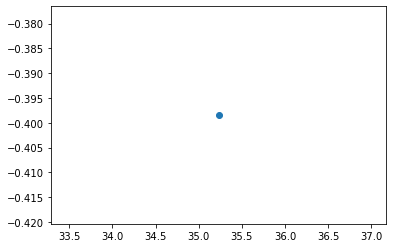

In [20]:
from matplotlib import pyplot as plt
plt.scatter(para_0,para_1)

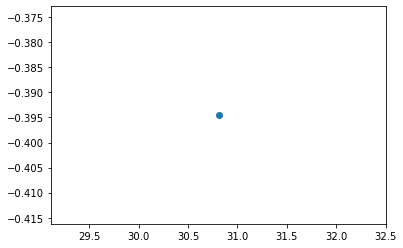

In [26]:
from matplotlib import pyplot as plt
plt.scatter(para_0,para_1)

In [ ]:
decr_bias 25 0.0418449 0.475916 < 0@g1.cr

In [20]:
t_1 = time()
for i in range(5):loss_fun(0.2969,0.5228)
t_2 = time()
print(t_2-t_1)

0.0836484432220459


In [21]:
from bayes_opt import BayesianOptimization

# Bounded region of parameter space
pbounds = {'x': (0, 1), 'y': (0, 1)}

optimizer = BayesianOptimization(
    f=loss_fun,
    pbounds=pbounds,
    random_state=1,
)

In [32]:
t_1 = time()
optimizer.maximize(
    init_points=50,
    n_iter=500,
)
t_2 = time()
print(t_1,t_2)

|   iter    |  target   |     x     |     y     |
-------------------------------------------------
|  434      | -0.6988   |  0.2076   |  0.9173   |
|  435      | -0.6259   |  0.7113   |  0.5539   |
|  436      | -0.6918   |  0.3045   |  0.8349   |
|  437      | -0.7248   |  0.4353   |  0.9235   |
|  438      | -0.0925   |  0.7061   |  0.478    |
|  439      | -0.9562   |  0.1262   |  0.976    |
|  440      | -0.6835   |  0.1598   |  0.2026   |
|  441      | -0.7024   |  0.4312   |  0.4042   |
|  442      | -0.6196   |  0.1468   |  0.7293   |
|  443      | -0.6798   |  0.1887   |  0.6439   |
|  444      | -1.041    |  0.7543   |  0.2107   |
|  445      | -0.5961   |  0.601    |  0.7489   |
|  446      | -1.081    |  0.6382   |  0.5971   |
|  447      | -0.8365   |  0.2955   |  0.7316   |
|  448      | -0.6933   |  0.9453   |  0.4256   |
|  449      | -0.39     |  0.7822   |  0.05614  |
|  450      | -1.252    |  0.8353   |  0.1923   |
|  451      | -0.7208   |  0.3951   |  0.3001   |


|  556      | -0.3044   |  0.2435   |  0.9175   |
|  557      | -0.248    |  0.2403   |  0.07456  |
|  558      | -0.2731   |  0.7438   |  0.4211   |
|  559      | -0.2933   |  0.0      |  0.5798   |
|  560      | -0.2452   |  0.5138   |  0.567    |
|  561      | -0.2346   |  0.254    |  0.5686   |
|  562      | -0.305    |  0.559    |  0.4877   |
|  563      | -0.04739  |  0.04737  |  0.9779   |
|  564      | -0.152    |  0.05045  |  0.9682   |
|  565      | -0.1934   |  0.05454  |  0.9792   |
|  566      | -0.3019   |  0.03574  |  0.9768   |
|  567      | -0.7473   |  0.3466   |  0.3096   |
|  568      | -1.311    |  0.3514   |  0.5956   |
|  569      | -0.5097   |  0.1787   |  0.0      |
|  570      | -0.4248   |  0.9531   |  0.4842   |
|  571      | -0.7329   |  0.6813   |  0.1539   |
|  572      | -0.6254   |  0.9551   |  0.368    |
|  573      | -0.5179   |  0.822    |  0.7496   |
|  574      | -0.621    |  0.7721   |  0.8826   |
|  575      | -0.718    |  0.3218   |  0.4031   |


|  656      | -0.1145   |  0.5502   |  0.9835   |
|  657      | -0.6656   |  0.2366   |  0.6628   |
|  658      | -0.7562   |  0.1743   |  0.7747   |
|  659      | -0.06124  |  0.7015   |  0.4785   |
|  660      | -0.3245   |  0.7537   |  0.08332  |
|  661      | -0.6368   |  0.04644  |  0.5842   |
|  662      | -0.2552   |  0.2983   |  0.0      |
|  663      | -0.42     |  0.4458   |  0.9893   |
|  664      | -0.4225   |  0.44     |  0.05021  |
|  665      | -0.05159  |  0.7038   |  0.9776   |
|  666      | -0.08078  |  0.5493   |  0.9751   |
|  667      | -0.057    |  0.7042   |  0.9778   |
|  668      | -0.04648  |  0.203    |  0.478    |
|  669      | -1.34     |  0.2699   |  0.6401   |
|  670      | -0.3065   |  1.0      |  0.4437   |
|  671      | -0.05738  |  0.2019   |  0.4763   |
|  672      | -0.7005   |  0.3768   |  0.0      |
|  673      | -0.75     |  0.1992   |  0.676    |
|  674      | -0.2564   |  2.363e-0 |  0.9241   |
|  675      | -0.5868   |  0.02497  |  0.6435   |


|  756      | -0.05415  |  0.2039   |  0.4794   |
|  757      | -0.2363   |  0.04442  |  0.0      |
|  758      | -0.4573   |  0.05248  |  0.01597  |
|  759      | -0.04949  |  0.5476   |  0.9784   |
|  760      | -0.6066   |  0.5087   |  0.8898   |
|  761      | -0.0567   |  0.4542   |  0.02238  |
|  762      | -0.1496   |  0.4576   |  0.01293  |
|  763      | -0.12     |  0.4486   |  0.0223   |
|  764      | -0.06597  |  0.4547   |  0.0228   |
|  765      | -0.5739   |  0.3373   |  0.7652   |
|  766      | -0.5786   |  0.08865  |  0.2568   |
|  767      | -1.033    |  0.03039  |  0.1882   |
|  768      | -0.6953   |  0.9509   |  0.4569   |
|  769      | -0.05712  |  0.4539   |  0.01963  |
|  770      | -0.601    |  0.1564   |  0.0      |
|  771      | -0.315    |  1.0      |  0.05566  |
|  772      | -0.2708   |  0.9866   |  0.4269   |
|  773      | -0.6386   |  0.8435   |  0.2831   |
|  774      | -0.05437  |  0.704    |  0.9774   |
|  775      | -0.4614   |  0.9987   |  0.9547   |


|  862      | -0.3077   |  0.2549   |  0.08215  |
|  863      | -0.5198   |  0.5723   |  0.2433   |
|  864      | -0.05224  |  0.2029   |  0.4801   |
|  865      | -0.9241   |  0.0      |  0.6532   |
|  866      | -0.05268  |  0.7034   |  0.4762   |
|  867      | -0.06974  |  0.9511   |  0.02409  |
|  868      | -0.0595   |  0.2015   |  0.4778   |
|  869      | -0.07478  |  0.2046   |  0.9822   |
|  870      | -0.04743  |  0.7026   |  0.9778   |
|  871      | -1.057    |  0.1716   |  0.9254   |
|  872      | -0.885    |  0.6512   |  0.08513  |
|  873      | -0.6891   |  0.4387   |  0.3473   |
|  874      | -0.2365   |  0.7063   |  1.0      |
|  875      | -0.05799  |  0.7984   |  0.02192  |
|  876      | -0.05929  |  0.7965   |  0.01873  |
|  877      | -0.1951   |  0.8046   |  0.02512  |
|  878      | -0.3343   |  0.4812   |  0.07321  |
|  879      | -0.05509  |  0.7022   |  0.9761   |
|  880      | -0.06407  |  0.7953   |  0.02097  |
|  881      | -1.238    |  0.000213 |  0.2697   |


|  962      | -0.05881  |  0.7984   |  0.5226   |
|  963      | -0.05225  |  0.0479   |  0.9784   |
|  964      | -0.04716  |  0.203    |  0.9773   |
|  965      | -0.8981   |  0.9995   |  0.6507   |
|  966      | -0.7321   |  0.6033   |  0.4734   |
|  967      | -0.5838   |  0.2429   |  0.8918   |
|  968      | -0.05053  |  0.2978   |  0.5221   |
|  969      | -0.05217  |  0.7961   |  0.5213   |
|  970      | -0.2818   |  0.5036   |  0.556    |
|  971      | -0.6038   |  0.7826   |  0.3622   |
|  972      | -0.0667   |  0.2989   |  0.5228   |
|  973      | -1.677    |  0.03222  |  0.8498   |
|  974      | -0.6738   |  0.9378   |  0.3893   |
|  975      | -0.06042  |  0.298    |  0.5195   |
|  976      | -0.8605   |  0.8368   |  0.3425   |
|  977      | -0.0509   |  0.2962   |  0.5212   |
|  978      | -0.7649   |  0.07669  |  0.6109   |
|  979      | -0.04709  |  0.7973   |  0.02238  |
|  980      | -0.6176   |  0.541    |  0.108    |
|  981      | -0.3857   |  0.2442   |  0.4476   |


In [46]:
optimizer.res

[]

In [34]:
print(t_1-t_2)

-6946.7751388549805


In [42]:
t_1 = time()
pbounds = {'x': (0, 1), 'y': (0, 1)}

optimizer_0 = BayesianOptimization(
    f=loss_fun,
    pbounds=pbounds,
    random_state=1,
)
optimizer_0.maximize(
    init_points=100,
    n_iter=1500,
)
t_2 = time()
print(t_1,t_2)

|   iter    |  target   |     x     |     y     |
-------------------------------------------------
|  1        | -0.7653   |  0.417    |  0.7203   |
|  2        | -0.9626   |  0.000114 |  0.3023   |
|  3        | -0.9881   |  0.1468   |  0.09234  |
|  4        | -1.953    |  0.1863   |  0.3456   |
|  5        | -0.8619   |  0.3968   |  0.5388   |
|  6        | -1.421    |  0.4192   |  0.6852   |
|  7        | -1.501    |  0.2045   |  0.8781   |
|  8        | -0.6585   |  0.02739  |  0.6705   |
|  9        | -0.7118   |  0.4173   |  0.5587   |
|  10       | -0.7362   |  0.1404   |  0.1981   |
|  11       | -0.6054   |  0.8007   |  0.9683   |
|  12       | -1.79     |  0.3134   |  0.6923   |
|  13       | -1.247    |  0.8764   |  0.8946   |
|  14       | -0.6411   |  0.08504  |  0.03905  |
|  15       | -1.691    |  0.1698   |  0.8781   |
|  16       | -1.429    |  0.09835  |  0.4211   |
|  17       | -0.208    |  0.9579   |  0.5332   |
|  18       | -1.984    |  0.6919   |  0.3155   |


|  101      | -0.3684   |  1.0      |  0.4482   |
|  102      | -0.5774   |  0.06384  |  0.7541   |
|  103      | -0.582    |  0.3314   |  0.002875 |
|  104      | -1.484    |  1.0      |  1.0      |
|  105      | -1.079    |  0.5131   |  1.0      |
|  106      | -1.484    |  0.0      |  1.0      |
|  107      | -0.2702   |  0.7105   |  0.000736 |
|  108      | -0.5894   |  0.8335   |  0.004952 |
|  109      | -1.018    |  0.5532   |  0.702    |
|  110      | -1.309    |  0.1484   |  0.4067   |
|  111      | -1.034    |  0.4012   |  0.8616   |
|  112      | -1.484    |  1.0      |  0.0      |
|  113      | -1.038    |  0.4005   |  0.36     |
|  114      | -1.185    |  0.9981   |  0.2733   |
|  115      | -1.151    |  0.1068   |  0.6336   |
|  116      | -1.406    |  0.2465   |  0.005361 |
|  117      | -0.3207   |  0.4431   |  0.003849 |
|  118      | -1.083    |  0.7623   |  0.4943   |
|  119      | -1.597    |  0.2195   |  0.8328   |
|  120      | -0.8457   |  0.0      |  0.8531   |


|  201      | -0.8657   |  0.3828   |  0.9311   |
|  202      | -0.4925   |  0.7269   |  0.03827  |
|  203      | -0.7182   |  0.07907  |  0.1965   |
|  204      | -1.035    |  0.5995   |  0.6413   |
|  205      | -0.9807   |  0.2675   |  0.3026   |
|  206      | -0.5121   |  0.5275   |  0.08538  |
|  207      | -0.3543   |  0.4509   |  0.05156  |
|  208      | -0.2251   |  0.0      |  0.07033  |
|  209      | -0.601    |  0.09326  |  1.0      |
|  210      | -0.7107   |  0.3632   |  0.01289  |
|  211      | -0.674    |  0.3831   |  0.7759   |
|  212      | -0.8065   |  0.6908   |  0.6784   |
|  213      | -0.3292   |  1.0      |  0.08307  |
|  214      | -0.5455   |  0.9598   |  0.07567  |
|  215      | -0.5636   |  0.9207   |  0.514    |
|  216      | -0.4024   |  0.7185   |  0.9387   |
|  217      | -0.6285   |  0.04788  |  0.611    |
|  218      | -0.5559   |  0.2703   |  0.8961   |
|  219      | -0.2511   |  0.515    |  0.5629   |
|  220      | -0.3592   |  0.3075   |  0.04635  |


|  301      | -0.3703   |  0.2365   |  0.9437   |
|  302      | -0.5938   |  0.4628   |  0.8578   |
|  303      | -0.372    |  0.05862  |  1.0      |
|  304      | -0.6351   |  0.2232   |  0.1219   |
|  341      | -0.4952   |  0.2313   |  0.5954   |
|  342      | -0.2967   |  0.9482   |  0.04446  |
|  343      | -0.478    |  0.8168   |  0.5427   |
|  344      | -0.7536   |  0.9277   |  0.8467   |
|  345      | -0.6795   |  0.1556   |  0.549    |
|  346      | -0.2432   |  0.6933   |  0.9741   |
|  347      | -0.3619   |  0.7166   |  0.9691   |
|  348      | -0.6012   |  0.000665 |  0.3912   |
|  349      | -0.8369   |  0.001687 |  0.3644   |
|  350      | -0.5325   |  0.9327   |  0.2545   |
|  351      | -0.6506   |  0.5097   |  0.6438   |
|  352      | -0.803    |  0.5557   |  0.243    |
|  353      | -0.9984   |  0.7736   |  0.8131   |
|  354      | -0.619    |  0.598    |  0.5221   |
|  355      | -0.7143   |  0.128    |  0.0389   |
|  356      | -0.2451   |  0.9999   |  0.9376   |


|  437      | -0.7085   |  0.2975   |  0.451    |
|  438      | -0.3359   |  0.8086   |  0.005019 |
|  439      | -1.472    |  0.4714   |  0.6269   |
|  440      | -0.4554   |  0.1842   |  0.0      |
|  441      | -0.7022   |  0.8727   |  0.000719 |
|  442      | -0.4988   |  0.5671   |  0.4531   |
|  443      | -0.8202   |  0.08938  |  0.08547  |
|  444      | -0.4922   |  0.5714   |  0.4906   |
|  445      | -0.9849   |  0.4954   |  0.3354   |
|  446      | -0.3428   |  0.7374   |  0.4119   |
|  447      | -0.578    |  0.08607  |  0.7314   |
|  448      | -0.7111   |  0.6918   |  0.7428   |
|  449      | -0.5935   |  0.3316   |  0.03424  |
|  450      | -0.8848   |  0.3993   |  0.4169   |
|  451      | -0.3628   |  0.4777   |  0.94     |
|  452      | -0.2258   |  0.2577   |  0.4272   |
|  453      | -0.4231   |  0.04752  |  0.9389   |
|  454      | -0.2197   |  0.6951   |  0.486    |
|  455      | -0.06707  |  0.7978   |  0.02572  |
|  456      | -0.07477  |  0.7993   |  0.02158  |


|  537      | -0.6163   |  0.1498   |  0.759    |
|  538      | -0.4934   |  0.8098   |  0.4859   |
|  539      | -0.634    |  0.3531   |  0.2765   |
|  540      | -1.102    |  1.0      |  0.3288   |
|  541      | -0.6273   |  0.2026   |  0.1573   |
|  542      | -0.3331   |  0.05062  |  0.5052   |
|  543      | -0.6428   |  0.8902   |  0.7737   |
|  544      | -0.6925   |  0.8179   |  0.9519   |
|  545      | -0.4328   |  0.04347  |  0.436    |
|  546      | -0.2215   |  0.2432   |  0.07245  |
|  547      | -0.2732   |  0.9862   |  0.07172  |
|  548      | -0.3189   |  0.983    |  0.9267   |
|  549      | -0.2329   |  0.9875   |  0.432    |
|  550      | -0.6888   |  0.4354   |  0.886    |
|  551      | -0.2632   |  0.01349  |  0.07166  |
|  552      | -0.8072   |  0.5549   |  0.4219   |
|  553      | -0.04766  |  0.0473   |  0.4786   |
|  554      | -0.581    |  0.7251   |  0.6611   |
|  555      | -0.2496   |  0.000456 |  0.925    |
|  556      | -0.3913   |  0.02077  |  0.5461   |


|  637      | -1.241    |  0.254    |  0.6601   |
|  638      | -0.07129  |  0.9509   |  0.5232   |
|  639      | -0.6134   |  0.2627   |  0.8488   |
|  640      | -0.7636   |  0.5732   |  0.2743   |
|  641      | -0.6881   |  0.3978   |  0.4535   |
|  642      | -0.7743   |  0.4412   |  0.7386   |
|  643      | -0.552    |  0.7554   |  0.1051   |
|  644      | -1.293    |  0.000231 |  0.266    |
|  645      | -0.05789  |  0.2957   |  0.5217   |
|  646      | -0.06008  |  0.5474   |  0.4813   |
|  647      | -0.5394   |  0.2776   |  1.0      |
|  648      | -0.4513   |  0.2951   |  0.9814   |
|  649      | -0.05812  |  0.2971   |  0.5249   |
|  650      | -0.2242   |  0.9999   |  0.4332   |
|  651      | -0.05161  |  0.2962   |  0.5225   |
|  652      | -0.05038  |  0.7977   |  0.02276  |
|  653      | -0.6163   |  0.8142   |  0.0628   |
|  654      | -0.6591   |  0.304    |  0.9138   |
|  655      | -0.8527   |  0.7065   |  0.2616   |
|  656      | -0.9398   |  0.694    |  0.7792   |


|  737      | -0.9461   |  0.5446   |  0.7866   |
|  738      | -0.05629  |  0.04578  |  0.9784   |
|  739      | -1.042    |  0.3334   |  0.07232  |
|  740      | -0.4722   |  0.2212   |  0.05728  |
|  741      | -0.9      |  0.000712 |  0.653    |
|  742      | -0.04729  |  0.7969   |  0.5212   |
|  743      | -1.139    |  0.7196   |  0.6985   |
|  744      | -0.5798   |  0.1844   |  0.02268  |
|  745      | -0.05348  |  0.7962   |  0.5231   |
|  746      | -0.05189  |  0.04701  |  0.4761   |
|  747      | -0.1104   |  0.2062   |  0.9841   |
|  748      | -1.012    |  0.5955   |  0.12     |
|  749      | -0.6545   |  0.3554   |  0.5129   |
|  750      | -0.2246   |  0.9995   |  0.06897  |
|  751      | -0.04763  |  0.04723  |  0.4788   |
|  752      | -0.9288   |  0.5372   |  0.2773   |
|  753      | -0.048    |  0.7966   |  0.5215   |
|  754      | -0.04691  |  0.04724  |  0.4778   |
|  755      | -0.1561   |  0.5413   |  0.9782   |
|  756      | -1.932    |  0.8242   |  0.6621   |


|  837      | -0.04878  |  0.7972   |  0.02082  |
|  838      | -0.6287   |  0.8383   |  0.2833   |
|  839      | -0.7505   |  0.5579   |  0.1721   |
|  840      | -0.6316   |  0.4138   |  0.7851   |
|  841      | -0.04906  |  0.7975   |  0.5213   |
|  842      | -0.155    |  0.1981   |  0.4704   |
|  843      | -0.702    |  0.3741   |  0.0      |
|  844      | -0.0477   |  0.0471   |  0.9789   |
|  845      | -0.04937  |  0.5464   |  0.9788   |
|  846      | -0.04719  |  0.5473   |  0.4778   |
|  847      | -0.0555   |  0.04584  |  0.9785   |
|  848      | -0.7789   |  0.8112   |  0.8259   |
|  849      | -0.7373   |  0.1891   |  0.5534   |
|  850      | -0.05321  |  0.04793  |  0.4788   |
|  851      | -0.5236   |  0.5399   |  0.5246   |
|  852      | -0.05461  |  0.04599  |  0.9773   |
|  853      | -0.05518  |  0.4541   |  0.5207   |
|  854      | -0.5908   |  0.842    |  0.7674   |
|  855      | -0.05464  |  0.04653  |  0.4759   |
|  856      | -0.04701  |  0.4528   |  0.5223   |


|  937      | -0.05973  |  0.4543   |  0.5232   |
|  938      | -0.615    |  0.09021  |  0.2647   |
|  939      | -1.319    |  0.9048   |  0.1907   |
|  940      | -0.04895  |  0.04734  |  0.4791   |
|  941      | -0.05037  |  0.7963   |  0.02224  |
|  942      | -1.987    |  0.8089   |  0.1852   |
|  943      | -1.163    |  0.4672   |  0.6834   |
|  944      | -0.05278  |  0.04634  |  0.9766   |
|  945      | -0.6255   |  0.7894   |  0.3702   |
|  946      | -0.5927   |  0.7873   |  0.4118   |
|  947      | -0.05274  |  0.5466   |  0.9801   |
|  948      | -0.389    |  0.7705   |  0.9539   |
|  949      | -0.05544  |  0.546    |  0.4798   |
|  950      | -0.04702  |  0.04691  |  0.9775   |
|  951      | -0.04951  |  0.7963   |  0.5217   |
|  952      | -0.6472   |  0.4105   |  0.288    |
|  953      | -0.6866   |  0.1488   |  0.7069   |
|  954      | -0.05443  |  0.5459   |  0.4787   |
|  955      | -0.04884  |  0.7031   |  0.9793   |
|  956      | -0.4518   |  0.2738   |  0.08676  |


|  1037     | -0.614    |  0.5321   |  0.1122   |
|  1038     | -0.7453   |  0.8972   |  0.5288   |
|  1039     | -0.2787   |  0.2062   |  0.5039   |
|  1040     | -0.9049   |  0.2291   |  0.382    |
|  1041     | -0.695    |  0.4251   |  0.4454   |
|  1042     | -0.9708   |  0.5155   |  0.1834   |
|  1043     | -0.5737   |  0.3432   |  0.2535   |
|  1044     | -0.3209   |  0.04291  |  0.4537   |
|  1045     | -0.4419   |  0.52     |  0.4496   |
|  1046     | -0.04711  |  0.5471   |  0.4787   |
|  1047     | -0.7609   |  0.864    |  0.4441   |
|  1048     | -0.07079  |  0.2048   |  0.9764   |
|  1049     | -0.1852   |  0.1983   |  0.9663   |
|  1050     | -0.04676  |  0.7969   |  0.5216   |
|  1051     | -0.89     |  0.6117   |  0.6766   |
|  1052     | -0.04811  |  0.5466   |  0.4775   |
|  1053     | -0.05667  |  0.04676  |  0.9809   |
|  1054     | -0.8227   |  0.3172   |  0.8085   |
|  1055     | -0.05143  |  0.5462   |  0.4784   |
|  1056     | -0.05055  |  0.5467   |  0.9765   |


|  1137     | -1.203    |  0.795    |  0.2796   |
|  1138     | -0.9891   |  0.7362   |  0.304    |
|  1139     | -1.63     |  0.03136  |  0.8447   |
|  1140     | -0.04913  |  0.2036   |  0.4778   |
|  1141     | -0.5557   |  0.5837   |  0.2506   |
|  1142     | -0.04799  |  0.5471   |  0.977    |
|  1143     | -0.7577   |  0.5769   |  0.5788   |
|  1144     | -0.2388   |  0.739    |  0.07187  |
|  1145     | -0.6161   |  0.4597   |  0.3927   |
|  1146     | -0.05301  |  0.04693  |  0.4803   |
|  1147     | -0.05638  |  0.5458   |  0.4792   |
|  1148     | -0.5416   |  0.5714   |  0.9555   |
|  1149     | -0.05148  |  0.5479   |  0.978    |
|  1150     | -0.04976  |  0.2036   |  0.9789   |
|  1151     | -0.6775   |  0.1565   |  0.9664   |
|  1152     | -0.05671  |  0.4522   |  0.5242   |
|  1153     | -0.06714  |  0.2013   |  0.9757   |
|  1154     | -0.04974  |  0.7975   |  0.521    |
|  1155     | -0.598    |  0.8403   |  0.7387   |
|  1156     | -0.04821  |  0.2026   |  0.9773   |


|  1237     | -0.05488  |  0.04642  |  0.4804   |
|  1238     | -0.0492   |  0.7971   |  0.5233   |
|  1239     | -0.05755  |  0.2979   |  0.5242   |
|  1240     | -0.05684  |  0.2018   |  0.4788   |
|  1241     | -1.232    |  0.1542   |  0.3065   |
|  1242     | -0.06614  |  0.7012   |  0.4785   |
|  1243     | -0.0518   |  0.7037   |  0.9771   |
|  1244     | -0.04894  |  0.7031   |  0.4794   |
|  1245     | -0.04749  |  0.2031   |  0.9772   |
|  1246     | -1.265    |  0.5124   |  0.2516   |
|  1247     | -0.5304   |  0.4285   |  0.2458   |
|  1248     | -0.05142  |  0.7024   |  0.9793   |
|  1249     | -0.8359   |  0.04678  |  0.7723   |
|  1250     | -0.04893  |  0.2036   |  0.9783   |
|  1251     | -0.05223  |  0.2022   |  0.9789   |
|  1252     | -0.9823   |  0.5123   |  0.3044   |
|  1253     | -0.05022  |  0.2037   |  0.4788   |
|  1254     | -0.0502   |  0.4524   |  0.523    |
|  1255     | -0.04784  |  0.5468   |  0.4772   |
|  1256     | -0.04855  |  0.7034   |  0.4788   |


|  1337     | -0.04854  |  0.7029   |  0.4792   |
|  1338     | -0.06183  |  0.5462   |  0.4752   |
|  1339     | -0.0467   |  0.0471   |  0.9784   |
|  1340     | -0.05782  |  0.7017   |  0.9777   |
|  1341     | -0.7044   |  0.05069  |  0.6706   |
|  1342     | -0.05169  |  0.9534   |  0.5201   |
|  1343     | -0.5904   |  0.8349   |  0.522    |
|  1344     | -0.04977  |  0.7973   |  0.02054  |
|  1345     | -0.05989  |  0.7026   |  0.4812   |
|  1346     | -0.04668  |  0.7029   |  0.9783   |
|  1347     | -0.04851  |  0.04752  |  0.4783   |
|  1348     | -0.0469   |  0.04688  |  0.4785   |
|  1349     | -0.05103  |  0.7037   |  0.4792   |
|  1350     | -0.2328   |  0.2506   |  0.06515  |
|  1351     | -0.6388   |  0.7361   |  0.1204   |
|  1352     | -0.7004   |  0.8372   |  0.802    |
|  1353     | -0.05279  |  0.798    |  0.02261  |
|  1354     | -0.05373  |  0.796    |  0.02224  |
|  1355     | -0.05274  |  0.2037   |  0.9767   |
|  1356     | -0.0492   |  0.2026   |  0.979    |


|  1437     | -0.5564   |  0.1716   |  0.7552   |
|  1438     | -0.0532   |  0.7965   |  0.5199   |
|  1439     | -0.04801  |  0.04698  |  0.477    |
|  1440     | -0.05835  |  0.9532   |  0.02483  |
|  1441     | -0.048    |  0.9525   |  0.02187  |
|  1442     | -0.04737  |  0.7974   |  0.522    |
|  1443     | -0.04651  |  0.9529   |  0.522    |
|  1444     | -0.04839  |  0.7965   |  0.5224   |
|  1445     | -0.05514  |  0.5461   |  0.9766   |
|  1446     | -0.05463  |  0.2962   |  0.52     |
|  1447     | -0.3636   |  0.9834   |  0.4194   |
|  1448     | -0.05101  |  0.04669  |  0.9765   |
|  1449     | -0.05624  |  0.9532   |  0.5191   |
|  1450     | -0.05549  |  0.954    |  0.02054  |
|  1451     | -0.04674  |  0.04709  |  0.9784   |
|  1452     | -0.05737  |  0.9521   |  0.02417  |
|  1453     | -0.05445  |  0.04629  |  0.9801   |
|  1454     | -0.05873  |  0.2984   |  0.5229   |
|  1455     | -0.04709  |  0.7033   |  0.4782   |
|  1456     | -0.5911   |  0.7176   |  0.6418   |


|  1537     | -0.7162   |  0.5481   |  0.9835   |
|  1538     | -0.7028   |  0.5447   |  0.9775   |
|  1539     | -0.7163   |  0.9518   |  0.01666  |
|  1540     | -0.7189   |  0.3003   |  0.5238   |
|  1541     | -0.7083   |  0.9525   |  0.5279   |
|  1542     | -0.7068   |  0.4547   |  0.5183   |
|  1543     | -0.716    |  0.2986   |  0.5186   |
|  1544     | -0.7189   |  0.4517   |  0.5141   |
|  1545     | -0.7142   |  0.2994   |  0.02844  |
|  1546     | -0.7092   |  0.2961   |  0.5178   |
|  1547     | -0.7122   |  0.04867  |  0.9732   |
|  1548     | -0.7154   |  0.04913  |  0.4775   |
|  1549     | -0.711    |  0.2982   |  0.5259   |
|  1550     | -0.7083   |  0.7043   |  0.4824   |
|  1551     | -0.7194   |  0.7988   |  0.01528  |
|  1552     | -0.7093   |  0.7978   |  0.02695  |
|  1553     | -0.7055   |  0.2953   |  0.02024  |
|  1557     | -0.7032   |  0.4558   |  0.01947  |
|  1558     | -0.701    |  0.2057   |  0.4757   |
|  1559     | -0.7058   |  0.7036   |  0.9742   |


In [58]:
print(t_1-t_2)

-34834.42954707146


In [117]:
low_limit = -0.0469
para_0 = []
para_1 = []
for i in optimizer_0.res:
    los = i['target']
    if los > low_limit:
        #print("this is coordinate {0} {0} {1}; loss: {2} \n".format(i['params']['x'],i['params']['y'],los))
        para_0.append(i['params']['x'])
        para_1.append(i['params']['y'])

In [119]:
for i in range(len(para_0)):
    if para_0[i] < 0.125: print(para_0[i],para_1[i])

0.046904463105336025 0.9777494048045884
0.04684687728903936 0.977893770060087
0.04716219273238098 0.4776017016156915
0.046834143313808974 0.47825306946776314
0.047098430072064934 0.9783672469710217
0.04688350370179584 0.47853667689120805
0.04699853238604135 0.9782854683170765
0.04708856395508931 0.9784166680810712


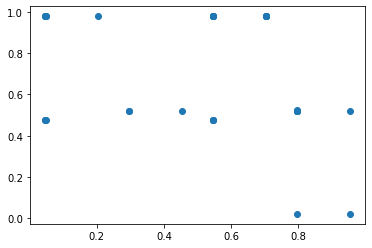

In [102]:
from matplotlib import pyplot as plt
plt.scatter(para_0,para_1)
plt.savefig("/home/jyb/lyt/refer_0")

In [45]:
loss_fun(0.1,0.1)

-0.933761

In [ ]:
from bayes_opt import BayesianOptimization

# Bounded region of parameter space
pbounds = {'x': (0, 1), 'y': (0, 1)}

optimizer_1 = BayesianOptimization(
    f=loss_fun,
    pbounds=pbounds,
    random_state=1,
)

t_1 = time()
optimizer_1.maximize(
    init_points=50,
    n_iter=500,
)
t_2 = time()
print(t_1-t_2)

|   iter    |  target   |     x     |     y     |
-------------------------------------------------
|  1        | -0.8786   |  0.417    |  0.7203   |
|  2        | -0.8867   |  0.000114 |  0.3023   |
|  3        | -0.9281   |  0.1468   |  0.09234  |
|  4        | -1.322    |  0.1863   |  0.3456   |
|  5        | -0.9155   |  0.3968   |  0.5388   |
|  6        | -1.085    |  0.4192   |  0.6852   |
|  7        | -1.134    |  0.2045   |  0.8781   |
|  8        | -0.8218   |  0.02739  |  0.6705   |
|  9        | -0.8519   |  0.4173   |  0.5587   |
|  10       | -0.8699   |  0.1404   |  0.1981   |
|  11       | -0.8223   |  0.8007   |  0.9683   |
|  12       | -1.186    |  0.3134   |  0.6923   |
|  13       | -1.013    |  0.8764   |  0.8946   |
|  14       | -0.8571   |  0.08504  |  0.03905  |
|  15       | -1.223    |  0.1698   |  0.8781   |
|  16       | -1.1      |  0.09835  |  0.4211   |
|  17       | -0.6973   |  0.9579   |  0.5332   |
|  18       | -1.271    |  0.6919   |  0.3155   |


|  100      | -0.8586   |  0.9357   |  0.4536   |
|  101      | -1.246    |  0.5622   |  0.3279   |
|  102      | -0.9151   |  0.7765   |  0.1962   |
|  103      | -0.883    |  0.9984   |  0.3506   |
|  104      | -0.877    |  0.5027   |  0.1452   |
|  105      | -0.8601   |  0.8648   |  0.7735   |
|  106      | -0.8249   |  0.2888   |  0.9501   |
|  107      | -0.9222   |  0.7556   |  0.4908   |
|  108      | -0.8763   |  0.2363   |  0.2022   |
|  109      | -0.9296   |  0.09864  |  0.2903   |
|  110      | -0.9915   |  0.5034   |  0.0      |
|  111      | -0.8617   |  0.4117   |  0.04883  |
|  112      | -0.8483   |  0.5448   |  0.07892  |
|  113      | -0.8358   |  0.8111   |  0.07479  |
|  114      | -0.8669   |  0.6323   |  0.0      |
|  115      | -0.8526   |  0.911    |  0.997    |
|  116      | -0.8681   |  0.1307   |  0.000804 |
|  117      | -0.7581   |  0.752    |  0.03164  |
|  118      | -0.9627   |  1.0      |  0.5087   |
|  119      | -0.8738   |  0.9986   |  0.6188   |


|  200      | -0.8533   |  0.4061   |  0.9997   |
|  201      | -0.7025   |  0.0      |  0.9457   |
|  202      | -0.7047   |  0.7686   |  0.07002  |
|  203      | -0.8843   |  0.3428   |  0.7206   |
|  204      | -0.8545   |  0.3576   |  0.7649   |
|  205      | -0.856    |  0.1662   |  0.0353   |
|  206      | -1.246    |  0.04813  |  0.3311   |
|  207      | -0.8533   |  0.1506   |  0.2573   |
|  208      | -0.8467   |  0.09009  |  0.2225   |
|  209      | -0.7046   |  0.9793   |  0.5689   |
|  210      | -0.8204   |  0.1784   |  0.9972   |
|  211      | -0.7972   |  0.0639   |  0.9992   |
|  212      | -0.9388   |  0.606    |  0.6553   |
|  213      | -0.8322   |  0.7114   |  0.6595   |
|  214      | -0.7869   |  0.5113   |  0.5874   |
|  215      | -0.8511   |  0.8452   |  0.279    |
|  216      | -0.7434   |  0.9493   |  0.0022   |
|  217      | -0.9983   |  0.9716   |  0.173    |
|  218      | -0.855    |  0.2013   |  0.1322   |
|  219      | -0.854    |  0.5943   |  0.5075   |


|  300      | -0.8512   |  0.4201   |  0.4765   |
|  301      | -0.695    |  0.01623  |  0.9399   |
|  302      | -0.7165   |  0.55     |  0.4642   |
|  303      | -0.992    |  0.1225   |  0.149    |
|  304      | -0.6965   |  0.9734   |  0.05428  |
|  305      | -0.7007   |  0.5164   |  0.9326   |
|  306      | -0.6986   |  0.4714   |  0.05728  |
|  307      | -0.6985   |  0.2836   |  0.5522   |
|  308      | -0.7582   |  0.752    |  0.03163  |
|  309      | -0.7417   |  0.9438   |  0.02419  |
|  310      | -0.7014   |  0.7722   |  0.5407   |
|  311      | -0.8731   |  0.1542   |  0.4663   |
|  312      | -0.7296   |  0.05024  |  0.4898   |
|  313      | -0.8221   |  0.72     |  0.1684   |
|  314      | -0.6959   |  0.7756   |  0.05242  |
|  315      | -0.9034   |  0.7597   |  0.7882   |
|  316      | -0.703    |  0.02498  |  0.4654   |
|  317      | -0.6986   |  0.5292   |  0.4433   |
|  318      | -0.6995   |  0.4659   |  0.5531   |
|  319      | -0.8171   |  0.2311   |  0.09327  |


|  400      | -0.6943   |  0.9896   |  0.5566   |
|  401      | -0.862    |  0.1945   |  0.1762   |
|  402      | -0.6952   |  0.5094   |  0.4461   |
|  403      | -0.7498   |  0.222    |  0.01979  |
|  404      | -0.7785   |  0.8142   |  0.5221   |
|  405      | -0.7031   |  0.249    |  0.05349  |
|  406      | -0.7287   |  0.2067   |  0.9349   |
|  407      | -0.6942   |  0.01404  |  0.4407   |
|  408      | -0.722    |  0.5186   |  0.9676   |
|  409      | -0.7041   |  0.009859 |  0.4545   |
|  410      | -0.9444   |  0.8748   |  0.7252   |
|  411      | -0.767    |  0.8058   |  1.0      |
|  412      | -0.7048   |  0.7068   |  0.4854   |
|  413      | -0.8568   |  0.1104   |  0.745    |
|  414      | -0.8426   |  0.5365   |  0.1466   |
|  415      | -0.7138   |  0.4551   |  0.5498   |
|  416      | -0.6975   |  0.4887   |  0.5634   |
|  417      | -0.722    |  0.2639   |  0.4448   |
|  418      | -0.7111   |  1.0      |  0.04428  |
|  419      | -0.7097   |  0.4808   |  0.5731   |


In [61]:
optimizer_1.max

{'target': -0.692054,
 'params': {'x': 0.46274655645545115, 'y': 0.5281005733655936}}

In [82]:
low_limit = -0.6935
para_0 = []
para_1 = []
for i in optimizer_1.res:
    los = i['target']
    if los > low_limit:
        #print("this is coordinate {0} {0} {1}; loss: {2} \n".format(i['params']['x'],i['params']['y'],los))
        para_0.append(i['params']['x'])
        para_1.append(i['params']['y'])

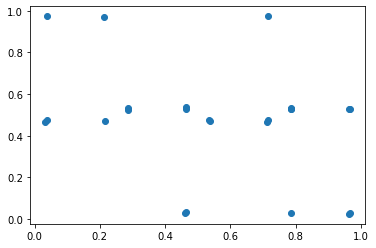

In [87]:
from matplotlib import pyplot as plt
plt.scatter(para_0,para_1)
plt.savefig("/home/jyb/lyt/filt_0")

In [ ]:
from bayes_opt import BayesianOptimization

# Bounded region of parameter space
pbounds = {'x': (0, 1), 'y': (0, 1)}

optimizer_2 = BayesianOptimization(
    f=loss_fun,
    pbounds=pbounds,
    random_state=1,
)

t_1 = time()
optimizer_2.maximize(
    init_points=100,
    n_iter=1500,
)
t_2 = time()
print(t_1-t_2)

|   iter    |  target   |     x     |     y     |
-------------------------------------------------
|  1        | -0.8786   |  0.417    |  0.7203   |
|  2        | -0.8867   |  0.000114 |  0.3023   |
|  3        | -0.9281   |  0.1468   |  0.09234  |
|  4        | -1.322    |  0.1863   |  0.3456   |
|  5        | -0.9155   |  0.3968   |  0.5388   |
|  6        | -1.085    |  0.4192   |  0.6852   |
|  7        | -1.134    |  0.2045   |  0.8781   |
|  8        | -0.8218   |  0.02739  |  0.6705   |
|  9        | -0.8519   |  0.4173   |  0.5587   |
|  10       | -0.8699   |  0.1404   |  0.1981   |
|  11       | -0.8223   |  0.8007   |  0.9683   |
|  12       | -1.186    |  0.3134   |  0.6923   |
|  13       | -1.013    |  0.8764   |  0.8946   |
|  14       | -0.8571   |  0.08504  |  0.03905  |
|  15       | -1.223    |  0.1698   |  0.8781   |
|  16       | -1.1      |  0.09835  |  0.4211   |
|  17       | -0.6973   |  0.9579   |  0.5332   |
|  18       | -1.271    |  0.6919   |  0.3155   |


|  102      | -0.9186   |  0.9911   |  0.9993   |
|  103      | -0.7407   |  0.7533   |  0.9244   |
|  104      | -0.8587   |  0.3591   |  0.0      |
|  105      | -0.8563   |  0.8544   |  0.000604 |
|  106      | -1.006    |  0.0      |  1.0      |
|  107      | -0.9232   |  0.9983   |  0.2132   |
|  108      | -0.7139   |  1.0      |  0.4339   |
|  109      | -0.9111   |  0.5532   |  0.702    |
|  110      | -1.08     |  0.1484   |  0.4067   |
|  111      | -0.7245   |  0.7083   |  0.002789 |
|  112      | -0.915    |  0.4103   |  0.3698   |
|  113      | -0.9499   |  0.5069   |  1.0      |
|  114      | -0.927    |  0.4043   |  0.8553   |
|  115      | -0.8834   |  0.2611   |  0.001042 |
|  116      | -0.8777   |  0.5095   |  0.4895   |
|  117      | -0.8565   |  0.7587   |  0.4867   |
|  118      | -0.8676   |  0.999    |  0.3174   |
|  119      | -1.105    |  0.2195   |  0.8328   |
|  120      | -0.7078   |  1.0      |  0.5462   |
|  121      | -0.8958   |  0.4848   |  0.2904   |


|  202      | -0.9912   |  0.9624   |  0.2824   |
|  203      | -1.105    |  0.9718   |  0.1601   |
|  204      | -0.694    |  0.9888   |  0.05678  |
|  205      | -0.9399   |  0.6139   |  0.469    |
|  206      | -0.8984   |  0.08523  |  0.6172   |
|  207      | -0.7652   |  0.298    |  0.4874   |
|  208      | -0.8571   |  0.07387  |  0.199    |
|  209      | -0.6984   |  0.02683  |  0.9629   |
|  210      | -0.8761   |  0.3632   |  0.01289  |
|  211      | -0.8776   |  0.2437   |  0.6281   |
|  212      | -0.9024   |  0.39     |  0.9253   |
|  213      | -0.6974   |  0.712    |  0.958    |
|  214      | -0.6959   |  0.7839   |  0.5458   |
|  215      | -0.8891   |  0.000252 |  0.1246   |
|  216      | -0.8989   |  0.2672   |  0.2903   |
|  217      | -0.693    |  0.2839   |  0.5338   |
|  218      | -0.8664   |  0.1211   |  0.5349   |
|  219      | -0.8425   |  0.1603   |  0.7375   |
|  220      | -0.8543   |  0.9622   |  0.8968   |
|  221      | -0.7051   |  0.7718   |  0.03781  |


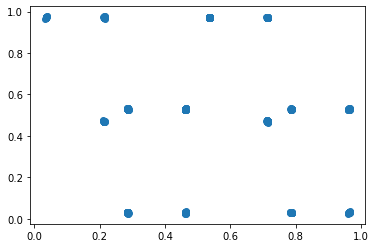

In [92]:
low_limit = -0.6935
para_0 = []
para_1 = []
for i in optimizer_2.res:
    los = i['target']
    if los > low_limit:
        #print("this is coordinate {0} {0} {1}; loss: {2} \n".format(i['params']['x'],i['params']['y'],los))
        para_0.append(i['params']['x'])
        para_1.append(i['params']['y'])
plt.scatter(para_0,para_1)     
plt.savefig("/home/jyb/lyt/filt_0")

Zr12 structure search

In [147]:
from bayes_opt import BayesianOptimization
from time import time
import os
def loss_fun_total(x_1,x_2,x_3,x_4,x_5,x_6):
    cmd = "decr_bias {0} {1} {2} {3} {4} {5} < 0@i2.cr".format(x_1,x_2,x_3,x_4,x_5,x_6)
    p = os.popen(cmd)
    ret = -float(p.read())
    return ret

In [ ]:
# Bounded region of parameter space
pbounds = {'x_1': (0, 1), 'x_2': (0, 1), 'x_3': (0, 1), 'x_4': (0, 1), 'x_5': (0, 1), 'x_6': (0, 1)}

optimizer_0 = BayesianOptimization(
    f=loss_fun_total,
    pbounds=pbounds,
    random_state=1,
)

t_1 = time()
optimizer_0.maximize(
    init_points=1000,
    n_iter=500,
)
t_2 = time()
print(t_1-t_2)

|   iter    |  target   |    x_1    |    x_2    |    x_3    |    x_4    |    x_5    |    x_6    |
-------------------------------------------------------------------------------------------------
|  1        | -0.8451   |  0.417    |  0.7203   |  0.000114 |  0.3023   |  0.1468   |  0.09234  |
|  2        | -0.7802   |  0.1863   |  0.3456   |  0.3968   |  0.5388   |  0.4192   |  0.6852   |
|  3        | -0.7307   |  0.2045   |  0.8781   |  0.02739  |  0.6705   |  0.4173   |  0.5587   |
|  4        | -0.7765   |  0.1404   |  0.1981   |  0.8007   |  0.9683   |  0.3134   |  0.6923   |
|  5        | -0.9874   |  0.8764   |  0.8946   |  0.08504  |  0.03905  |  0.1698   |  0.8781   |
|  6        | -0.7241   |  0.09835  |  0.4211   |  0.9579   |  0.5332   |  0.6919   |  0.3155   |
|  7        | -1.198    |  0.6865   |  0.8346   |  0.01829  |  0.7501   |  0.9889   |  0.7482   |
|  8        | -0.878    |  0.2804   |  0.7893   |  0.1032   |  0.4479   |  0.9086   |  0.2936   |
|  9        | -1.25 

|  51       | -1.169    |  0.8119   |  0.875    |  0.6884   |  0.5695   |  0.161    |  0.4669   |
|  52       | -1.063    |  0.3452   |  0.225    |  0.5925   |  0.3123   |  0.9163   |  0.9096   |
|  53       | -0.7363   |  0.2571   |  0.1109   |  0.193    |  0.4996   |  0.7286   |  0.2082   |
|  54       | -1.094    |  0.248    |  0.8517   |  0.4158   |  0.6167   |  0.2337   |  0.102    |
|  55       | -1.096    |  0.5159   |  0.4771   |  0.1527   |  0.6218   |  0.544    |  0.6541   |
|  56       | -1.041    |  0.1445   |  0.7515   |  0.222    |  0.5194   |  0.7853   |  0.02233  |
|  57       | -0.9163   |  0.3244   |  0.8729   |  0.8447   |  0.5384   |  0.8666   |  0.9498   |
|  58       | -0.9868   |  0.8264   |  0.8541   |  0.09874  |  0.6513   |  0.7035   |  0.6102   |
|  59       | -0.6752   |  0.7996   |  0.03457  |  0.7702   |  0.7317   |  0.2597   |  0.2571   |
|  60       | -0.7923   |  0.6323   |  0.3453   |  0.7966   |  0.4461   |  0.7827   |  0.9905   |
|  61       | -1.123

|  104      | -1.051    |  0.4312   |  0.4042   |  0.1468   |  0.7293   |  0.1887   |  0.6439   |
|  105      | -0.9484   |  0.7543   |  0.2107   |  0.601    |  0.7489   |  0.6382   |  0.5971   |
|  106      | -0.7282   |  0.2955   |  0.7316   |  0.9453   |  0.4256   |  0.7822   |  0.05614  |
|  107      | -0.8654   |  0.8353   |  0.1923   |  0.3951   |  0.3001   |  0.0801   |  0.9046   |
|  108      | -0.7974   |  0.3702   |  0.5307   |  0.4941   |  0.1322   |  0.2065   |  0.07619  |
|  109      | -0.9401   |  0.5079   |  0.2615   |  0.3571   |  0.1081   |  0.7876   |  0.1066   |
|  110      | -1.006    |  0.9857   |  0.1772   |  0.5724   |  0.04485  |  0.7871   |  0.1896   |
|  111      | -0.354    |  0.5279   |  0.7401   |  0.1499   |  0.5511   |  0.2166   |  0.7592   |
|  112      | -0.7869   |  0.7229   |  0.1765   |  0.862    |  0.01978  |  0.8602   |  0.5589   |
|  113      | -1.065    |  0.4032   |  0.7587   |  0.7169   |  0.9873   |  0.2781   |  0.003794 |
|  114      | -0.760

|  161      | -1.003    |  0.9935   |  0.8345   |  0.6996   |  0.9183   |  0.03973  |  0.07033  |
|  162      | -1.12     |  0.474    |  0.3492   |  0.9373   |  0.4896   |  0.5396   |  0.8953   |
|  163      | -1.554    |  0.4466   |  0.877    |  0.2536   |  0.2738   |  0.3284   |  0.5476   |
|  164      | -0.5584   |  0.2201   |  0.6714   |  0.1428   |  0.0941   |  0.8702   |  0.2369   |
|  165      | -0.8      |  0.386    |  0.5715   |  0.5258   |  0.07602  |  0.8741   |  0.9511   |
|  166      | -0.744    |  0.8125   |  0.2838   |  0.5278   |  0.3394   |  0.5547   |  0.9744   |
|  167      | -0.6771   |  0.3117   |  0.6688   |  0.326    |  0.7745   |  0.3258   |  0.8898   |
|  168      | -0.868    |  0.7517   |  0.7626   |  0.4695   |  0.2108   |  0.04148  |  0.3218   |
|  169      | -0.9407   |  0.03711  |  0.6939   |  0.6704   |  0.4305   |  0.7678   |  0.536    |
|  170      | -0.8792   |  0.03986  |  0.1348   |  0.1934   |  0.3357   |  0.05231  |  0.6051   |
|  171      | -0.744

|  216      | -0.8363   |  0.9826   |  0.9137   |  0.3474   |  0.7802   |  0.5465   |  0.8164   |
|  217      | -0.7815   |  0.4837   |  0.59     |  0.7873   |  0.1002   |  0.537    |  0.366    |
|  218      | -1.12     |  0.6043   |  0.9588   |  0.3928   |  0.393    |  0.7906   |  0.6451   |
|  219      | -0.936    |  0.3939   |  0.689    |  0.404    |  0.1361   |  0.4506   |  0.3344   |
|  220      | -1.242    |  0.218    |  0.9258   |  0.6896   |  0.5988   |  0.7467   |  0.542    |
|  221      | -1.051    |  0.7005   |  0.9306   |  0.8626   |  0.1674   |  0.2631   |  0.07161  |
|  222      | -0.9986   |  0.9787   |  0.2364   |  0.6606   |  0.08963  |  0.2108   |  0.5028   |
|  223      | -0.8036   |  0.105    |  0.3889   |  0.538    |  0.3392   |  0.5559   |  0.5368   |
|  224      | -0.6084   |  0.3906   |  0.6963   |  0.6785   |  0.6873   |  0.5615   |  0.3581   |
|  225      | -1.07     |  0.6131   |  0.9357   |  0.5969   |  0.9796   |  0.441    |  0.7396   |
|  226      | -0.715

|  284      | -1.352    |  0.4586   |  0.9306   |  0.2579   |  0.9344   |  0.6191   |  0.9854   |
|  285      | -0.3674   |  0.03264  |  0.7252   |  0.5656   |  0.4924   |  0.2592   |  0.3268   |
|  286      | -0.7799   |  0.2495   |  0.2193   |  0.7997   |  0.5024   |  0.08319  |  0.777    |
|  287      | -0.7622   |  0.5336   |  0.7394   |  0.5154   |  0.3999   |  0.9862   |  0.02824  |
|  288      | -0.5248   |  0.9328   |  0.9309   |  0.3909   |  0.2145   |  0.6192   |  0.178    |
|  289      | -0.9799   |  0.8032   |  0.2539   |  0.2908   |  0.9159   |  0.9029   |  0.5354   |
|  290      | -0.8043   |  0.8628   |  0.3525   |  0.9979   |  0.4337   |  0.2948   |  0.04157  |
|  291      | -1.317    |  0.9897   |  0.4649   |  0.7346   |  0.6408   |  0.7231   |  0.05111  |
|  292      | -0.7933   |  0.92     |  0.9268   |  0.552    |  0.9639   |  0.281    |  0.6021   |
|  293      | -0.6638   |  0.3965   |  0.628    |  0.3006   |  0.8194   |  0.06979  |  0.04188  |
|  294      | -1.011

|  349      | -1.15     |  0.5262   |  0.5006   |  0.2537   |  0.1862   |  0.4718   |  0.9818   |
|  350      | -0.5592   |  0.1329   |  0.2835   |  0.8006   |  0.6648   |  0.2788   |  0.3146   |
|  351      | -0.7394   |  0.4199   |  0.6028   |  0.7193   |  0.8573   |  0.6811   |  0.237    |
|  352      | -0.7694   |  0.9257   |  0.7812   |  0.3074   |  0.305    |  0.8812   |  0.1261   |
|  353      | -0.4791   |  0.6335   |  0.2777   |  0.8272   |  0.3645   |  0.7334   |  0.1924   |
|  354      | -0.9401   |  0.4814   |  0.8036   |  0.397    |  0.1616   |  0.649    |  0.7533   |
|  355      | -0.9574   |  0.2802   |  0.4514   |  0.9004   |  0.872    |  0.7072   |  0.5909   |
|  356      | -1.179    |  0.8174   |  0.9076   |  0.002508 |  0.3972   |  0.5614   |  0.7339   |
|  357      | -0.7171   |  0.08747  |  0.3998   |  0.2796   |  0.4235   |  0.498    |  0.66     |
|  358      | -1.09     |  0.4962   |  0.6205   |  0.5824   |  0.4283   |  0.004976 |  0.1945   |
|  359      | -1.433

|  402      | -0.587    |  0.963    |  0.9383   |  0.26     |  0.2014   |  0.5889   |  0.8425   |
|  403      | -0.5419   |  0.3367   |  0.5864   |  0.1622   |  0.1946   |  0.7613   |  0.1501   |
|  404      | -1.575    |  0.2659   |  0.6895   |  0.01509  |  0.03219  |  0.2875   |  0.3366   |
|  405      | -0.7636   |  0.3622   |  0.8072   |  0.03598  |  0.3584   |  0.6383   |  0.143    |
|  406      | -0.986    |  0.8577   |  0.6456   |  0.1153   |  0.2081   |  0.7455   |  0.4034   |
|  407      | -1.02     |  0.4845   |  0.8875   |  0.1374   |  0.9644   |  0.04263  |  0.09944  |
|  408      | -0.9716   |  0.2232   |  0.8066   |  0.4559   |  0.6533   |  0.1743   |  0.1667   |
|  409      | -1.032    |  0.5208   |  0.7403   |  0.4625   |  0.8696   |  0.6604   |  0.2491   |
|  410      | -0.7729   |  0.2349   |  0.374    |  0.7566   |  0.9379   |  0.8619   |  0.2616   |
|  411      | -1.175    |  0.4123   |  0.6115   |  0.5468   |  0.3893   |  0.1014   |  0.7122   |
|  412      | -0.621

|  454      | -0.6331   |  0.5454   |  0.6825   |  0.2204   |  0.4853   |  0.993    |  0.3242   |
|  455      | -0.8176   |  0.03536  |  0.8174   |  0.5033   |  0.05278  |  0.8903   |  0.4045   |
|  456      | -1.466    |  0.9293   |  0.4021   |  0.07683  |  0.2453   |  0.3503   |  0.7507   |
|  457      | -0.6746   |  0.1847   |  0.431    |  0.8732   |  0.5338   |  0.1032   |  0.02452  |
|  458      | -0.7549   |  0.7058   |  0.9791   |  0.7852   |  0.7647   |  0.6754   |  0.7955   |
|  459      | -0.5472   |  0.04002  |  0.2647   |  0.6954   |  0.867    |  0.6746   |  0.1763   |
|  460      | -0.9906   |  0.9363   |  0.9034   |  0.08668  |  0.193    |  0.2752   |  0.7384   |
|  461      | -0.9534   |  0.8594   |  0.5783   |  0.1996   |  0.4151   |  0.1379   |  0.9174   |
|  462      | -0.6692   |  0.7645   |  0.5102   |  0.4536   |  0.09784  |  0.3187   |  0.1206   |
|  463      | -0.6204   |  0.7823   |  0.5449   |  0.2273   |  0.2242   |  0.2604   |  0.3089   |
|  464      | -0.710

|  518      | -0.3983   |  0.9596   |  0.2388   |  0.1067   |  0.184    |  0.7662   |  0.7088   |
|  519      | -0.7391   |  0.4379   |  0.7938   |  0.5175   |  0.4136   |  0.1174   |  0.8839   |
|  520      | -1.295    |  0.2756   |  0.6163   |  0.9846   |  0.1894   |  0.9652   |  0.6527   |
|  521      | -0.7892   |  0.1287   |  0.7719   |  0.9518   |  0.5628   |  0.6886   |  0.02635  |
|  522      | -1.274    |  0.9891   |  0.3185   |  0.0239   |  0.8086   |  0.9733   |  0.7376   |
|  523      | -1.232    |  0.002736 |  0.06336  |  0.5843   |  0.3357   |  0.8818   |  0.8737   |
|  524      | -1.037    |  0.9875   |  0.7158   |  0.8769   |  0.3197   |  0.1112   |  0.8654   |
|  525      | -1.099    |  0.3035   |  0.4193   |  0.646    |  0.6051   |  0.4209   |  0.3862   |
|  526      | -1.658    |  0.1227   |  0.5339   |  0.2329   |  0.7548   |  0.6749   |  0.07193  |
|  527      | -0.7261   |  0.9893   |  0.7805   |  0.2278   |  0.03074  |  0.4784   |  0.3527   |
|  528      | -0.803

|  579      | -0.9864   |  0.935    |  0.0552   |  0.829    |  0.9842   |  0.2673   |  0.8901   |
|  580      | -0.8194   |  0.2903   |  0.799    |  0.4599   |  0.5976   |  0.2367   |  0.6876   |
|  581      | -0.8675   |  0.1487   |  0.5597   |  0.4943   |  0.8372   |  0.4815   |  0.7847   |
|  582      | -1.19     |  0.4003   |  0.3079   |  0.7872   |  0.4185   |  0.4968   |  0.5773   |
|  583      | -0.936    |  0.8197   |  0.5813   |  0.4061   |  0.1606   |  0.7021   |  0.8832   |
|  584      | -0.7857   |  0.1084   |  0.4662   |  0.9345   |  0.5635   |  0.5453   |  0.06348  |
|  585      | -0.9376   |  0.5353   |  0.6545   |  0.1466   |  0.9564   |  0.1962   |  0.6739   |
|  586      | -0.7454   |  0.2743   |  0.1084   |  0.2609   |  0.3342   |  0.4647   |  0.2344   |
|  587      | -0.5751   |  0.7275   |  0.8072   |  0.791    |  0.7157   |  0.2696   |  0.2105   |
|  588      | -1.103    |  0.1091   |  0.3967   |  0.08727  |  0.6554   |  0.9498   |  0.7556   |
|  589      | -0.737

|  636      | -0.7645   |  0.3634   |  0.353    |  0.8656   |  0.8887   |  0.9631   |  0.3282   |
|  637      | -0.8293   |  0.6933   |  0.6331   |  0.2424   |  0.87     |  0.2141   |  0.7477   |
|  638      | -0.7328   |  0.1447   |  0.1068   |  0.7203   |  0.5263   |  0.4429   |  0.7782   |
|  639      | -0.8033   |  0.3587   |  0.8533   |  0.9622   |  0.9791   |  0.2776   |  0.415    |
|  640      | -0.8082   |  0.725    |  0.8949   |  0.7113   |  0.7581   |  0.8834   |  0.3669   |
|  641      | -0.6895   |  0.5425   |  0.5348   |  0.6476   |  0.8952   |  0.6008   |  0.9699   |
|  642      | -0.8916   |  0.7321   |  0.4153   |  0.5811   |  0.9223   |  0.6185   |  0.7099   |
|  643      | -0.847    |  0.6613   |  0.3361   |  0.2033   |  0.4078   |  0.1508   |  0.8263   |
|  644      | -0.7346   |  0.7105   |  0.4011   |  0.1714   |  0.8758   |  0.6391   |  0.9966   |
|  645      | -1.025    |  0.1011   |  0.2448   |  0.08365  |  0.7447   |  0.1596   |  0.8817   |
|  646      | -0.623

|  696      | -0.827    |  0.6406   |  0.04762  |  0.9961   |  0.1517   |  0.4184   |  0.2953   |
|  697      | -1.108    |  0.5772   |  0.5596   |  0.3521   |  0.9736   |  0.7513   |  0.8898   |
|  698      | -0.5546   |  0.4554   |  0.5994   |  0.4135   |  0.3043   |  0.5255   |  0.191    |
|  699      | -0.8969   |  0.2141   |  0.5108   |  0.01385  |  0.4455   |  0.9967   |  0.8227   |
|  700      | -0.7672   |  0.08346  |  0.6559   |  0.2254   |  0.118    |  0.3487   |  0.6772   |
|  701      | -0.9659   |  0.5508   |  0.04396  |  0.8568   |  0.4776   |  0.8568   |  0.1877   |
|  702      | -1.053    |  0.08373  |  0.516    |  0.4545   |  0.01389  |  0.03935  |  0.09363  |
|  703      | -1.02     |  0.04068  |  0.1757   |  0.5755   |  0.4768   |  0.9798   |  0.07074  |
|  704      | -1.127    |  0.8674   |  0.5785   |  0.8765   |  0.05571  |  0.09915  |  0.8631   |
|  705      | -0.7931   |  0.5704   |  0.5585   |  0.01301  |  0.6423   |  0.8477   |  0.9961   |
|  706      | -0.782

|  758      | -0.7231   |  0.2655   |  0.7629   |  0.6982   |  0.5589   |  0.2552   |  0.5179   |
|  759      | -0.7605   |  0.9298   |  0.1853   |  0.7342   |  0.8722   |  0.6695   |  0.2037   |
|  760      | -0.9964   |  0.1292   |  0.515    |  0.1303   |  0.8257   |  0.5236   |  0.2914   |
|  761      | -0.7875   |  0.5681   |  0.2606   |  0.5845   |  0.2321   |  0.2191   |  0.5185   |
|  762      | -1.438    |  0.8354   |  0.6448   |  0.09419  |  0.1341   |  0.3903   |  0.3196   |
|  763      | -0.953    |  0.8912   |  0.8913   |  0.02982  |  0.2105   |  0.3884   |  0.1764   |
|  764      | -0.7512   |  0.9187   |  0.1896   |  0.734    |  0.9569   |  0.4777   |  0.8142   |
|  765      | -0.7478   |  0.4282   |  0.8134   |  0.7617   |  0.9596   |  0.3366   |  0.7666   |
|  766      | -0.9717   |  0.9216   |  0.8108   |  0.8143   |  0.9483   |  0.2907   |  0.4401   |
|  767      | -0.9388   |  0.1061   |  0.8773   |  0.3437   |  0.9052   |  0.2039   |  0.3496   |
|  768      | -0.795

|  818      | -0.7955   |  0.1455   |  0.7277   |  0.5397   |  0.9953   |  0.4956   |  0.3841   |
|  819      | -1.144    |  0.1944   |  0.5902   |  0.7666   |  0.9244   |  0.1376   |  0.00809  |
|  820      | -0.717    |  0.478    |  0.1829   |  0.6103   |  0.6203   |  0.4096   |  0.6772   |
|  821      | -0.8117   |  0.1997   |  0.8086   |  0.05034  |  0.1719   |  0.9806   |  0.9004   |
|  822      | -0.7141   |  0.9397   |  0.9084   |  0.4414   |  0.9388   |  0.2374   |  0.04951  |
|  823      | -0.7519   |  0.5573   |  0.3133   |  0.5321   |  0.4716   |  0.4831   |  0.5701   |
|  824      | -1.068    |  0.9234   |  0.2362   |  0.8761   |  0.7338   |  0.07921  |  0.8354   |
|  825      | -1.089    |  0.3976   |  0.3357   |  0.000393 |  0.2458   |  0.6879   |  0.8512   |
|  826      | -0.5625   |  0.241    |  0.3709   |  0.1504   |  0.8035   |  0.717    |  0.7005   |
|  827      | -1.065    |  0.6789   |  0.892    |  0.883    |  0.6254   |  0.2888   |  0.4031   |
|  828      | -1.073

|  883      | -0.6759   |  0.6385   |  0.6846   |  0.79     |  0.5423   |  0.6754   |  0.6868   |
|  884      | -1.072    |  0.3382   |  0.6505   |  0.4041   |  0.6402   |  0.9346   |  0.43     |
|  885      | -0.7554   |  0.5062   |  0.3321   |  0.5787   |  0.8634   |  0.2836   |  0.8344   |
|  886      | -0.6084   |  0.5195   |  0.2261   |  0.4194   |  0.167    |  0.9124   |  0.05795  |
|  887      | -0.6595   |  0.604    |  0.104    |  0.3135   |  0.1429   |  0.4995   |  0.6361   |
|  888      | -0.3805   |  0.8293   |  0.45     |  0.7694   |  0.5953   |  0.9723   |  0.1197   |
|  889      | -1.296    |  0.8163   |  0.8352   |  0.7916   |  0.4548   |  0.5272   |  0.9854   |
|  890      | -1.187    |  0.9446   |  0.763    |  0.4603   |  0.5402   |  0.8046   |  0.2769   |
|  891      | -0.9571   |  0.2565   |  0.2139   |  0.5512   |  0.9514   |  0.2377   |  0.8016   |
|  892      | -1.292    |  0.03041  |  0.5062   |  0.284    |  0.2827   |  0.392    |  0.5355   |
|  893      | -1.084

|  948      | -1.093    |  0.04626  |  0.7664   |  0.8068   |  0.01605  |  0.3913   |  0.8656   |
|  949      | -0.5445   |  0.9585   |  0.9196   |  0.547    |  0.3099   |  0.5893   |  0.596    |
|  950      | -1.359    |  0.6646   |  0.5908   |  0.8681   |  0.374    |  0.244    |  0.02049  |
|  951      | -0.793    |  0.2327   |  0.1616   |  0.2382   |  0.881    |  0.7316   |  0.2434   |
|  952      | -0.641    |  0.7931   |  0.5441   |  0.4065   |  0.2058   |  0.3107   |  0.07925  |
|  953      | -0.9901   |  0.2336   |  0.6658   |  0.351    |  0.8197   |  0.6612   |  0.6244   |
|  954      | -0.9743   |  0.4203   |  0.645    |  0.8748   |  0.3113   |  0.3428   |  0.8487   |
|  955      | -0.5871   |  0.5299   |  0.9237   |  0.1876   |  0.2149   |  0.8625   |  0.09949  |
|  956      | -1.689    |  0.4717   |  0.8394   |  0.6937   |  0.4622   |  0.1652   |  0.5508   |
|  957      | -1.016    |  0.988    |  0.8052   |  0.05493  |  0.7109   |  0.9766   |  0.1934   |
|  958      | -1.214

|  1001     | -0.9863   |  0.0      |  1.0      |  0.0      |  1.0      |  1.0      |  0.0      |
|  1002     | -0.6698   |  0.5977   |  0.3184   |  0.6631   |  0.4484   |  0.1722   |  0.3029   |
|  1003     | -0.9863   |  0.0      |  1.0      |  1.0      |  0.0      |  1.0      |  0.0      |
|  1004     | -1.085    |  0.4095   |  0.1223   |  0.73     |  0.8681   |  0.6629   |  0.395    |
|  1005     | -0.8263   |  0.4071   |  0.0      |  0.0      |  1.0      |  0.0      |  0.0      |
|  1006     | -1.259    |  0.694    |  0.5736   |  0.3291   |  0.7098   |  0.7974   |  0.03037  |
|  1007     | -0.903    |  1.0      |  1.0      |  0.3959   |  0.3211   |  1.0      |  1.0      |
|  1008     | -0.4884   |  0.545    |  0.2618   |  0.1546   |  0.9871   |  0.1507   |  0.7717   |
|  1009     | -0.9004   |  1.0      |  1.0      |  1.0      |  1.0      |  1.0      |  0.8399   |
|  1010     | -0.9863   |  1.0      |  0.0      |  0.0      |  0.0      |  0.0      |  1.0      |
|  1011     | -1.138

In [158]:
optimizer_0.max

{'target': -0.218052,
 'params': {'x_1': 0.2140097727076603,
  'x_2': 0.6045716033063737,
  'x_3': 0.20167873480298304,
  'x_4': 0.8177571936931245,
  'x_5': 0.3161071322581981,
  'x_6': 0.6696167646858762}}

In [156]:
low_limit = -0.2
para_0 = []
para_1 = []
for i in optimizer_0.res:
    los = i['target']
    if los > low_limit:
        #print("this is coordinate {0} {0} {1}; loss: {2} \n".format(i['params']['x'],i['params']['y'],los))
        para_0.append(i['params']['x'])
        para_1.append(i['params']['y'])

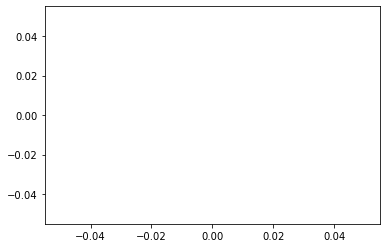

In [151]:
from matplotlib import pyplot as plt
plt.scatter(para_0,para_1)
plt.savefig("/home/jyb/lyt/refer_0")

In [ ]:
optimizer_0.maximize(
    init_points=500,
    n_iter=1000,
)

|   iter    |  target   |    x_1    |    x_2    |    x_3    |    x_4    |    x_5    |    x_6    |
-------------------------------------------------------------------------------------------------
|  1501     | -0.6752   |  0.6576   |  0.9092   |  0.902    |  0.3909   |  0.6125   |  0.5218   |
|  1502     | -1.042    |  0.817    |  0.05618  |  0.627    |  0.4297   |  0.8609   |  0.6879   |
|  1503     | -0.7824   |  0.261    |  0.1342   |  0.5413   |  0.9819   |  0.3499   |  0.9954   |
|  1504     | -0.7628   |  0.5181   |  0.1903   |  0.03062  |  0.303    |  0.03508  |  0.5901   |
|  1505     | -1.343    |  0.7016   |  0.67     |  0.3562   |  0.1116   |  0.6413   |  0.0632   |
|  1506     | -1.712    |  0.6444   |  0.8353   |  0.05716  |  0.3559   |  0.6187   |  0.6386   |
|  1507     | -1.415    |  0.1979   |  0.6234   |  0.5575   |  0.8857   |  0.697    |  0.3643   |
|  1508     | -0.5943   |  0.2253   |  0.6109   |  0.2556   |  0.07581  |  0.8227   |  0.228    |
|  1509     | -0.962

|  1565     | -0.771    |  0.4504   |  0.2406   |  0.5654   |  0.654    |  0.9117   |  0.7826   |
|  1566     | -0.8374   |  0.9768   |  0.4427   |  0.141    |  0.41     |  0.7923   |  0.211    |
|  1567     | -0.8355   |  0.1774   |  0.6451   |  0.947    |  0.4093   |  0.6969   |  0.404    |
|  1568     | -1.254    |  0.3498   |  0.133    |  0.01991  |  0.1197   |  0.4442   |  0.7298   |
|  1569     | -1.18     |  0.05369  |  0.2217   |  0.03106  |  0.8333   |  0.3819   |  0.2846   |
|  1570     | -0.7957   |  0.7837   |  0.2789   |  0.2808   |  0.935    |  0.1642   |  0.03791  |
|  1571     | -0.6461   |  0.956    |  0.3061   |  0.4141   |  0.7968   |  0.3562   |  0.1049   |
|  1572     | -0.769    |  0.7889   |  0.1296   |  0.198    |  0.1397   |  0.2217   |  0.2353   |
|  1573     | -1.12     |  0.7264   |  0.09524  |  0.6682   |  0.9109   |  0.63     |  0.3369   |
|  1574     | -0.7764   |  0.8395   |  0.8986   |  0.4935   |  0.5635   |  0.5807   |  0.1328   |
|  1575     | -1.178

|  1619     | -1.101    |  0.3435   |  0.729    |  0.4183   |  0.09576  |  0.3153   |  0.313    |
|  1620     | -1.361    |  0.6546   |  0.9269   |  0.7037   |  0.323    |  0.6831   |  0.0841   |
|  1621     | -0.7164   |  0.3755   |  0.1901   |  0.693    |  0.6621   |  0.3531   |  0.1806   |
|  1622     | -0.8257   |  0.1567   |  0.237    |  0.3285   |  0.8696   |  0.1219   |  0.1681   |
|  1623     | -1.326    |  0.3705   |  0.6043   |  0.05581  |  0.2452   |  0.834    |  0.6629   |
|  1624     | -0.5934   |  0.3514   |  0.1142   |  0.3249   |  0.2445   |  0.7106   |  0.3005   |
|  1625     | -0.8408   |  0.6772   |  0.4127   |  0.3499   |  0.7858   |  0.1854   |  0.4568   |
|  1626     | -0.6523   |  0.5835   |  0.3212   |  0.7062   |  0.9178   |  0.07307  |  0.1814   |
|  1627     | -0.9905   |  0.5091   |  0.7999   |  0.631    |  0.01969  |  0.33     |  0.6538   |
|  1628     | -0.9929   |  0.6871   |  0.4822   |  0.05373  |  0.6278   |  0.504    |  0.7254   |
|  1629     | -0.668

|  1674     | -0.7183   |  0.794    |  0.03395  |  0.07727  |  0.3959   |  0.1858   |  0.9442   |
|  1675     | -0.6016   |  0.7797   |  0.7437   |  0.492    |  0.49     |  0.5811   |  0.5966   |
|  1676     | -0.9821   |  0.898    |  0.1208   |  0.5096   |  0.9955   |  0.4814   |  0.8378   |
|  1677     | -0.6637   |  0.6037   |  0.6644   |  0.2725   |  0.8309   |  0.2445   |  0.6734   |
|  1678     | -1.116    |  0.08813  |  0.01885  |  0.4723   |  0.939    |  0.3256   |  0.3222   |
|  1679     | -0.8486   |  0.05203  |  0.6753   |  0.7217   |  0.9037   |  0.4371   |  0.1095   |
|  1680     | -0.9414   |  0.03761  |  0.8808   |  0.6523   |  0.9155   |  0.8806   |  0.4702   |
|  1681     | -0.7646   |  0.6703   |  0.7451   |  0.4222   |  0.1539   |  0.2841   |  0.5485   |
|  1682     | -1.035    |  0.2557   |  0.8917   |  0.5808   |  0.7187   |  0.862    |  0.8966   |
|  1683     | -0.8942   |  0.9576   |  0.6275   |  0.999    |  0.7905   |  0.2708   |  0.9906   |
|  1684     | -0.769

|  1728     | -0.8416   |  0.2494   |  0.2591   |  0.08723  |  0.09302  |  0.3144   |  0.8325   |
|  1729     | -0.8125   |  0.5124   |  0.3856   |  0.1825   |  0.976    |  0.7414   |  0.3402   |
|  1730     | -0.7705   |  0.9223   |  0.5863   |  0.2652   |  0.4816   |  0.4344   |  0.3025   |
|  1731     | -0.5757   |  0.6568   |  0.7922   |  0.3533   |  0.4379   |  0.963    |  0.2595   |
|  1732     | -1.068    |  0.7193   |  0.8511   |  0.7418   |  0.2166   |  0.4353   |  0.6088   |
|  1733     | -0.9681   |  0.5916   |  0.9519   |  0.3584   |  0.5318   |  0.3984   |  0.6147   |
|  1734     | -0.7      |  0.4648   |  0.9555   |  0.7085   |  0.4988   |  0.4929   |  0.2485   |
|  1735     | -1.259    |  0.2154   |  0.3839   |  0.2694   |  0.2983   |  0.215    |  0.4307   |
|  1736     | -0.7445   |  0.2373   |  0.429    |  0.7382   |  0.1903   |  0.9805   |  0.2509   |
|  1737     | -1.104    |  0.09193  |  0.6622   |  0.1241   |  0.4585   |  0.5549   |  0.9122   |
|  1738     | -0.819

|  1782     | -0.7861   |  0.5879   |  0.8474   |  0.4705   |  0.1744   |  0.6415   |  0.9764   |
|  1783     | -0.7803   |  0.3502   |  0.8027   |  0.6773   |  0.5205   |  0.1444   |  0.8388   |
|  1784     | -1.374    |  0.4262   |  0.7829   |  0.5916   |  0.2505   |  0.1736   |  0.738    |
|  1785     | -0.8667   |  0.1121   |  0.2176   |  0.8653   |  0.9046   |  0.09351  |  0.01456  |
|  1786     | -1.233    |  0.304    |  0.1283   |  0.257    |  0.5023   |  0.5614   |  0.9806   |
|  1787     | -0.6282   |  0.4296   |  0.6793   |  0.8894   |  0.1519   |  0.09317  |  0.2967   |
|  1788     | -1.085    |  0.1297   |  0.161    |  0.3436   |  0.3113   |  0.7624   |  0.9489   |
|  1789     | -0.8063   |  0.5807   |  0.9835   |  0.9518   |  0.2576   |  0.3014   |  0.8419   |
|  1790     | -1.022    |  0.5849   |  0.1751   |  0.05213  |  0.5451   |  0.1479   |  0.7724   |
|  1791     | -0.915    |  0.6036   |  0.2545   |  0.00971  |  0.2927   |  0.6138   |  0.1931   |
|  1792     | -0.741

|  1849     | -0.794    |  0.678    |  0.04863  |  0.458    |  0.5728   |  0.1993   |  0.1862   |
|  1850     | -0.7228   |  0.1027   |  0.0688   |  0.169    |  0.06082  |  0.5517   |  0.8079   |
|  1851     | -1.106    |  0.8043   |  0.6312   |  0.5417   |  0.4671   |  0.9601   |  0.2899   |
|  1852     | -1.294    |  0.3664   |  0.5753   |  0.5126   |  0.6742   |  0.7747   |  0.1824   |
|  1853     | -0.6909   |  0.6289   |  0.694    |  0.2723   |  0.9281   |  0.3453   |  0.6381   |
|  1854     | -0.9239   |  0.9258   |  0.9806   |  0.2487   |  0.942    |  0.9091   |  0.251    |
|  1855     | -1.067    |  0.1011   |  0.3624   |  0.9236   |  0.8453   |  0.2581   |  0.2756   |
|  1856     | -1.237    |  0.2983   |  0.08142  |  0.1683   |  0.6144   |  0.4924   |  0.4119   |
|  1857     | -0.7828   |  0.5157   |  0.8874   |  0.9551   |  0.2557   |  0.2337   |  0.07015  |
|  1858     | -0.7569   |  0.2597   |  0.1742   |  0.02756  |  0.1745   |  0.7805   |  0.9203   |
|  1859     | -1.013

|  1901     | -1.176    |  0.3418   |  0.8443   |  0.7689   |  0.5325   |  0.08955  |  0.9251   |
|  1902     | -0.9891   |  0.5579   |  0.02391  |  0.6461   |  0.2737   |  0.4537   |  0.8956   |
|  1903     | -1.145    |  0.204    |  0.1136   |  0.6182   |  0.6755   |  0.9889   |  0.3216   |
|  1904     | -0.7398   |  0.9072   |  0.5905   |  0.07684  |  0.9306   |  0.5425   |  0.4739   |
|  1905     | -0.8533   |  0.5445   |  0.5273   |  0.6615   |  0.6444   |  0.1729   |  0.5075   |
|  1906     | -0.9991   |  0.1782   |  0.4657   |  0.09561  |  0.9089   |  0.843    |  0.2047   |
|  1907     | -1.104    |  0.222    |  0.5648   |  0.04128  |  0.9792   |  0.3444   |  0.2962   |
|  1908     | -0.8626   |  0.9279   |  0.2445   |  0.4052   |  0.1838   |  0.08602  |  0.9133   |
|  1909     | -0.3441   |  0.2773   |  0.7783   |  0.1622   |  0.6658   |  0.2744   |  0.7253   |
|  1910     | -0.782    |  0.05723  |  0.6621   |  0.0561   |  0.6575   |  0.3497   |  0.7358   |
|  1911     | -0.671

|  1952     | -0.6542   |  0.01878  |  0.8707   |  0.1737   |  0.1715   |  0.3727   |  0.1825   |
|  1953     | -1.155    |  0.441    |  0.5787   |  0.8362   |  0.5883   |  0.924    |  0.4813   |
|  1954     | -0.846    |  0.6218   |  0.4417   |  0.9125   |  0.7104   |  0.6028   |  0.8434   |
|  1955     | -1.199    |  0.9065   |  0.578    |  0.2076   |  0.3331   |  0.92     |  0.4912   |
|  1956     | -1.264    |  0.8452   |  0.4916   |  0.04825  |  0.5884   |  0.9799   |  0.1515   |
|  1957     | -1.178    |  0.6269   |  0.6444   |  0.1062   |  0.299    |  0.3895   |  0.9544   |
|  1958     | -0.7619   |  0.5768   |  0.08736  |  0.1072   |  0.9537   |  0.8053   |  0.4283   |
|  1959     | -1.286    |  0.6725   |  0.2119   |  0.5202   |  0.9755   |  0.8304   |  0.216    |
|  1960     | -1.81     |  0.4484   |  0.5727   |  0.5708   |  0.9305   |  0.2551   |  0.6563   |
|  1961     | -0.7404   |  0.7812   |  0.116    |  0.5264   |  0.4123   |  0.5023   |  0.06532  |
|  1962     | -0.965

|  2008     | -1.191    |  0.9707   |  0.1711   |  0.7309   |  0.4535   |  0.2149   |  0.01269  |
|  2009     | -0.7111   |  0.0      |  0.4919   |  0.5312   |  0.0      |  0.0      |  1.0      |
|  2010     | -0.964    |  0.0      |  0.3649   |  1.0      |  0.7461   |  0.0      |  1.0      |
|  2011     | -0.8165   |  0.0      |  1.0      |  1.0      |  0.4522   |  0.0      |  0.4572   |
|  2012     | -0.779    |  1.0      |  0.5575   |  0.0      |  0.2632   |  0.0      |  1.0      |
|  2013     | -0.95     |  0.1404   |  0.7007   |  0.04502  |  0.9287   |  0.5325   |  0.8373   |
|  2014     | -0.9775   |  1.0      |  0.0      |  0.0      |  0.0      |  0.0      |  0.4889   |
|  2015     | -0.7902   |  1.0      |  0.4031   |  0.0      |  1.0      |  0.6136   |  1.0      |
|  2016     | -0.6456   |  0.1521   |  0.6152   |  0.3671   |  0.2298   |  0.3091   |  0.5407   |
|  2017     | -0.664    |  0.9727   |  0.02357  |  0.2885   |  0.6688   |  0.1118   |  0.1878   |
|  2018     | -0.769

|  2059     | -0.7607   |  0.0      |  0.541    |  0.7742   |  1.0      |  1.0      |  0.322    |
|  2060     | -0.7169   |  0.4717   |  1.0      |  1.0      |  0.0      |  0.5633   |  0.0      |
|  2061     | -0.9018   |  0.761    |  0.7068   |  0.3058   |  0.8844   |  0.3946   |  0.06002  |
|  2062     | -1.084    |  1.0      |  1.0      |  0.2641   |  0.4852   |  0.6948   |  1.0      |
|  2063     | -0.5891   |  0.2401   |  0.4572   |  0.6432   |  0.5659   |  0.6986   |  0.6844   |
|  2064     | -0.7176   |  0.04507  |  0.7949   |  0.5228   |  0.2548   |  0.53     |  0.6914   |
|  2065     | -0.8864   |  1.0      |  1.0      |  1.0      |  1.0      |  0.0      |  0.5596   |
|  2066     | -0.7153   |  0.6763   |  0.4597   |  0.01348  |  0.5988   |  0.8184   |  0.9388   |
|  2067     | -1.298    |  0.2889   |  0.6446   |  0.9019   |  1.0      |  0.475    |  0.3356   |
|  2068     | -0.792    |  0.4748   |  0.4947   |  0.6761   |  0.5094   |  0.3114   |  0.03922  |
|  2069     | -0.811

|  2110     | -0.97     |  0.0      |  0.0      |  0.4907   |  1.0      |  1.0      |  0.0      |
|  2111     | -0.8914   |  1.0      |  1.0      |  1.0      |  0.5772   |  0.5816   |  0.684    |
|  2112     | -0.9863   |  0.0      |  0.0      |  1.0      |  0.0      |  0.0      |  0.0      |
|  2113     | -1.499    |  0.5404   |  0.9864   |  0.3277   |  0.8797   |  0.2685   |  0.06159  |
|  2114     | -0.9687   |  1.0      |  1.0      |  0.0      |  0.0      |  0.6083   |  0.6294   |
|  2115     | -0.7027   |  0.4369   |  0.9782   |  0.6027   |  0.1173   |  0.2602   |  0.02884  |
|  2116     | -0.7088   |  0.4066   |  0.2897   |  0.1188   |  0.8784   |  0.7099   |  0.2363   |
|  2117     | -0.7517   |  1.0      |  0.2312   |  0.0      |  0.599    |  0.0      |  0.0      |
|  2118     | -0.7146   |  0.4349   |  0.4253   |  0.2858   |  0.08331  |  0.4277   |  0.2028   |
|  2119     | -1.011    |  0.7998   |  0.5264   |  0.8696   |  0.3608   |  0.5376   |  0.1018   |
|  2120     | -1.038

|  2161     | -1.025    |  0.6997   |  0.6856   |  1.0      |  1.0      |  1.0      |  0.6858   |
|  2162     | -0.8761   |  1.0      |  0.2091   |  0.3793   |  0.0      |  1.0      |  0.0      |
|  2163     | -0.8063   |  0.9585   |  0.7679   |  0.2346   |  0.06549  |  0.4907   |  0.3753   |
|  2164     | -0.7218   |  0.9795   |  0.574    |  0.5169   |  0.488    |  0.3549   |  0.647    |
|  2165     | -0.7042   |  0.3741   |  0.7769   |  0.1816   |  0.7985   |  0.2526   |  0.2088   |
|  2166     | -1.011    |  0.0      |  0.0      |  0.8876   |  0.6194   |  1.0      |  1.0      |
|  2167     | -0.7235   |  0.3345   |  0.3928   |  0.3512   |  0.4721   |  0.584    |  0.1599   |
|  2168     | -0.9107   |  0.6252   |  1.0      |  0.0      |  0.0      |  0.5591   |  0.0      |
|  2169     | -1.22     |  0.0      |  1.0      |  0.589    |  0.2326   |  0.393    |  0.3308   |
|  2170     | -1.038    |  1.0      |  1.0      |  0.8528   |  0.1887   |  0.7683   |  0.4257   |
|  2171     | -0.614

|  2283     | -1.143    |  0.6179   |  0.6104   |  0.1224   |  0.5876   |  0.3973   |  0.0      |
|  2284     | -0.9171   |  1.0      |  0.0      |  0.0      |  0.6038   |  1.0      |  1.0      |
|  2285     | -1.197    |  0.0      |  0.6088   |  0.3678   |  0.0      |  0.0      |  0.5628   |
|  2286     | -0.8425   |  0.05955  |  0.277    |  0.4032   |  0.771    |  0.7807   |  0.06218  |
|  2287     | -1.147    |  0.2967   |  0.3764   |  0.5068   |  0.971    |  0.2503   |  0.792    |
|  2288     | -0.7471   |  0.601    |  0.1164   |  0.5452   |  0.3555   |  0.7585   |  0.08344  |
|  2289     | -0.5909   |  0.04422  |  0.5263   |  0.5952   |  0.6571   |  0.4892   |  0.5294   |
|  2290     | -0.871    |  0.5749   |  0.06035  |  0.8183   |  0.2286   |  0.8088   |  0.3947   |
|  2291     | -0.7749   |  0.7623   |  0.5328   |  1.0      |  1.0      |  0.732    |  0.0      |
|  2292     | -0.425    |  0.7583   |  0.439    |  0.1229   |  0.3356   |  0.5351   |  0.6892   |
|  2293     | -0.771

|  2334     | -0.9811   |  0.7475   |  0.0      |  1.0      |  0.0      |  1.0      |  0.7541   |
|  2335     | -1.147    |  0.5952   |  0.9956   |  0.6748   |  0.1917   |  0.02532  |  0.8551   |
|  2336     | -0.7683   |  0.5806   |  1.0      |  1.0      |  0.6497   |  0.29     |  1.0      |
|  2337     | -0.9343   |  0.3184   |  0.5769   |  0.08388  |  0.5678   |  0.8726   |  0.6128   |
|  2338     | -1.262    |  0.3224   |  1.0      |  1.0      |  0.7995   |  1.0      |  0.7131   |
|  2339     | -0.8436   |  0.2224   |  0.1001   |  0.1312   |  0.2114   |  0.2328   |  0.4519   |
|  2340     | -0.8145   |  0.2554   |  1.0      |  1.0      |  0.0      |  0.0      |  1.0      |
|  2341     | -0.8276   |  0.05762  |  0.5319   |  0.2485   |  0.9683   |  0.3516   |  0.7448   |
|  2342     | -0.6488   |  0.68     |  0.7156   |  0.6133   |  0.1635   |  0.7826   |  0.781    |
|  2343     | -0.7246   |  0.4532   |  0.0      |  0.7552   |  0.0      |  0.8682   |  0.3452   |
|  2344     | -0.819

In [ ]:
print("over")

In [ ]:
# Bounded region of parameter space
pbounds = {'x_1': (0, 1), 'x_2': (0, 1), 'x_3': (0, 1), 'x_4': (0, 1), 'x_5': (0, 1), 'x_6': (0, 1)}

optimizer_1 = BayesianOptimization(
    f=loss_fun_total,
    pbounds=pbounds,
    random_state=1,
)

t_1 = time()
optimizer_1.maximize(
    init_points=300,
    n_iter=500,
)
t_2 = time()
print(t_1-t_2)

In [172]:
optimizer_1.max

{'target': -0.101074,
 'params': {'x_1': 0.7473208103319232,
  'x_2': 0.2896027461868774,
  'x_3': 0.773799287244182,
  'x_4': 0.4277373293360762,
  'x_5': 0.8076984091122095,
  'x_6': 0.3535348626679904}}

In [173]:
print(t_1-t_2)

-61.13420867919922


In [ ]:
t_1 = time()
optimizer_1.maximize(
    init_points=500,
    n_iter=200,
)
print(time()-t_2)

|   iter    |  target   |    x_1    |    x_2    |    x_3    |    x_4    |    x_5    |    x_6    |
-------------------------------------------------------------------------------------------------
|  1052     | -0.7774   |  0.2391   |  0.5255   |  0.1306   |  0.2895   |  0.4005   |  0.7067   |
|  1053     | -1.093    |  0.9011   |  0.4286   |  0.7138   |  0.1391   |  0.1006   |  0.4481   |
|  1054     | -1.178    |  0.7605   |  0.2316   |  0.8091   |  0.2524   |  0.0838   |  0.513    |
|  1055     | -1.298    |  0.000977 |  0.7081   |  0.7391   |  0.9733   |  0.6632   |  0.4942   |
|  1056     | -0.7712   |  0.07362  |  0.5343   |  0.1418   |  0.8024   |  0.5761   |  0.2129   |
|  1057     | -0.7603   |  0.7071   |  0.333    |  0.6691   |  0.7796   |  0.08658  |  0.5107   |
|  1058     | -0.6792   |  0.1037   |  0.6495   |  0.3155   |  0.6435   |  0.04855  |  0.867    |
|  1059     | -0.7891   |  0.4782   |  0.7936   |  0.2266   |  0.335    |  0.7638   |  0.8534   |
|  1060     | -1.21 

|  1108     | -0.8156   |  0.1486   |  0.6863   |  0.535    |  0.1912   |  0.05595  |  0.6114   |
|  1109     | -0.8415   |  0.05361  |  0.2136   |  0.5027   |  0.09403  |  0.4089   |  0.02012  |
|  1110     | -1.093    |  0.1195   |  0.9401   |  0.5589   |  0.6865   |  0.3778   |  0.7631   |
|  1111     | -0.7822   |  0.8964   |  0.9102   |  0.4965   |  0.7626   |  0.709    |  0.9513   |
|  1112     | -0.8049   |  0.2416   |  0.5613   |  0.04377  |  0.9232   |  0.9453   |  0.5009   |
|  1113     | -1.122    |  0.5861   |  0.7719   |  0.2493   |  0.379    |  0.2886   |  0.5388   |
|  1114     | -0.814    |  0.949    |  0.3854   |  0.04501  |  0.6825   |  0.495    |  0.2965   |
|  1115     | -0.8886   |  0.4159   |  0.8625   |  0.821    |  0.1708   |  0.6851   |  0.9977   |
|  1116     | -0.9267   |  0.7844   |  0.725    |  0.31     |  0.1595   |  0.8643   |  0.6103   |
|  1117     | -0.9557   |  0.3901   |  0.7556   |  0.7186   |  0.6473   |  0.2073   |  0.8855   |
|  1118     | -0.814

|  1164     | -0.8972   |  0.8724   |  0.5957   |  0.3443   |  0.8135   |  0.4324   |  0.1265   |
|  1165     | -1.031    |  0.9686   |  0.8526   |  0.5613   |  0.6706   |  0.9977   |  0.1613   |
|  1166     | -0.7972   |  0.5345   |  0.391    |  0.5411   |  0.1034   |  0.4407   |  0.4615   |
|  1167     | -0.7966   |  0.5959   |  0.6624   |  0.5901   |  0.7294   |  0.5809   |  0.4431   |
|  1168     | -1.235    |  0.4968   |  0.4301   |  0.2101   |  0.2268   |  0.4574   |  0.4336   |
|  1169     | -0.7823   |  0.7793   |  0.4209   |  0.6734   |  0.166    |  0.8241   |  0.6854   |
|  1170     | -0.7224   |  0.7891   |  0.3595   |  0.6625   |  0.2171   |  0.221    |  0.2425   |
|  1171     | -0.9884   |  0.2646   |  0.4084   |  0.8287   |  0.9474   |  0.6325   |  0.1347   |
|  1172     | -1.378    |  0.42     |  0.9362   |  0.3205   |  0.6193   |  0.9351   |  0.4607   |
|  1173     | -1.155    |  0.5004   |  0.9187   |  0.9298   |  0.9045   |  0.5136   |  0.6398   |
|  1174     | -0.853

|  1221     | -0.7887   |  0.9837   |  0.5464   |  0.5537   |  0.3488   |  0.7038   |  0.4998   |
|  1222     | -0.7986   |  0.4695   |  0.5498   |  0.02518  |  0.5313   |  0.133    |  0.4589   |
|  1223     | -0.9537   |  0.08227  |  0.889    |  0.3784   |  0.4304   |  0.7421   |  0.1558   |
|  1224     | -0.8587   |  0.575    |  0.511    |  0.3683   |  0.6833   |  0.7945   |  0.4677   |
|  1225     | -0.7938   |  0.6274   |  0.9125   |  0.457    |  0.135    |  0.5432   |  0.43     |
|  1226     | -1.517    |  0.7683   |  0.7977   |  0.1718   |  0.4379   |  0.2668   |  0.9547   |
|  1227     | -1.118    |  0.9369   |  0.4343   |  0.431    |  0.7465   |  0.596    |  0.2591   |
|  1228     | -0.8017   |  0.4832   |  0.8901   |  0.6816   |  0.5631   |  0.8768   |  0.2763   |
|  1229     | -1.029    |  0.9968   |  0.1998   |  0.8398   |  0.7423   |  0.8641   |  0.5849   |
|  1230     | -0.7222   |  0.2324   |  0.4835   |  0.8624   |  0.7978   |  0.1735   |  0.9922   |
|  1231     | -1.248

|  1277     | -0.8524   |  0.07878  |  0.2845   |  0.2029   |  0.5113   |  0.6522   |  0.6151   |
|  1278     | -0.7751   |  0.1336   |  0.1802   |  0.4973   |  0.02005  |  0.7361   |  0.5924   |
|  1279     | -1.004    |  0.1588   |  0.9173   |  0.5437   |  0.9978   |  0.04232  |  0.8129   |
|  1280     | -0.8353   |  0.07738  |  0.9402   |  0.3614   |  0.6666   |  0.7146   |  0.7131   |
|  1281     | -0.8062   |  0.694    |  0.01165  |  0.2205   |  0.7973   |  0.787    |  0.8017   |
|  1282     | -1.185    |  0.007829 |  0.04135  |  0.07383  |  0.8737   |  0.4774   |  0.7317   |
|  1283     | -0.8057   |  0.2183   |  0.6698   |  0.444    |  0.9886   |  0.2862   |  0.1085   |
|  1284     | -1.035    |  0.5469   |  0.6812   |  0.1347   |  0.5392   |  0.7444   |  0.1118   |
|  1285     | -0.8547   |  0.7857   |  0.5442   |  0.01052  |  0.5891   |  0.8047   |  0.9909   |
|  1286     | -0.8431   |  0.9913   |  0.414    |  0.03734  |  0.9704   |  0.2205   |  0.955    |
|  1287     | -1.337

|  1331     | -1.038    |  0.8591   |  0.1427   |  0.4029   |  0.09356  |  0.1179   |  0.3748   |
|  1332     | -1.023    |  0.1654   |  0.719    |  0.1259   |  0.7388   |  0.8414   |  0.08268  |
|  1333     | -0.7723   |  0.04008  |  0.4935   |  0.6008   |  0.684    |  0.4783   |  0.5432   |
|  1334     | -0.9143   |  0.5496   |  0.7138   |  0.1562   |  0.02174  |  0.5081   |  0.9537   |
|  1335     | -1.182    |  0.02515  |  0.6128   |  0.4939   |  0.9002   |  0.02361  |  0.6595   |
|  1336     | -0.747    |  0.6562   |  0.8838   |  0.5364   |  0.6906   |  0.4127   |  0.8266   |
|  1337     | -0.7458   |  0.685    |  0.108    |  0.1399   |  0.1581   |  0.1205   |  0.2303   |
|  1338     | -1.083    |  0.4234   |  0.6708   |  0.3366   |  0.5198   |  0.8211   |  0.8846   |
|  1339     | -0.9845   |  0.7045   |  0.8345   |  0.3091   |  0.7906   |  0.9167   |  0.03841  |
|  1340     | -0.6093   |  0.4456   |  0.2399   |  0.494    |  0.6175   |  0.209    |  0.8744   |
|  1341     | -0.632

|  1387     | -0.7977   |  0.6605   |  0.03588  |  0.1554   |  0.8865   |  0.7658   |  0.1804   |
|  1388     | -0.834    |  0.06516  |  0.1627   |  0.8374   |  0.9731   |  0.7551   |  0.7846   |
|  1389     | -1.161    |  0.02938  |  0.8746   |  0.6811   |  0.349    |  0.4996   |  0.9501   |
|  1390     | -1.272    |  0.05409  |  0.1917   |  0.1502   |  0.5382   |  0.2356   |  0.07673  |
|  1391     | -1.043    |  0.515    |  0.8363   |  0.6819   |  0.03672  |  0.04527  |  0.5381   |
|  1392     | -1.167    |  0.1414   |  0.7072   |  0.2474   |  0.44     |  0.6203   |  0.9727   |
|  1393     | -1.162    |  0.197    |  0.9118   |  0.3508   |  0.1619   |  0.4209   |  0.8415   |
|  1394     | -1.35     |  0.04379  |  0.137    |  0.5899   |  0.4086   |  0.4783   |  0.8221   |
|  1395     | -0.7502   |  0.1673   |  0.322    |  0.2055   |  0.09932  |  0.5244   |  0.2126   |
|  1396     | -0.7743   |  0.9044   |  0.04603  |  0.8973   |  0.5877   |  0.8616   |  0.02917  |
|  1397     | -0.643

|  1440     | -0.7985   |  0.7311   |  0.8784   |  0.3532   |  0.7025   |  0.04862  |  0.8193   |
|  1441     | -0.8321   |  0.3183   |  0.2216   |  0.361    |  0.1141   |  0.2937   |  0.008789 |
|  1442     | -0.8017   |  0.2533   |  0.8377   |  0.8078   |  0.3826   |  0.4307   |  0.1826   |
|  1443     | -0.8101   |  0.3169   |  0.4174   |  0.06647  |  0.3379   |  0.4957   |  0.006721 |
|  1444     | -1.53     |  0.4381   |  0.2187   |  0.2134   |  0.2492   |  0.1283   |  0.9448   |
|  1445     | -0.8232   |  0.1691   |  0.5676   |  0.1715   |  0.2609   |  0.6768   |  0.5033   |
|  1446     | -1.105    |  0.1573   |  0.08251  |  0.8819   |  0.2419   |  0.959    |  0.8924   |
|  1447     | -0.3545   |  0.16     |  0.5037   |  0.1189   |  0.1108   |  0.6963   |  0.2716   |
|  1448     | -0.7752   |  0.9664   |  0.8392   |  0.09252  |  0.3906   |  0.1242   |  0.5554   |
|  1449     | -1.346    |  0.1621   |  0.8318   |  0.2577   |  0.5106   |  0.7825   |  0.5383   |
|  1450     | -0.374

|  1493     | -0.7239   |  0.005696 |  0.4019   |  0.3244   |  0.2089   |  0.7647   |  0.2157   |
|  1494     | -1.05     |  0.3672   |  0.06146  |  0.7991   |  0.8578   |  0.979    |  0.9506   |
|  1495     | -0.7035   |  0.4871   |  0.2963   |  0.6942   |  0.7246   |  0.8684   |  0.2063   |
|  1496     | -1.032    |  0.399    |  0.7888   |  0.2227   |  0.4822   |  0.781    |  0.6047   |
|  1497     | -0.843    |  0.199    |  0.4923   |  0.9803   |  0.1919   |  0.2427   |  0.4155   |
|  1498     | -1.429    |  0.795    |  0.8599   |  0.7688   |  0.4227   |  0.2626   |  0.5911   |
|  1499     | -0.8096   |  0.5563   |  0.323    |  0.2448   |  0.6292   |  0.3614   |  0.4466   |
|  1500     | -0.8714   |  0.4237   |  0.605    |  0.06712  |  0.4648   |  0.9363   |  0.1481   |
|  1501     | -0.8039   |  0.8816   |  0.1986   |  0.4828   |  0.491    |  0.2348   |  0.5966   |
|  1502     | -0.8396   |  0.8371   |  0.2428   |  0.5057   |  0.4684   |  0.8049   |  0.4855   |
|  1503     | -0.65 

|  1545     | -1.202    |  0.5515   |  0.631    |  0.7211   |  0.3733   |  0.8628   |  0.04494  |
|  1546     | -1.413    |  0.6327   |  0.3294   |  0.5372   |  0.2512   |  0.3002   |  0.6849   |
|  1547     | -1.154    |  0.3087   |  0.4856   |  0.7235   |  0.9393   |  0.1887   |  0.53     |
|  1548     | -0.8      |  0.7416   |  0.5345   |  0.7853   |  0.7452   |  0.7686   |  0.7716   |
|  1549     | -1.424    |  0.8841   |  0.4544   |  0.4597   |  0.1468   |  0.2356   |  0.2697   |
|  1550     | -0.8358   |  0.7375   |  0.157    |  0.7232   |  0.5959   |  0.9303   |  0.7253   |
|  1551     | -0.8476   |  0.6989   |  0.07596  |  0.5065   |  0.763    |  0.2918   |  0.4986   |
|  1552     | -1.249    |  0.9977   |  0.114    |  0.8472   |  0.7947   |  0.328    |  0.08509  |
|  1553     | -0.9811   |  1.0      |  0.0      |  0.1466   |  1.0      |  0.0      |  1.0      |
|  1554     | -0.8835   |  1.0      |  1.0      |  1.0      |  0.4785   |  1.0      |  1.0      |
|  1555     | -0.914

|  1596     | -1.195    |  0.9267   |  0.1078   |  0.9238   |  0.2885   |  0.4673   |  0.1626   |
|  1597     | -0.8929   |  0.5479   |  0.05642  |  0.8626   |  0.4445   |  0.8508   |  0.1699   |
|  1598     | -0.7846   |  0.7475   |  0.2662   |  0.09777  |  0.1152   |  0.5101   |  0.06655  |
|  1599     | -0.8207   |  0.2036   |  0.943    |  0.1627   |  0.9925   |  0.6364   |  0.7674   |
|  1600     | -1.007    |  1.0      |  1.0      |  1.0      |  0.0      |  1.0      |  0.0      |
|  1601     | -0.8015   |  0.8138   |  1.0      |  0.0      |  0.1985   |  0.0      |  0.0      |
|  1602     | -0.8144   |  1.0      |  1.0      |  0.0      |  0.7173   |  0.0      |  1.0      |
|  1603     | -0.83     |  0.6035   |  0.0      |  0.9305   |  0.7883   |  1.0      |  0.0      |
|  1604     | -0.8691   |  0.0      |  0.5467   |  1.0      |  0.5296   |  1.0      |  0.0      |
|  1605     | -0.8378   |  0.09257  |  0.5302   |  0.601    |  0.0517   |  0.9681   |  0.5161   |
|  1606     | -0.947

|  1647     | -0.7941   |  0.0      |  0.0      |  0.4877   |  0.1972   |  0.6307   |  0.4408   |
|  1648     | -0.874    |  0.0      |  1.0      |  0.0      |  0.5403   |  0.0      |  0.0      |
|  1649     | -1.241    |  0.0      |  0.682    |  0.2681   |  1.0      |  0.0      |  0.0      |
|  1650     | -1.294    |  0.0      |  0.3837   |  1.0      |  0.3786   |  0.0      |  0.17     |
|  1651     | -0.8125   |  0.7228   |  0.2361   |  0.04558  |  0.2166   |  0.1151   |  0.3798   |
|  1652     | -0.8983   |  0.0      |  1.0      |  0.4298   |  0.0      |  0.0      |  0.0      |
|  1653     | -0.8671   |  0.0      |  0.0      |  0.0      |  0.5006   |  1.0      |  0.4617   |
|  1654     | -1.55     |  0.7051   |  0.0      |  0.1989   |  1.0      |  0.3072   |  1.0      |
|  1655     | -0.8171   |  0.475    |  1.0      |  0.0      |  0.5979   |  0.3836   |  1.0      |
|  1656     | -0.8683   |  0.0      |  0.7626   |  1.0      |  0.0      |  0.4813   |  0.0      |
|  1657     | -0.814

In [180]:
optimizer_1.max

{'target': -3e-06,
 'params': {'x_1': 0.6593687279271262,
  'x_2': 1.0,
  'x_3': 1.0,
  'x_4': 0.4154518723847004,
  'x_5': 1.0,
  'x_6': 1.0}}

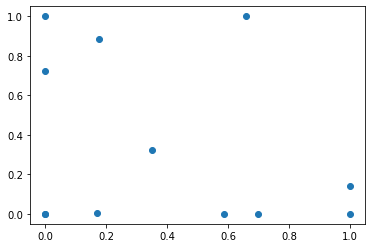

In [192]:
low_limit = -0.001
para_0 = []
para_1 = []
for i in optimizer_1.res:
    los = i['target']
    if los > low_limit:
        #print("this is coordinate {0} {0} {1}; loss: {2} \n".format(i['params']['x'],i['params']['y'],los))
        para_0.append(i['params']['x_1'])
        para_1.append(i['params']['x_3'])
plt.scatter(para_0,para_1)     
plt.savefig("/home/jyb/lyt/filt_0")

In [ ]:
# Bounded region of parameter space
pbounds = {'x_1': (0, 1), 'x_2': (0, 1), 'x_3': (0, 1), 'x_4': (0, 1), 'x_5': (0, 1), 'x_6': (0, 1)}

optimizer_1 = BayesianOptimization(
    f=loss_fun_total,
    pbounds=pbounds,
    random_state=1,
)

t_1 = time()
optimizer_1.maximize(
    init_points=300,
    n_iter=500,
)
t_2 = time()
print(t_1-t_2)

{'target': -0.037863, 'params': {'x_1': 0.4091444259306291, 'x_2': 0.6689893066241082, 'x_3': 0.22184237619289082, 'x_4': 0.22671213420642136, 'x_5': 0.6267293143633833, 'x_6': 0.15431147667139689}}
{'target': -0.037737, 'params': {'x_1': 0.67, 'x_2': 0.4211513048414347, 'x_3': 0.21013481345755003, 'x_4': 0.67, 'x_5': 0.4442008524349376, 'x_6': 0.15539869064902853}}


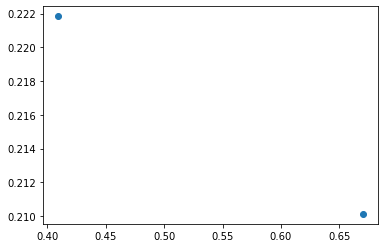

In [194]:
low_limit = -0.04
para_0 = []
para_1 = []
for i in optimizer_2.res:
    los = i['target']
    if los > low_limit:
        print(i)
        #print("this is coordinate {0} {0} {1}; loss: {2} \n".format(i['params']['x'],i['params']['y'],los))
        para_0.append(i['params']['x_1'])
        para_1.append(i['params']['x_3'])
plt.scatter(para_0,para_1)     
plt.savefig("/home/jyb/lyt/filt_Zr12")

In [190]:
optimizer_2.max

{'target': -0.037737,
 'params': {'x_1': 0.67,
  'x_2': 0.4211513048414347,
  'x_3': 0.21013481345755003,
  'x_4': 0.67,
  'x_5': 0.4442008524349376,
  'x_6': 0.15539869064902853}}

In [196]:
pbounds = {'x_1': (0.66, 0.68), 'x_2': (0.405, 0.435), 'x_3': (0.195, 0.225), 'x_4': (0.66, 0.67), 'x_5': (0.43, 0.46), 'x_6': (0.14, 0.17)}
optimizer_res = BayesianOptimization(
    f=loss_fun_total,
    pbounds=pbounds,
    random_state=1,
)

t_1 = time()
optimizer_res.maximize(
    init_points=1000,
    n_iter=100,
)
t_2 = time()
print(t_1-t_2)

|   iter    |  target   |    x_1    |    x_2    |    x_3    |    x_4    |    x_5    |    x_6    |
-------------------------------------------------------------------------------------------------
|  1        | -0.2082   |  0.6683   |  0.4266   |  0.195    |  0.663    |  0.4344   |  0.1428   |
|  2        | -0.04955  |  0.6637   |  0.4154   |  0.2069   |  0.6654   |  0.4426   |  0.1606   |
|  3        | -0.1184   |  0.6641   |  0.4313   |  0.1958   |  0.6667   |  0.4425   |  0.1568   |
|  4        | -0.06782  |  0.6628   |  0.4109   |  0.219    |  0.6697   |  0.4394   |  0.1608   |
|  5        | -0.106    |  0.6775   |  0.4318   |  0.1976   |  0.6604   |  0.4351   |  0.1663   |
|  6        | -0.05651  |  0.662    |  0.4176   |  0.2237   |  0.6653   |  0.4508   |  0.1495   |
|  7        | -0.1247   |  0.6737   |  0.43     |  0.1955   |  0.6675   |  0.4597   |  0.1624   |
|  8        | -0.1305   |  0.6656   |  0.4287   |  0.1981   |  0.6645   |  0.4573   |  0.1488   |
|  9        | -0.182

|  64       | -0.1021   |  0.6738   |  0.4107   |  0.2083   |  0.6658   |  0.4597   |  0.1461   |
|  65       | -0.03003  |  0.665    |  0.4129   |  0.2175   |  0.6646   |  0.4317   |  0.1553   |
|  66       | -0.113    |  0.6642   |  0.429    |  0.2039   |  0.6603   |  0.4478   |  0.1653   |
|  67       | -0.1323   |  0.6676   |  0.4275   |  0.2103   |  0.6654   |  0.4588   |  0.1641   |
|  68       | -0.08237  |  0.6606   |  0.4263   |  0.209    |  0.6695   |  0.4366   |  0.148    |
|  69       | -0.09802  |  0.6616   |  0.4179   |  0.1983   |  0.6663   |  0.4541   |  0.1609   |
|  70       | -0.09372  |  0.6753   |  0.4153   |  0.2204   |  0.6643   |  0.4547   |  0.1588   |
|  71       | -0.2031   |  0.6629   |  0.4074   |  0.1955   |  0.6607   |  0.4438   |  0.1434   |
|  72       | -0.05626  |  0.6606   |  0.4276   |  0.2068   |  0.6675   |  0.4436   |  0.1535   |
|  73       | -0.09688  |  0.6696   |  0.4192   |  0.2191   |  0.664    |  0.4571   |  0.1411   |
|  74       | -0.138

|  134      | -0.182    |  0.6698   |  0.4307   |  0.2217   |  0.6618   |  0.4476   |  0.1669   |
|  135      | -0.1104   |  0.6689   |  0.4327   |  0.2034   |  0.6661   |  0.4505   |  0.1468   |
|  136      | -0.06583  |  0.6603   |  0.4175   |  0.2232   |  0.6634   |  0.4534   |  0.1452   |
|  137      | -0.0684   |  0.6668   |  0.4093   |  0.2165   |  0.667    |  0.4507   |  0.1476   |
|  138      | -0.152    |  0.6738   |  0.4118   |  0.2077   |  0.6637   |  0.4407   |  0.1417   |
|  139      | -0.09891  |  0.6726   |  0.4262   |  0.2134   |  0.6665   |  0.4351   |  0.1445   |
|  140      | -0.08828  |  0.6703   |  0.4313   |  0.2005   |  0.6646   |  0.4429   |  0.1549   |
|  141      | -0.08265  |  0.6632   |  0.4153   |  0.2029   |  0.6684   |  0.454    |  0.1528   |
|  142      | -0.06767  |  0.6721   |  0.4094   |  0.2103   |  0.663    |  0.4558   |  0.1601   |
|  143      | -0.05947  |  0.6727   |  0.4087   |  0.2091   |  0.6699   |  0.4584   |  0.1594   |
|  144      | -0.053

|  205      | -0.06821  |  0.6697   |  0.4176   |  0.2029   |  0.6691   |  0.4307   |  0.1646   |
|  206      | -0.1224   |  0.6638   |  0.4256   |  0.2057   |  0.6697   |  0.4337   |  0.1456   |
|  207      | -0.1411   |  0.6778   |  0.4225   |  0.2043   |  0.66     |  0.4368   |  0.1444   |
|  208      | -0.1555   |  0.6641   |  0.4319   |  0.2212   |  0.667    |  0.4441   |  0.1648   |
|  209      | -0.0777   |  0.6699   |  0.4159   |  0.2033   |  0.6692   |  0.4416   |  0.1548   |
|  210      | -0.1001   |  0.6651   |  0.4315   |  0.2065   |  0.663    |  0.4515   |  0.1457   |
|  211      | -0.0746   |  0.6624   |  0.4301   |  0.2173   |  0.6659   |  0.4373   |  0.1587   |
|  212      | -0.1025   |  0.6728   |  0.4148   |  0.197    |  0.6688   |  0.4438   |  0.1629   |
|  213      | -0.09804  |  0.6651   |  0.4227   |  0.2079   |  0.6638   |  0.4338   |  0.1473   |
|  214      | -0.113    |  0.6616   |  0.4141   |  0.2173   |  0.6662   |  0.4502   |  0.1403   |
|  215      | -0.077

|  272      | -0.102    |  0.6631   |  0.4319   |  0.2043   |  0.6655   |  0.4505   |  0.1471   |
|  273      | -0.121    |  0.6634   |  0.4203   |  0.2188   |  0.6669   |  0.4336   |  0.167    |
|  274      | -0.1105   |  0.6696   |  0.4334   |  0.2116   |  0.6608   |  0.4361   |  0.1656   |
|  275      | -0.0672   |  0.6741   |  0.4318   |  0.2049   |  0.6653   |  0.4495   |  0.1578   |
|  276      | -0.1536   |  0.6646   |  0.4178   |  0.2024   |  0.6685   |  0.4596   |  0.142    |
|  277      | -0.05151  |  0.6743   |  0.4149   |  0.2138   |  0.6626   |  0.4495   |  0.1511   |
|  278      | -0.1749   |  0.6659   |  0.4324   |  0.2233   |  0.6661   |  0.4364   |  0.1682   |
|  279      | -0.07376  |  0.675    |  0.4275   |  0.2014   |  0.6683   |  0.4372   |  0.1589   |
|  280      | -0.06905  |  0.6742   |  0.4273   |  0.2067   |  0.6676   |  0.4571   |  0.1576   |
|  281      | -0.09553  |  0.6618   |  0.4089   |  0.1982   |  0.6617   |  0.4338   |  0.1633   |
|  282      | -0.167

|  337      | -0.1441   |  0.6654   |  0.423    |  0.2212   |  0.6613   |  0.4587   |  0.1605   |
|  338      | -0.06202  |  0.6748   |  0.4345   |  0.2075   |  0.6653   |  0.4504   |  0.1554   |
|  339      | -0.07323  |  0.666    |  0.4082   |  0.2035   |  0.6677   |  0.4492   |  0.164    |
|  340      | -0.08678  |  0.6703   |  0.412    |  0.2138   |  0.663    |  0.4309   |  0.1671   |
|  341      | -0.09168  |  0.6684   |  0.4178   |  0.2172   |  0.6695   |  0.4322   |  0.1452   |
|  342      | -0.05469  |  0.6664   |  0.4125   |  0.2099   |  0.6682   |  0.4556   |  0.1579   |
|  343      | -0.09368  |  0.6648   |  0.4106   |  0.2173   |  0.6624   |  0.4462   |  0.1625   |
|  344      | -0.1899   |  0.6646   |  0.4102   |  0.1962   |  0.6615   |  0.4555   |  0.1431   |
|  345      | -0.1025   |  0.6645   |  0.406    |  0.2153   |  0.6623   |  0.4424   |  0.1442   |
|  346      | -0.05203  |  0.6675   |  0.4177   |  0.2092   |  0.6642   |  0.4331   |  0.1632   |
|  347      | -0.069

|  402      | -0.1041   |  0.6793   |  0.4331   |  0.2028   |  0.662    |  0.4477   |  0.1653   |
|  403      | -0.15     |  0.6667   |  0.4226   |  0.1999   |  0.6619   |  0.4528   |  0.1445   |
|  404      | -0.1528   |  0.6653   |  0.4257   |  0.1955   |  0.6603   |  0.4386   |  0.1501   |
|  405      | -0.1774   |  0.6672   |  0.4292   |  0.1961   |  0.6636   |  0.4491   |  0.1443   |
|  406      | -0.115    |  0.6772   |  0.4244   |  0.1985   |  0.6621   |  0.4524   |  0.1521   |
|  407      | -0.1804   |  0.6697   |  0.4316   |  0.1991   |  0.6696   |  0.4313   |  0.143    |
|  408      | -0.1068   |  0.6645   |  0.4292   |  0.2087   |  0.6665   |  0.4352   |  0.145    |
|  409      | -0.08313  |  0.6704   |  0.4272   |  0.2089   |  0.6687   |  0.4498   |  0.1475   |
|  410      | -0.06042  |  0.6647   |  0.4162   |  0.2177   |  0.6694   |  0.4559   |  0.1478   |
|  411      | -0.04952  |  0.6682   |  0.4233   |  0.2114   |  0.6639   |  0.433    |  0.1614   |
|  412      | -0.123

|  465      | -0.08749  |  0.6789   |  0.4291   |  0.2022   |  0.6623   |  0.4357   |  0.1665   |
|  466      | -0.09628  |  0.6648   |  0.4277   |  0.2028   |  0.6603   |  0.452    |  0.1618   |
|  467      | -0.06275  |  0.6618   |  0.4148   |  0.2235   |  0.6616   |  0.4326   |  0.1578   |
|  468      | -0.1647   |  0.6786   |  0.409    |  0.2104   |  0.6668   |  0.4352   |  0.1403   |
|  469      | -0.1975   |  0.6778   |  0.4061   |  0.2027   |  0.6665   |  0.4386   |  0.1403   |
|  470      | -0.0882   |  0.6715   |  0.4142   |  0.1995   |  0.6697   |  0.4349   |  0.1618   |
|  471      | -0.09589  |  0.6778   |  0.4308   |  0.2005   |  0.6624   |  0.4306   |  0.1679   |
|  472      | -0.1471   |  0.6777   |  0.4229   |  0.1983   |  0.6617   |  0.4473   |  0.1475   |
|  473      | -0.0913   |  0.666    |  0.4101   |  0.2007   |  0.6646   |  0.4453   |  0.1553   |
|  474      | -0.04643  |  0.6799   |  0.4089   |  0.2177   |  0.6679   |  0.4475   |  0.1539   |
|  475      | -0.120

|  528      | -0.05761  |  0.6709   |  0.4248   |  0.2189   |  0.6601   |  0.4514   |  0.1489   |
|  529      | -0.08531  |  0.6797   |  0.4304   |  0.2118   |  0.666    |  0.4358   |  0.1468   |
|  530      | -0.1728   |  0.6631   |  0.4163   |  0.1984   |  0.6651   |  0.4492   |  0.1437   |
|  531      | -0.07923  |  0.6669   |  0.4071   |  0.2108   |  0.6665   |  0.4485   |  0.1644   |
|  532      | -0.1512   |  0.6647   |  0.4235   |  0.2041   |  0.6609   |  0.4392   |  0.1421   |
|  533      | -0.1049   |  0.6792   |  0.4268   |  0.198    |  0.6679   |  0.4406   |  0.1673   |
|  534      | -0.1554   |  0.6699   |  0.4312   |  0.2016   |  0.6637   |  0.441    |  0.1429   |
|  535      | -0.06535  |  0.6666   |  0.4248   |  0.209    |  0.6688   |  0.4381   |  0.1506   |
|  536      | -0.1013   |  0.6664   |  0.4216   |  0.2006   |  0.6617   |  0.4582   |  0.1513   |
|  537      | -0.1757   |  0.6717   |  0.4067   |  0.1992   |  0.661    |  0.4544   |  0.1431   |
|  538      | -0.100

|  591      | -0.07615  |  0.6647   |  0.4143   |  0.2223   |  0.6671   |  0.438    |  0.1449   |
|  592      | -0.1283   |  0.6776   |  0.4288   |  0.1962   |  0.6688   |  0.4476   |  0.1537   |
|  593      | -0.08384  |  0.6735   |  0.4062   |  0.2049   |  0.6609   |  0.4505   |  0.1519   |
|  594      | -0.05147  |  0.6696   |  0.4137   |  0.2186   |  0.6605   |  0.4384   |  0.1577   |
|  595      | -0.1119   |  0.6758   |  0.423    |  0.2169   |  0.6602   |  0.4376   |  0.1413   |
|  596      | -0.1201   |  0.67     |  0.4347   |  0.1954   |  0.6644   |  0.4301   |  0.1584   |
|  597      | -0.1203   |  0.6637   |  0.4264   |  0.1998   |  0.6683   |  0.4362   |  0.1506   |
|  598      | -0.03609  |  0.6646   |  0.4292   |  0.2097   |  0.6687   |  0.4339   |  0.155    |
|  599      | -0.09391  |  0.6755   |  0.4344   |  0.2152   |  0.6618   |  0.4528   |  0.1422   |
|  600      | -0.1224   |  0.6753   |  0.4298   |  0.2118   |  0.6649   |  0.4581   |  0.14     |
|  601      | -0.077

|  653      | -0.1197   |  0.6699   |  0.4175   |  0.1969   |  0.6636   |  0.4328   |  0.157    |
|  654      | -0.0737   |  0.6728   |  0.428    |  0.214    |  0.6619   |  0.4525   |  0.1565   |
|  655      | -0.1197   |  0.662    |  0.4057   |  0.204    |  0.6669   |  0.458    |  0.169    |
|  656      | -0.09175  |  0.6753   |  0.4138   |  0.2137   |  0.6623   |  0.4525   |  0.145    |
|  657      | -0.1095   |  0.6751   |  0.4311   |  0.2106   |  0.6607   |  0.4435   |  0.1651   |
|  658      | -0.1156   |  0.6636   |  0.4062   |  0.217    |  0.6656   |  0.4313   |  0.1695   |
|  659      | -0.04469  |  0.6714   |  0.4226   |  0.2187   |  0.669    |  0.4318   |  0.1505   |
|  660      | -0.1066   |  0.664    |  0.419    |  0.1977   |  0.6607   |  0.439    |  0.1671   |
|  661      | -0.2012   |  0.6795   |  0.4279   |  0.195    |  0.6674   |  0.4307   |  0.1451   |
|  662      | -0.06889  |  0.6602   |  0.4095   |  0.2156   |  0.667    |  0.4411   |  0.1619   |
|  663      | -0.162

|  711      | -0.05739  |  0.6668   |  0.4136   |  0.2132   |  0.6606   |  0.4572   |  0.1514   |
|  712      | -0.07097  |  0.6758   |  0.4263   |  0.2161   |  0.6653   |  0.444    |  0.1594   |
|  713      | -0.097    |  0.6738   |  0.4121   |  0.2176   |  0.6694   |  0.4545   |  0.1619   |
|  714      | -0.109    |  0.6764   |  0.4052   |  0.2002   |  0.6634   |  0.452    |  0.1694   |
|  715      | -0.1027   |  0.6747   |  0.4194   |  0.2226   |  0.6638   |  0.4493   |  0.14     |
|  716      | -0.08869  |  0.6636   |  0.4138   |  0.2066   |  0.6646   |  0.4539   |  0.1484   |
|  717      | -0.1247   |  0.6617   |  0.4206   |  0.2244   |  0.664    |  0.4377   |  0.1633   |
|  718      | -0.07967  |  0.6723   |  0.4052   |  0.2246   |  0.6649   |  0.4391   |  0.16     |
|  719      | -0.08676  |  0.6657   |  0.4189   |  0.2146   |  0.6612   |  0.444    |  0.1621   |
|  720      | -0.1591   |  0.6792   |  0.4056   |  0.22     |  0.6694   |  0.4596   |  0.1681   |
|  721      | -0.126

|  772      | -0.0607   |  0.6636   |  0.4195   |  0.2218   |  0.6607   |  0.4384   |  0.1461   |
|  773      | -0.04849  |  0.6797   |  0.4191   |  0.2216   |  0.6685   |  0.4331   |  0.1505   |
|  774      | -0.1883   |  0.6699   |  0.4314   |  0.2245   |  0.6634   |  0.4535   |  0.1658   |
|  775      | -0.05574  |  0.6656   |  0.411    |  0.2144   |  0.6656   |  0.4346   |  0.1623   |
|  776      | -0.1495   |  0.6672   |  0.4231   |  0.1952   |  0.6659   |  0.452    |  0.1504   |
|  777      | -0.1146   |  0.6752   |  0.4178   |  0.2077   |  0.663    |  0.4522   |  0.1675   |
|  778      | -0.04612  |  0.6689   |  0.4346   |  0.219    |  0.6631   |  0.437    |  0.1508   |
|  779      | -0.03081  |  0.6681   |  0.4199   |  0.216    |  0.6684   |  0.4318   |  0.1536   |
|  780      | -0.1075   |  0.6686   |  0.4177   |  0.2119   |  0.6694   |  0.4399   |  0.1685   |
|  781      | -0.1701   |  0.6649   |  0.4215   |  0.2164   |  0.6688   |  0.4535   |  0.169    |
|  782      | -0.082

|  828      | -0.1551   |  0.6606   |  0.4325   |  0.2156   |  0.6691   |  0.4391   |  0.1683   |
|  829      | -0.1211   |  0.6773   |  0.4316   |  0.195    |  0.6638   |  0.4337   |  0.168    |
|  830      | -0.1103   |  0.6703   |  0.4197   |  0.2096   |  0.6657   |  0.4463   |  0.1675   |
|  831      | -0.07482  |  0.6777   |  0.4285   |  0.2047   |  0.6678   |  0.4344   |  0.1658   |
|  832      | -0.07909  |  0.6755   |  0.4283   |  0.2109   |  0.6645   |  0.4368   |  0.1643   |
|  833      | -0.04893  |  0.6793   |  0.4213   |  0.2221   |  0.6628   |  0.4455   |  0.1498   |
|  834      | -0.1052   |  0.6798   |  0.4125   |  0.2154   |  0.6676   |  0.431    |  0.1695   |
|  835      | -0.08575  |  0.6618   |  0.4234   |  0.1995   |  0.6652   |  0.4328   |  0.1634   |
|  836      | -0.1202   |  0.6755   |  0.4229   |  0.1954   |  0.6604   |  0.4354   |  0.1692   |
|  837      | -0.1028   |  0.6651   |  0.4275   |  0.2034   |  0.6626   |  0.4377   |  0.1489   |
|  838      | -0.109

|  885      | -0.07484  |  0.6701   |  0.415    |  0.2124   |  0.6686   |  0.4385   |  0.165    |
|  886      | -0.1357   |  0.6704   |  0.4118   |  0.2076   |  0.6617   |  0.4574   |  0.1417   |
|  887      | -0.05786  |  0.6721   |  0.4081   |  0.2044   |  0.6614   |  0.445    |  0.1591   |
|  888      | -0.0857   |  0.6766   |  0.4185   |  0.2181   |  0.666    |  0.4592   |  0.1436   |
|  889      | -0.1771   |  0.6763   |  0.4301   |  0.2187   |  0.6645   |  0.4458   |  0.1696   |
|  890      | -0.07791  |  0.6789   |  0.4279   |  0.2088   |  0.6654   |  0.4541   |  0.1483   |
|  891      | -0.06094  |  0.6651   |  0.4114   |  0.2115   |  0.6695   |  0.4371   |  0.164    |
|  892      | -0.06416  |  0.6606   |  0.4202   |  0.2035   |  0.6628   |  0.4418   |  0.1561   |
|  893      | -0.09396  |  0.6755   |  0.4338   |  0.1995   |  0.6639   |  0.4349   |  0.1651   |
|  894      | -0.07604  |  0.6617   |  0.4307   |  0.2172   |  0.6686   |  0.4567   |  0.1445   |
|  895      | -0.173

|  941      | -0.1083   |  0.6605   |  0.4159   |  0.214    |  0.6657   |  0.4336   |  0.1681   |
|  942      | -0.07939  |  0.6679   |  0.4269   |  0.2186   |  0.6621   |  0.4499   |  0.1557   |
|  943      | -0.07364  |  0.6636   |  0.4266   |  0.2112   |  0.6621   |  0.4425   |  0.1604   |
|  944      | -0.1221   |  0.6799   |  0.4215   |  0.2188   |  0.6633   |  0.4453   |  0.1651   |
|  945      | -0.06124  |  0.6794   |  0.4104   |  0.2205   |  0.6699   |  0.4435   |  0.1492   |
|  946      | -0.09355  |  0.6782   |  0.4116   |  0.2246   |  0.664    |  0.4328   |  0.1441   |
|  947      | -0.08042  |  0.6695   |  0.4068   |  0.2026   |  0.668    |  0.4536   |  0.1643   |
|  948      | -0.157    |  0.6609   |  0.428    |  0.2192   |  0.6602   |  0.4417   |  0.166    |
|  949      | -0.06524  |  0.6792   |  0.4326   |  0.2114   |  0.6631   |  0.4477   |  0.1579   |
|  950      | -0.1069   |  0.6733   |  0.4227   |  0.221    |  0.6637   |  0.4373   |  0.1406   |
|  951      | -0.127

|  997      | -0.09225  |  0.674    |  0.4132   |  0.2081   |  0.6682   |  0.4535   |  0.1656   |
|  998      | -0.1133   |  0.6696   |  0.4328   |  0.1959   |  0.6694   |  0.4405   |  0.1644   |
|  999      | -0.07741  |  0.679    |  0.4318   |  0.2159   |  0.6667   |  0.4592   |  0.154    |
|  1000     | -0.09761  |  0.6621   |  0.4057   |  0.2214   |  0.6603   |  0.4585   |  0.1571   |
|  1001     | -0.02354  |  0.6604   |  0.4215   |  0.2123   |  0.6673   |  0.4303   |  0.1557   |
|  1002     | -0.0303   |  0.66     |  0.4168   |  0.2155   |  0.6653   |  0.4332   |  0.1571   |
|  1003     | -0.02761  |  0.6799   |  0.433    |  0.2151   |  0.6684   |  0.4309   |  0.155    |
|  1004     | -0.0738   |  0.6731   |  0.428    |  0.214    |  0.6629   |  0.452    |  0.1569   |
|  1005     | -0.02575  |  0.6649   |  0.4149   |  0.2123   |  0.6654   |  0.4318   |  0.158    |
|  1006     | -0.02858  |  0.6731   |  0.4344   |  0.215    |  0.6699   |  0.4302   |  0.155    |
|  1007     | -0.023

|  1048     | -0.02521  |  0.6683   |  0.4218   |  0.2127   |  0.6661   |  0.4303   |  0.1557   |
|  1049     | -0.02529  |  0.6617   |  0.419    |  0.2154   |  0.667    |  0.4327   |  0.1546   |
|  1050     | -0.02606  |  0.6638   |  0.4196   |  0.2112   |  0.6678   |  0.433    |  0.1579   |
|  1051     | -0.024    |  0.6686   |  0.4257   |  0.214    |  0.6696   |  0.4301   |  0.155    |
|  1052     | -0.02328  |  0.6635   |  0.4182   |  0.2142   |  0.6666   |  0.4314   |  0.1567   |
|  1053     | -0.02343  |  0.6609   |  0.4204   |  0.215    |  0.6683   |  0.4314   |  0.1548   |
|  1054     | -0.04271  |  0.6639   |  0.4174   |  0.2166   |  0.662    |  0.4415   |  0.1554   |
|  1055     | -0.02679  |  0.6644   |  0.4297   |  0.2143   |  0.6689   |  0.4306   |  0.1548   |
|  1056     | -0.02563  |  0.6617   |  0.4168   |  0.2142   |  0.6667   |  0.4308   |  0.155    |
|  1057     | -0.02356  |  0.6624   |  0.4183   |  0.2142   |  0.6671   |  0.4316   |  0.1568   |
|  1058     | -0.127

|  1099     | -0.02476  |  0.6618   |  0.4203   |  0.2149   |  0.6662   |  0.4326   |  0.1555   |
|  1100     | -0.1066   |  0.661    |  0.4213   |  0.1987   |  0.6654   |  0.4542   |  0.1532   |
-558.8105862140656


In [201]:
low_limit = -0.023
para_0 = []
para_1 = []
for i in optimizer_res.res:
    los = i['target']
    if los > low_limit:
        print(i)
        #print("this is coordinate {0} {0} {1}; loss: {2} \n".format(i['params']['x'],i['params']['y'],los))
        para_0.append(i['params']['x_1'])
        para_1.append(i['params']['x_3'])
#plt.scatter(para_0,para_1)     
#plt.savefig("/home/jyb/lyt/filt_Zr12")

{'target': -0.022079, 'params': {'x_1': 0.6623611325005241, 'x_2': 0.4204113439930798, 'x_3': 0.21279000516900712, 'x_4': 0.6672141225644368, 'x_5': 0.4301964148656387, 'x_6': 0.157153123047858}}
{'target': -0.022542, 'params': {'x_1': 0.6627347112210041, 'x_2': 0.41952338494369434, 'x_3': 0.21377150865189815, 'x_4': 0.6693620497259175, 'x_5': 0.4316371402487064, 'x_6': 0.15582744141088117}}
{'target': -0.022594, 'params': {'x_1': 0.6658119804201065, 'x_2': 0.42417135848743326, 'x_3': 0.21229947266552351, 'x_4': 0.6687024781314511, 'x_5': 0.43005487220786953, 'x_6': 0.1571015838300939}}
{'target': -0.022695, 'params': {'x_1': 0.6646991251619625, 'x_2': 0.4216442935168442, 'x_3': 0.21461807975359692, 'x_4': 0.6683020157029625, 'x_5': 0.4305500180903363, 'x_6': 0.15652032614036582}}
{'target': -0.021492, 'params': {'x_1': 0.6653804393225201, 'x_2': 0.4211481668312853, 'x_3': 0.21335868156303237, 'x_4': 0.6698292714455296, 'x_5': 0.43021704065751265, 'x_6': 0.1568267894404729}}


In [205]:
optimizer_res.max

{'target': -0.019887,
 'params': {'x_1': 0.660117010292421,
  'x_2': 0.4214830921716817,
  'x_3': 0.21350320673752465,
  'x_4': 0.6729605319068874,
  'x_5': 0.43003622989304013,
  'x_6': 0.15617283250042938}}

In [ ]:
pbounds = {'x_1': (0.66, 0.67), 'x_2': (0.415, 0.425), 'x_3': (0.21, 0.217), 'x_4': (0.665, 0.673), 'x_5': (0.43, 0.44), 'x_6': (0.155, 0.16)}
optimizer_res = BayesianOptimization(
    f=loss_fun_total,
    pbounds=pbounds,
    random_state=1,
)

t_1 = time()
optimizer_res.maximize(
    init_points=1000,
    n_iter=300,
)
t_2 = time()

|   iter    |  target   |    x_1    |    x_2    |    x_3    |    x_4    |    x_5    |    x_6    |
-------------------------------------------------------------------------------------------------
|  1        | -0.03312  |  0.6642   |  0.4222   |  0.21     |  0.6674   |  0.4315   |  0.1555   |
|  2        | -0.02928  |  0.6619   |  0.4185   |  0.2128   |  0.6693   |  0.4342   |  0.1584   |
|  3        | -0.02999  |  0.662    |  0.4238   |  0.2102   |  0.6704   |  0.4342   |  0.1578   |
|  4        | -0.03242  |  0.6614   |  0.417    |  0.2156   |  0.6727   |  0.4331   |  0.1585   |
|  5        | -0.03266  |  0.6688   |  0.4239   |  0.2106   |  0.6653   |  0.4317   |  0.1594   |
|  6        | -0.03661  |  0.661    |  0.4192   |  0.2167   |  0.6693   |  0.4369   |  0.1566   |
|  7        | -0.03845  |  0.6669   |  0.4233   |  0.2101   |  0.671    |  0.4399   |  0.1587   |
|  8        | -0.03354  |  0.6628   |  0.4229   |  0.2107   |  0.6686   |  0.4391   |  0.1565   |
|  9        | -0.033

|  67       | -0.04893  |  0.6638   |  0.4225   |  0.2136   |  0.6693   |  0.4396   |  0.159    |
|  68       | -0.02196  |  0.6603   |  0.4221   |  0.2133   |  0.6726   |  0.4322   |  0.1563   |
|  69       | -0.03382  |  0.6608   |  0.4193   |  0.2108   |  0.6701   |  0.438    |  0.1585   |
|  70       | -0.04155  |  0.6677   |  0.4184   |  0.2159   |  0.6684   |  0.4382   |  0.1581   |
|  71       | -0.03366  |  0.6614   |  0.4158   |  0.2101   |  0.6655   |  0.4346   |  0.1556   |
|  72       | -0.02845  |  0.6603   |  0.4225   |  0.2128   |  0.671    |  0.4345   |  0.1573   |
|  73       | -0.03187  |  0.6648   |  0.4197   |  0.2156   |  0.6682   |  0.439    |  0.1552   |
|  74       | -0.02889  |  0.6677   |  0.4163   |  0.2143   |  0.6651   |  0.4354   |  0.155    |
|  75       | -0.0236   |  0.6695   |  0.4241   |  0.2156   |  0.6723   |  0.4315   |  0.1558   |
|  76       | -0.04743  |  0.6619   |  0.4212   |  0.2163   |  0.6729   |  0.4371   |  0.1587   |
|  77       | -0.027

|  137      | -0.02743  |  0.6634   |  0.4164   |  0.215    |  0.6706   |  0.4369   |  0.1563   |
|  138      | -0.02903  |  0.6669   |  0.4173   |  0.213    |  0.668    |  0.4336   |  0.1553   |
|  139      | -0.02286  |  0.6663   |  0.4221   |  0.2143   |  0.6702   |  0.4317   |  0.1557   |
|  140      | -0.02837  |  0.6651   |  0.4238   |  0.2113   |  0.6687   |  0.4343   |  0.1575   |
|  141      | -0.02778  |  0.6616   |  0.4184   |  0.2118   |  0.6718   |  0.438    |  0.1571   |
|  142      | -0.03599  |  0.6661   |  0.4165   |  0.2136   |  0.6674   |  0.4386   |  0.1584   |
|  143      | -0.0322   |  0.6663   |  0.4162   |  0.2133   |  0.6729   |  0.4395   |  0.1582   |
|  144      | -0.03388  |  0.6615   |  0.4214   |  0.214    |  0.6687   |  0.4343   |  0.158    |
|  145      | -0.03559  |  0.6685   |  0.4225   |  0.2141   |  0.6724   |  0.4306   |  0.16     |
|  146      | -0.02746  |  0.6605   |  0.417    |  0.213    |  0.6659   |  0.4362   |  0.1552   |
|  147      | -0.024

|  209      | -0.02443  |  0.665    |  0.4186   |  0.2119   |  0.6724   |  0.4339   |  0.1575   |
|  210      | -0.03188  |  0.6625   |  0.4238   |  0.2127   |  0.6674   |  0.4372   |  0.156    |
|  211      | -0.03742  |  0.6612   |  0.4234   |  0.2152   |  0.6697   |  0.4324   |  0.1581   |
|  212      | -0.02845  |  0.6664   |  0.4183   |  0.2105   |  0.672    |  0.4346   |  0.1588   |
|  213      | -0.02233  |  0.6625   |  0.4209   |  0.213    |  0.6681   |  0.4313   |  0.1562   |
|  214      | -0.02695  |  0.6608   |  0.418    |  0.2152   |  0.6699   |  0.4367   |  0.155    |
|  215      | -0.02963  |  0.6668   |  0.42     |  0.2116   |  0.6664   |  0.4318   |  0.1592   |
|  216      | -0.03502  |  0.6698   |  0.4241   |  0.2124   |  0.6712   |  0.4355   |  0.1591   |
|  217      | -0.03411  |  0.6648   |  0.4209   |  0.2155   |  0.6658   |  0.4354   |  0.1568   |
|  218      | -0.04081  |  0.666    |  0.4246   |  0.2127   |  0.6681   |  0.4379   |  0.1582   |
|  219      | -0.027

|  276      | -0.03032  |  0.6623   |  0.4193   |  0.2117   |  0.6718   |  0.4399   |  0.1553   |
|  277      | -0.0294   |  0.6671   |  0.4183   |  0.2144   |  0.6671   |  0.4365   |  0.1569   |
|  278      | -0.05296  |  0.6629   |  0.4241   |  0.2166   |  0.6699   |  0.4321   |  0.1597   |
|  279      | -0.02529  |  0.6675   |  0.4225   |  0.2115   |  0.6716   |  0.4324   |  0.1582   |
|  280      | -0.03521  |  0.6671   |  0.4224   |  0.2127   |  0.6711   |  0.439    |  0.1579   |
|  281      | -0.02706  |  0.6609   |  0.4163   |  0.2107   |  0.6664   |  0.4313   |  0.1589   |
|  282      | -0.04967  |  0.6604   |  0.4174   |  0.2162   |  0.6728   |  0.4361   |  0.1599   |
|  283      | -0.04796  |  0.6604   |  0.4245   |  0.2122   |  0.6714   |  0.4381   |  0.1593   |
|  284      | -0.04262  |  0.6646   |  0.4243   |  0.2118   |  0.6725   |  0.4362   |  0.1599   |
|  285      | -0.02612  |  0.6603   |  0.4223   |  0.214    |  0.6689   |  0.4326   |  0.1566   |
|  286      | -0.034

|  340      | -0.03364  |  0.6652   |  0.4173   |  0.2144   |  0.6674   |  0.4303   |  0.1595   |
|  341      | -0.02261  |  0.6642   |  0.4193   |  0.2152   |  0.6726   |  0.4307   |  0.1559   |
|  342      | -0.03245  |  0.6632   |  0.4175   |  0.2135   |  0.6716   |  0.4385   |  0.158    |
|  343      | -0.04028  |  0.6624   |  0.4169   |  0.2152   |  0.6669   |  0.4354   |  0.1587   |
|  344      | -0.03341  |  0.6623   |  0.4167   |  0.2103   |  0.6662   |  0.4385   |  0.1555   |
|  345      | -0.02553  |  0.6622   |  0.4153   |  0.2147   |  0.6669   |  0.4341   |  0.1557   |
|  346      | -0.02875  |  0.6638   |  0.4192   |  0.2133   |  0.6684   |  0.431    |  0.1589   |
|  347      | -0.0307   |  0.6614   |  0.4192   |  0.2119   |  0.6674   |  0.4367   |  0.1576   |
|  348      | -0.03014  |  0.6619   |  0.4197   |  0.2124   |  0.6706   |  0.4323   |  0.1592   |
|  349      | -0.03863  |  0.6653   |  0.42     |  0.2118   |  0.6665   |  0.4347   |  0.1599   |
|  350      | -0.025

|  403      | -0.03066  |  0.6634   |  0.4209   |  0.2111   |  0.6666   |  0.4376   |  0.1558   |
|  404      | -0.02889  |  0.6627   |  0.4219   |  0.2101   |  0.6653   |  0.4329   |  0.1567   |
|  405      | -0.03202  |  0.6636   |  0.4231   |  0.2103   |  0.6679   |  0.4364   |  0.1557   |
|  406      | -0.03039  |  0.6686   |  0.4215   |  0.2108   |  0.6667   |  0.4375   |  0.157    |
|  407      | -0.03     |  0.6648   |  0.4239   |  0.211    |  0.6727   |  0.4304   |  0.1555   |
|  408      | -0.02272  |  0.6622   |  0.4231   |  0.2132   |  0.6702   |  0.4317   |  0.1558   |
|  409      | -0.02675  |  0.6652   |  0.4224   |  0.2132   |  0.672    |  0.4366   |  0.1562   |
|  410      | -0.03071  |  0.6623   |  0.4187   |  0.2153   |  0.6725   |  0.4386   |  0.1563   |
|  411      | -0.02994  |  0.6641   |  0.4211   |  0.2138   |  0.6681   |  0.431    |  0.1586   |
|  412      | -0.04754  |  0.6609   |  0.4237   |  0.216    |  0.6707   |  0.4349   |  0.1585   |
|  413      | -0.032

|  463      | -0.02593  |  0.6678   |  0.4204   |  0.2116   |  0.6668   |  0.4326   |  0.1565   |
|  464      | -0.03673  |  0.6639   |  0.418    |  0.2148   |  0.6653   |  0.4333   |  0.1587   |
|  465      | -0.03195  |  0.6694   |  0.423    |  0.2117   |  0.6669   |  0.4319   |  0.1594   |
|  466      | -0.04248  |  0.6624   |  0.4226   |  0.2118   |  0.6653   |  0.4373   |  0.1586   |
|  467      | -0.03564  |  0.6609   |  0.4183   |  0.2166   |  0.6663   |  0.4309   |  0.158    |
|  468      | -0.03379  |  0.6693   |  0.4163   |  0.2136   |  0.6705   |  0.4317   |  0.1551   |
|  469      | -0.03891  |  0.6689   |  0.4154   |  0.2118   |  0.6702   |  0.4329   |  0.155    |
|  470      | -0.02601  |  0.6658   |  0.4181   |  0.2111   |  0.6728   |  0.4316   |  0.1586   |
|  471      | -0.03113  |  0.6689   |  0.4236   |  0.2113   |  0.6669   |  0.4302   |  0.1597   |
|  472      | -0.02967  |  0.6689   |  0.421    |  0.2108   |  0.6664   |  0.4358   |  0.1563   |
|  473      | -0.026

|  525      | -0.02636  |  0.663    |  0.4192   |  0.2145   |  0.6698   |  0.4342   |  0.1569   |
|  526      | -0.02856  |  0.6612   |  0.4203   |  0.2116   |  0.671    |  0.4367   |  0.1554   |
|  527      | -0.02768  |  0.6699   |  0.4228   |  0.2116   |  0.6652   |  0.4348   |  0.1568   |
|  528      | -0.03694  |  0.6655   |  0.4216   |  0.2156   |  0.6651   |  0.4371   |  0.1565   |
|  529      | -0.02342  |  0.6699   |  0.4235   |  0.2139   |  0.6698   |  0.4319   |  0.1561   |
|  530      | -0.03022  |  0.6615   |  0.4188   |  0.2108   |  0.6691   |  0.4364   |  0.1556   |
|  531      | -0.03458  |  0.6634   |  0.4157   |  0.2137   |  0.6702   |  0.4362   |  0.1591   |
|  532      | -0.02656  |  0.6624   |  0.4212   |  0.2121   |  0.6657   |  0.4331   |  0.1554   |
|  533      | -0.03102  |  0.6696   |  0.4223   |  0.2107   |  0.6713   |  0.4335   |  0.1596   |
|  534      | -0.02787  |  0.665    |  0.4237   |  0.2115   |  0.6679   |  0.4337   |  0.1555   |
|  535      | -0.022

|  579      | -0.03667  |  0.6694   |  0.4156   |  0.2158   |  0.6729   |  0.4327   |  0.1595   |
|  580      | -0.03138  |  0.6629   |  0.423    |  0.2132   |  0.6698   |  0.4324   |  0.1584   |
|  581      | -0.03552  |  0.6615   |  0.4206   |  0.2135   |  0.6717   |  0.4348   |  0.1589   |
|  582      | -0.03453  |  0.664    |  0.4181   |  0.2155   |  0.6683   |  0.435    |  0.1579   |
|  583      | -0.04169  |  0.6682   |  0.4208   |  0.2128   |  0.6663   |  0.437    |  0.1594   |
|  584      | -0.0289   |  0.6611   |  0.4197   |  0.2165   |  0.6695   |  0.4355   |  0.1553   |
|  585      | -0.02522  |  0.6654   |  0.4215   |  0.211    |  0.6727   |  0.432    |  0.1584   |
|  586      | -0.02691  |  0.6627   |  0.4161   |  0.2118   |  0.6677   |  0.4346   |  0.1562   |
|  587      | -0.02507  |  0.6673   |  0.4231   |  0.2155   |  0.6707   |  0.4327   |  0.1561   |
|  588      | -0.03683  |  0.6611   |  0.419    |  0.2106   |  0.6702   |  0.4395   |  0.1588   |
|  589      | -0.025

|  642      | -0.03264  |  0.6673   |  0.4192   |  0.2141   |  0.6724   |  0.4362   |  0.1585   |
|  643      | -0.02743  |  0.6666   |  0.4184   |  0.2114   |  0.6683   |  0.4315   |  0.1591   |
|  644      | -0.03502  |  0.6671   |  0.419    |  0.2112   |  0.672    |  0.4364   |  0.16     |
|  645      | -0.02778  |  0.661    |  0.4174   |  0.2106   |  0.671    |  0.4316   |  0.1594   |
|  646      | -0.03112  |  0.6649   |  0.4203   |  0.2103   |  0.6699   |  0.4323   |  0.1561   |
|  647      | -0.03305  |  0.669    |  0.4239   |  0.21     |  0.6717   |  0.439    |  0.1576   |
|  648      | -0.03685  |  0.6666   |  0.4227   |  0.2148   |  0.6687   |  0.4357   |  0.1579   |
|  649      | -0.04097  |  0.6684   |  0.4174   |  0.2153   |  0.6715   |  0.438    |  0.159    |
|  650      | -0.04411  |  0.6683   |  0.4192   |  0.2143   |  0.671    |  0.4377   |  0.1598   |
|  651      | -0.02793  |  0.6698   |  0.4206   |  0.2133   |  0.6717   |  0.4322   |  0.1588   |
|  652      | -0.040

|  700      | -0.03257  |  0.6608   |  0.4216   |  0.2116   |  0.6659   |  0.4335   |  0.1584   |
|  701      | -0.03123  |  0.6655   |  0.4154   |  0.216    |  0.6688   |  0.4386   |  0.1559   |
|  702      | -0.02319  |  0.6608   |  0.4202   |  0.2132   |  0.6651   |  0.4304   |  0.1555   |
|  703      | -0.02986  |  0.6604   |  0.4168   |  0.214    |  0.6688   |  0.4398   |  0.1554   |
|  704      | -0.04207  |  0.6687   |  0.4208   |  0.2161   |  0.6654   |  0.431    |  0.1593   |
|  705      | -0.04027  |  0.6657   |  0.4206   |  0.2101   |  0.6701   |  0.4385   |  0.16     |
|  706      | -0.02379  |  0.6643   |  0.4181   |  0.2128   |  0.6668   |  0.4323   |  0.1572   |
|  707      | -0.04923  |  0.6668   |  0.4216   |  0.2154   |  0.6667   |  0.4373   |  0.159    |
|  708      | -0.02968  |  0.6656   |  0.4197   |  0.2111   |  0.6654   |  0.4346   |  0.1583   |
|  709      | -0.04244  |  0.6621   |  0.419    |  0.2135   |  0.6726   |  0.4388   |  0.1594   |
|  710      | -0.028

|  758      | -0.03146  |  0.6627   |  0.4226   |  0.2149   |  0.6695   |  0.4326   |  0.1576   |
|  759      | -0.02807  |  0.6693   |  0.4169   |  0.2151   |  0.672    |  0.4367   |  0.156    |
|  760      | -0.02693  |  0.6613   |  0.4202   |  0.2109   |  0.6716   |  0.4352   |  0.1565   |
|  761      | -0.02595  |  0.6657   |  0.4176   |  0.2141   |  0.6669   |  0.4322   |  0.1576   |
|  762      | -0.02835  |  0.6684   |  0.4214   |  0.2107   |  0.6661   |  0.4339   |  0.1566   |
|  763      | -0.03131  |  0.6689   |  0.4239   |  0.2102   |  0.6667   |  0.4339   |  0.1559   |
|  764      | -0.03505  |  0.6692   |  0.4169   |  0.2151   |  0.6727   |  0.4348   |  0.1591   |
|  765      | -0.03922  |  0.6643   |  0.4231   |  0.2153   |  0.6727   |  0.4334   |  0.1588   |
|  766      | -0.0282   |  0.6692   |  0.4231   |  0.2157   |  0.6726   |  0.4329   |  0.1572   |
|  767      | -0.02335  |  0.6611   |  0.4238   |  0.2124   |  0.6722   |  0.432    |  0.1567   |
|  768      | -0.024

|  815      | -0.02365  |  0.6613   |  0.4175   |  0.213    |  0.6703   |  0.4334   |  0.1561   |
|  816      | -0.04504  |  0.6637   |  0.4207   |  0.2169   |  0.6676   |  0.4336   |  0.1585   |
|  817      | -0.03202  |  0.663    |  0.4185   |  0.217    |  0.6698   |  0.4383   |  0.1552   |
|  818      | -0.02718  |  0.6615   |  0.4223   |  0.2138   |  0.673    |  0.435    |  0.1569   |
|  819      | -0.02252  |  0.6619   |  0.4209   |  0.2154   |  0.6724   |  0.4314   |  0.155    |
|  820      | -0.0301   |  0.6648   |  0.4168   |  0.2143   |  0.67     |  0.4341   |  0.1584   |
|  821      | -0.04976  |  0.662    |  0.4231   |  0.2104   |  0.6664   |  0.4398   |  0.1595   |
|  822      | -0.02642  |  0.6694   |  0.4241   |  0.2131   |  0.6725   |  0.4324   |  0.1552   |
|  823      | -0.02853  |  0.6656   |  0.4181   |  0.2137   |  0.6688   |  0.4348   |  0.1579   |
|  824      | -0.03544  |  0.6692   |  0.4174   |  0.2161   |  0.6709   |  0.4308   |  0.1592   |
|  825      | -0.035

|  872      | -0.05516  |  0.664    |  0.4229   |  0.2133   |  0.6687   |  0.4399   |  0.1598   |
|  873      | -0.04026  |  0.6624   |  0.4173   |  0.2146   |  0.6683   |  0.4372   |  0.1587   |
|  874      | -0.02687  |  0.6678   |  0.4176   |  0.217    |  0.6689   |  0.4308   |  0.1556   |
|  875      | -0.02758  |  0.6656   |  0.4201   |  0.2165   |  0.6722   |  0.4347   |  0.156    |
|  876      | -0.02879  |  0.6656   |  0.4181   |  0.2146   |  0.6691   |  0.4384   |  0.1557   |
|  877      | -0.05035  |  0.6625   |  0.421    |  0.2144   |  0.6683   |  0.439    |  0.1591   |
|  878      | -0.03122  |  0.6654   |  0.4191   |  0.2128   |  0.6659   |  0.4394   |  0.1562   |
|  879      | -0.03861  |  0.6615   |  0.4201   |  0.2132   |  0.6656   |  0.4358   |  0.1585   |
|  880      | -0.03202  |  0.6649   |  0.4157   |  0.2113   |  0.6659   |  0.4358   |  0.1554   |
|  881      | -0.03186  |  0.6638   |  0.4165   |  0.2129   |  0.67     |  0.4336   |  0.1595   |
|  882      | -0.026

|  927      | -0.02694  |  0.6651   |  0.4158   |  0.2131   |  0.6669   |  0.4356   |  0.1572   |
|  928      | -0.03463  |  0.6684   |  0.4184   |  0.2116   |  0.6725   |  0.4347   |  0.1551   |
|  929      | -0.03026  |  0.6608   |  0.4206   |  0.2115   |  0.6662   |  0.432    |  0.1587   |
|  930      | -0.02927  |  0.6695   |  0.4163   |  0.2162   |  0.6707   |  0.4356   |  0.1553   |
|  931      | -0.03484  |  0.6679   |  0.4231   |  0.2153   |  0.6694   |  0.4363   |  0.1572   |
|  932      | -0.0316   |  0.6631   |  0.4171   |  0.2154   |  0.6725   |  0.4362   |  0.1577   |
|  933      | -0.028    |  0.6688   |  0.4154   |  0.2121   |  0.6681   |  0.4303   |  0.1576   |
|  934      | -0.02935  |  0.6694   |  0.423    |  0.2137   |  0.6704   |  0.4379   |  0.1563   |
|  935      | -0.03531  |  0.6628   |  0.4211   |  0.2147   |  0.665    |  0.4386   |  0.1557   |
|  936      | -0.03068  |  0.6651   |  0.4206   |  0.2101   |  0.6684   |  0.4353   |  0.1585   |
|  937      | -0.028

|  983      | -0.03345  |  0.6647   |  0.4219   |  0.2104   |  0.6701   |  0.4398   |  0.1556   |
|  984      | -0.02691  |  0.6645   |  0.4152   |  0.2148   |  0.6652   |  0.4346   |  0.1561   |
|  985      | -0.0356   |  0.6681   |  0.4215   |  0.2147   |  0.6694   |  0.4325   |  0.1591   |
|  986      | -0.03267  |  0.6688   |  0.4194   |  0.2141   |  0.67     |  0.4373   |  0.158    |
|  987      | -0.02348  |  0.6681   |  0.4232   |  0.2139   |  0.6721   |  0.432    |  0.1571   |
|  988      | -0.02753  |  0.6663   |  0.416    |  0.215    |  0.6688   |  0.4338   |  0.1573   |
|  989      | -0.02558  |  0.6637   |  0.4174   |  0.2164   |  0.6714   |  0.4333   |  0.1558   |
|  990      | -0.04756  |  0.6612   |  0.423    |  0.2149   |  0.6656   |  0.4312   |  0.1596   |
|  991      | -0.0287   |  0.6687   |  0.4179   |  0.2107   |  0.6715   |  0.4303   |  0.1582   |
|  992      | -0.02495  |  0.6616   |  0.4219   |  0.2112   |  0.6678   |  0.4312   |  0.1564   |
|  993      | -0.049

|  1034     | -0.02021  |  0.6606   |  0.4203   |  0.2141   |  0.6729   |  0.4306   |  0.1562   |
|  1035     | -0.02036  |  0.6606   |  0.4207   |  0.2145   |  0.6724   |  0.4303   |  0.1558   |
|  1036     | -0.02124  |  0.6602   |  0.4234   |  0.2124   |  0.6722   |  0.4302   |  0.1566   |
|  1037     | -0.02146  |  0.6601   |  0.4242   |  0.2146   |  0.6728   |  0.4305   |  0.1554   |
|  1038     | -0.02041  |  0.661    |  0.4214   |  0.2137   |  0.672    |  0.4305   |  0.1564   |
|  1039     | -0.02018  |  0.6606   |  0.4204   |  0.2147   |  0.6725   |  0.4302   |  0.1562   |
|  1040     | -0.02091  |  0.6605   |  0.4209   |  0.2132   |  0.6697   |  0.4301   |  0.1561   |
|  1041     | -0.02023  |  0.6626   |  0.4225   |  0.2142   |  0.6728   |  0.43     |  0.1561   |
|  1042     | -0.02028  |  0.6602   |  0.4219   |  0.2139   |  0.6729   |  0.4307   |  0.1561   |
|  1043     | -0.02123  |  0.6622   |  0.4236   |  0.2153   |  0.6725   |  0.4301   |  0.1554   |
|  1044     | -0.020

|  1085     | -0.03118  |  0.6652   |  0.4236   |  0.2132   |  0.6729   |  0.4338   |  0.1585   |
|  1086     | -0.02041  |  0.6608   |  0.4216   |  0.2138   |  0.6724   |  0.4305   |  0.1565   |
|  1087     | -0.02073  |  0.6621   |  0.4208   |  0.2137   |  0.6719   |  0.4301   |  0.1561   |
|  1088     | -0.0207   |  0.6605   |  0.4218   |  0.2124   |  0.6729   |  0.4304   |  0.157    |
|  1089     | -0.02092  |  0.6601   |  0.4186   |  0.2146   |  0.6695   |  0.4302   |  0.1561   |
|  1090     | -0.02023  |  0.6607   |  0.419    |  0.214    |  0.6729   |  0.4303   |  0.1565   |
|  1091     | -0.02076  |  0.6617   |  0.4212   |  0.2154   |  0.6729   |  0.43     |  0.1557   |
|  1092     | -0.02049  |  0.6612   |  0.4221   |  0.2128   |  0.6726   |  0.43     |  0.1571   |
|  1093     | -0.02069  |  0.6625   |  0.4218   |  0.214    |  0.6715   |  0.43     |  0.1559   |
|  1094     | -0.02054  |  0.6606   |  0.4184   |  0.2146   |  0.6729   |  0.4301   |  0.1567   |
|  1095     | -0.020

|  1136     | -0.02019  |  0.6609   |  0.4196   |  0.2134   |  0.6719   |  0.43     |  0.1569   |


In [204]:
0.564366 0.247806 0.214184 0.620354 0.384126 0.1571/  0.010554
0.251905 0.568383 0.213946 0.365841 0.599904 0.157431/ 0.00952
0.6321 0.229063 0.213776 0.566393 0.273775 0.157073
0.62773 0.401183 0.214194 0.567786 0.288974 0.157052
0.229182 0.631471 0.213727 0.261385 0.569985 0.157729
0.227917 0.609129 0.157247 0.305692 0.567909 0.213811
0.572169 0.29334 0.156082 0.623372 0.402988 0.21466

SyntaxError: invalid syntax (<ipython-input-204-91a8739365d4>, line 1)

In [ ]:
loss_fun(0.564366 0.247806 0.214184 0.620354 0.384126 0.1571)

In [ ]:
(0.000600123 0.000800164 0) 0.619245 0.39248 0.214164 0.566265 0.285357 0.157055

In [ ]:
# Bounded region of parameter space
pbounds = {'x_1': (0, 0.67), 'x_2': (0, 0.67), 'x_3': (0, 0.25), 'x_4': (0, 0.67), 'x_5': (0, 0.67), 'x_6': (0, 0.25)}

optimizer_3 = BayesianOptimization(
    f=loss_fun_total,
    pbounds=pbounds,
    random_state=1,
)

t_1 = time()
optimizer_3.maximize(
    init_points=1000,
    n_iter=1000,
)
t_2 = time()
print(t_1-t_2)

|   iter    |  target   |    x_1    |    x_2    |    x_3    |    x_4    |    x_5    |    x_6    |
-------------------------------------------------------------------------------------------------
|  1        | -0.8485   |  0.2794   |  0.4826   |  2.859e-0 |  0.2026   |  0.09833  |  0.02308  |
|  2        | -1.218    |  0.1248   |  0.2315   |  0.09919  |  0.361    |  0.2809   |  0.1713   |
|  3        | -0.7242   |  0.137    |  0.5883   |  0.006847 |  0.4492   |  0.2796   |  0.1397   |
|  4        | -0.663    |  0.09406  |  0.1327   |  0.2002   |  0.6487   |  0.21     |  0.1731   |
|  5        | -1.321    |  0.5872   |  0.5994   |  0.02126  |  0.02617  |  0.1138   |  0.2195   |
|  6        | -1.062    |  0.06589  |  0.2821   |  0.2395   |  0.3572   |  0.4636   |  0.07888  |
|  7        | -0.8994   |  0.46     |  0.5592   |  0.004572 |  0.5026   |  0.6625   |  0.187    |
|  8        | -0.7059   |  0.1879   |  0.5288   |  0.02581  |  0.3001   |  0.6088   |  0.0734   |
|  9        | -0.812

|  63       | -0.7245   |  0.1075   |  0.4996   |  0.0076   |  0.2456   |  0.5778   |  0.1732   |
|  64       | -0.826    |  0.4629   |  0.1264   |  0.1105   |  0.3897   |  0.6631   |  0.05098  |
|  65       | -0.8781   |  0.166    |  0.1757   |  0.1875   |  0.3062   |  0.03814  |  0.1271   |
|  66       | -0.9491   |  0.142    |  0.5351   |  0.07433  |  0.0185   |  0.3976   |  0.211    |
|  67       | -0.2891   |  0.2553   |  0.5024   |  0.1278   |  0.3624   |  0.6428   |  0.201    |
|  68       | -1.013    |  0.02166  |  0.4753   |  0.1163   |  0.6349   |  0.1484   |  0.06677  |
|  69       | -1.236    |  0.05459  |  0.2872   |  0.02725  |  0.4246   |  0.538    |  0.1742   |
|  70       | -0.7616   |  0.5134   |  0.2294   |  0.2115   |  0.2873   |  0.5521   |  0.1566   |
|  71       | -0.7884   |  0.09609  |  0.05252  |  0.004583 |  0.04471  |  0.3073   |  0.02834  |
|  72       | -1.101    |  0.01861  |  0.5058   |  0.09871  |  0.5004   |  0.3031   |  0.1125   |
|  73       | -1.424

|  129      | -0.7722   |  0.5324   |  0.3397   |  0.198    |  0.4662   |  0.5212   |  0.1016   |
|  130      | -0.8394   |  0.434    |  0.1205   |  0.08045  |  0.1156   |  0.2738   |  0.06035  |
|  131      | -0.9238   |  0.2726   |  0.6534   |  0.08008  |  0.6583   |  0.4263   |  0.09377  |
|  132      | -0.7242   |  0.5745   |  0.4151   |  0.06301  |  0.5312   |  0.2901   |  0.08938  |
|  133      | -0.9697   |  0.2213   |  0.4672   |  0.06716  |  0.5415   |  0.1978   |  0.136    |
|  134      | -0.5978   |  0.3269   |  0.5731   |  0.2221   |  0.1235   |  0.3922   |  0.2246   |
|  135      | -0.7193   |  0.2989   |  0.6177   |  0.06975  |  0.4079   |  0.4572   |  0.05705  |
|  136      | -1.312    |  0.009224 |  0.2792   |  0.2346   |  0.2298   |  0.5224   |  0.04368  |
|  137      | -1.574    |  0.2291   |  0.09688  |  0.1792   |  0.4685   |  0.4613   |  0.06335  |
|  138      | -0.7988   |  0.4639   |  0.1523   |  0.1062   |  0.2492   |  0.2381   |  0.01441  |
|  139      | -1.14 

|  191      | -1.048    |  0.05364  |  0.3227   |  0.1114   |  0.4506   |  0.3007   |  0.1761   |
|  192      | -0.7656   |  0.4567   |  0.4671   |  0.1547   |  0.1012   |  0.5097   |  0.1953   |
|  193      | -1.323    |  0.6057   |  0.1566   |  0.04417  |  0.262    |  0.2148   |  0.2039   |
|  194      | -1.258    |  0.4111   |  0.5092   |  0.1069   |  0.06663  |  0.07707  |  0.09335  |
|  195      | -0.845    |  0.1299   |  0.5499   |  0.1499   |  0.4615   |  0.329    |  0.02204  |
|  196      | -1.491    |  0.1575   |  0.3093   |  0.04965  |  0.01707  |  0.4887   |  0.1812   |
|  197      | -1.215    |  0.2214   |  0.5651   |  0.1071   |  0.5793   |  0.4402   |  0.1453   |
|  198      | -0.6551   |  0.1345   |  0.3548   |  0.2236   |  0.2043   |  0.5835   |  0.2272   |
|  199      | -1.018    |  0.221    |  0.4577   |  0.2248   |  0.05072  |  0.5887   |  0.04771  |
|  200      | -1.101    |  0.5693   |  0.447    |  0.08608  |  0.1014   |  0.4257   |  0.2119   |
|  201      | -0.551

|  257      | -1.137    |  0.1959   |  0.1313   |  0.02198  |  0.5829   |  0.05909  |  0.1709   |
|  258      | -1.333    |  0.08067  |  0.007168 |  0.1393   |  0.6078   |  0.5765   |  0.08461  |
|  259      | -0.7518   |  0.0182   |  0.5366   |  0.2015   |  0.5819   |  0.4487   |  0.2019   |
|  260      | -0.9834   |  0.6013   |  0.3041   |  0.1395   |  0.3391   |  0.4636   |  0.1707   |
|  261      | -0.8128   |  0.3486   |  0.5551   |  0.1264   |  0.5527   |  0.1888   |  0.04462  |
|  262      | -0.7666   |  0.6498   |  0.4971   |  0.06495  |  0.3894   |  0.64     |  0.02019  |
|  263      | -0.9736   |  0.05597  |  0.4148   |  0.05612  |  0.5127   |  0.3807   |  0.1665   |
|  264      | -1.024    |  0.07224  |  0.05647  |  0.1563   |  0.2745   |  0.05846  |  0.09277  |
|  265      | -0.7829   |  0.4503   |  0.127    |  0.2239   |  0.6364   |  0.6443   |  0.1825   |
|  266      | -0.8968   |  0.2722   |  0.4983   |  0.072    |  0.2107   |  0.406    |  0.1487   |
|  267      | -0.579

|  316      | -1.242    |  0.5409   |  0.6496   |  0.003642 |  0.1442   |  0.07864  |  0.1919   |
|  317      | -1.095    |  0.05442  |  0.6689   |  0.0974   |  0.6065   |  0.1263   |  0.1102   |
|  318      | -1.118    |  0.566    |  0.3988   |  0.1155   |  0.3435   |  0.3845   |  0.1101   |
|  319      | -1.15     |  0.1297   |  0.07636  |  0.03781  |  0.03517  |  0.3743   |  0.2119   |
|  320      | -0.7676   |  0.2406   |  0.05046  |  0.1064   |  0.4033   |  0.285    |  0.2027   |
|  321      | -1.118    |  0.6311   |  0.5828   |  0.176    |  0.3151   |  0.4574   |  0.003355 |
|  322      | -1.107    |  0.6583   |  0.1153   |  0.2266   |  0.5408   |  0.5361   |  0.06723  |
|  323      | -1.146    |  0.1468   |  0.2873   |  0.2123   |  0.3018   |  0.6267   |  0.08817  |
|  324      | -0.8735   |  0.415    |  0.6571   |  0.1609   |  0.03048  |  0.3106   |  0.08369  |
|  325      | -1.401    |  0.3566   |  0.1908   |  0.03057  |  0.4478   |  0.4565   |  0.2168   |
|  326      | -1.181

|  381      | -0.6155   |  0.4385   |  0.5724   |  0.1856   |  0.4872   |  0.5754   |  0.2308   |
|  382      | -0.632    |  0.6044   |  0.2652   |  0.02101  |  0.5558   |  0.3611   |  0.1355   |
|  383      | -0.8994   |  0.5529   |  0.02143  |  0.2195   |  0.0232   |  0.4644   |  0.1469   |
|  384      | -0.9984   |  0.43     |  0.2506   |  0.06887  |  0.3413   |  0.5935   |  0.1413   |
|  385      | -0.4657   |  0.4443   |  0.2957   |  0.243    |  0.4975   |  0.2378   |  0.1634   |
|  386      | -0.7905   |  0.3636   |  0.5923   |  0.06876  |  0.07241  |  0.1282   |  0.09676  |
|  387      | -0.8526   |  0.5722   |  0.1815   |  0.1566   |  0.4178   |  0.2734   |  0.01258  |
|  388      | -0.756    |  0.499    |  0.1981   |  0.09961  |  0.2528   |  0.4446   |  0.02158  |
|  389      | -1.231    |  0.3684   |  0.01033  |  0.2458   |  0.4009   |  0.2574   |  0.03669  |
|  390      | -1.131    |  0.4669   |  0.6069   |  0.07953  |  0.5135   |  0.1926   |  0.2393   |
|  391      | -0.736

|  443      | -0.8943   |  0.1302   |  0.5887   |  0.04537  |  0.4282   |  0.4964   |  0.1407   |
|  444      | -1.123    |  0.4213   |  0.07971  |  0.07701  |  0.3933   |  0.265    |  0.166    |
|  445      | -0.7579   |  0.5708   |  0.1274   |  0.2258   |  0.2567   |  0.6319   |  0.1543   |
|  446      | -1.062    |  0.5294   |  0.3449   |  0.1328   |  0.2195   |  0.08667  |  0.09596  |
|  447      | -0.8221   |  0.144    |  0.02202  |  0.06872  |  0.121    |  0.5866   |  0.02031  |
|  448      | -0.811    |  0.1232   |  0.4717   |  0.2298   |  0.1685   |  0.01427  |  0.2401   |
|  449      | -0.4594   |  0.4571   |  0.2081   |  0.1181   |  0.4015   |  0.2505   |  0.2186   |
|  450      | -0.9799   |  0.4865   |  0.6394   |  0.08777  |  0.6279   |  0.321    |  0.1606   |
|  451      | -0.7121   |  0.4936   |  0.5423   |  0.09906  |  0.3001   |  0.5476   |  0.1794   |
|  452      | -0.9811   |  0.6304   |  0.6563   |  0.04473  |  0.1527   |  0.4797   |  0.1868   |
|  453      | -0.794

|  504      | -0.7919   |  0.06487  |  0.4737   |  0.000657 |  0.5201   |  0.3293   |  0.0511   |
|  505      | -0.8144   |  0.4886   |  0.2115   |  0.221    |  0.1208   |  0.6288   |  0.2427   |
|  506      | -0.7665   |  0.204    |  0.5779   |  0.2105   |  0.2845   |  0.2437   |  0.07061  |
|  507      | -0.7655   |  0.6655   |  0.1714   |  0.2302   |  0.287    |  0.6267   |  0.2097   |
|  508      | -1.372    |  0.1044   |  0.3848   |  0.1684   |  0.2719   |  0.003268 |  0.08133  |
|  509      | -0.728    |  0.5621   |  0.04209  |  0.02635  |  0.4702   |  0.3445   |  0.1245   |
|  510      | -0.3435   |  0.2503   |  0.4044   |  0.2129   |  0.1855   |  0.566    |  0.1042   |
|  511      | -0.9889   |  0.3357   |  0.4888   |  0.06468  |  0.6175   |  0.4704   |  0.1547   |
|  512      | -0.786    |  0.1829   |  0.4662   |  0.0643   |  0.547    |  0.007687 |  0.04163  |
|  513      | -1.115    |  0.3737   |  0.4772   |  0.1231   |  0.5881   |  0.6538   |  0.1161   |
|  514      | -0.717

|  564      | -0.8002   |  0.6097   |  0.2972   |  0.1772   |  0.3272   |  0.03339  |  0.02011  |
|  565      | -0.4134   |  0.1648   |  0.6577   |  0.173    |  0.1796   |  0.4732   |  0.1653   |
|  566      | -0.8289   |  0.029    |  0.2422   |  0.1934   |  0.05261  |  0.5925   |  0.2327   |
|  567      | -0.9858   |  0.5716   |  0.07864  |  0.1413   |  0.4741   |  0.5949   |  0.02394  |
|  568      | -0.9111   |  0.5466   |  0.1863   |  0.1481   |  0.4823   |  0.5206   |  0.07367  |
|  569      | -0.5887   |  0.4069   |  0.1926   |  0.2496   |  0.5457   |  0.2774   |  0.2198   |
|  570      | -0.8285   |  0.4908   |  0.6223   |  0.0429   |  0.1975   |  0.0628   |  0.0795   |
|  571      | -0.7903   |  0.2554   |  0.4239   |  0.1179   |  0.4808   |  0.1804   |  0.04326  |
|  572      | -1.136    |  0.254    |  0.2935   |  0.1055   |  0.6121   |  0.1806   |  0.08801  |
|  573      | -0.8314   |  0.1442   |  0.2492   |  0.09746  |  0.3855   |  0.1865   |  0.06487  |
|  574      | -1.145

|  624      | -0.767    |  0.506    |  0.4583   |  0.1655   |  0.6403   |  0.586    |  0.1883   |
|  625      | -0.9405   |  0.1492   |  0.09247  |  0.05522  |  0.1377   |  0.3805   |  0.1658   |
|  626      | -0.9375   |  0.3534   |  0.03775  |  0.09079  |  0.6484   |  0.466    |  0.09243  |
|  627      | -0.7975   |  0.45     |  0.1776   |  0.01937  |  0.3538   |  0.1941   |  0.1204   |
|  628      | -1.174    |  0.6043   |  0.4367   |  0.1808   |  0.06873  |  0.3214   |  0.1011   |
|  629      | -0.7554   |  0.4334   |  0.1928   |  0.09577  |  0.6573   |  0.07692  |  0.04998  |
|  630      | -0.7649   |  0.1602   |  0.4668   |  0.1784   |  0.5258   |  0.2553   |  0.2131   |
|  631      | -1.291    |  0.4672   |  0.4779   |  0.2055   |  0.4214   |  0.2829   |  0.0077   |
|  632      | -1.056    |  0.399    |  0.3777   |  0.1502   |  0.2163   |  0.3718   |  0.04291  |
|  633      | -0.8314   |  0.4354   |  0.04802  |  0.2188   |  0.1448   |  0.1969   |  0.2212   |
|  634      | -1.177

|  683      | -0.8035   |  0.5317   |  0.06964  |  0.2432   |  0.4721   |  0.5794   |  0.1954   |
|  684      | -0.7819   |  0.2896   |  0.6315   |  0.06327  |  0.03099  |  0.06491  |  0.05018  |
|  685      | -0.8214   |  0.3612   |  0.1498   |  0.2088   |  0.006257 |  0.4998   |  0.2423   |
|  686      | -0.7244   |  0.179    |  0.418    |  0.1787   |  0.2191   |  0.2902   |  0.1836   |
|  687      | -0.8465   |  0.08787  |  0.09627  |  0.09385  |  0.153    |  0.2057   |  0.03752  |
|  688      | -1.183    |  0.06475  |  0.6137   |  0.08647  |  0.3792   |  0.3666   |  0.1126   |
|  689      | -0.9799   |  0.501    |  0.2222   |  0.2231   |  0.04558  |  0.3852   |  0.08476  |
|  690      | -0.9939   |  0.2438   |  0.2044   |  0.1509   |  0.1571   |  0.1972   |  0.07137  |
|  691      | -0.9413   |  0.004553 |  0.249    |  0.01222  |  0.5858   |  0.4836   |  0.1488   |
|  692      | -1.227    |  0.4984   |  0.6037   |  0.1735   |  0.3958   |  0.08325  |  0.1011   |
|  693      | -1.284

|  743      | -0.8455   |  0.2833   |  0.07253  |  0.04176  |  0.4557   |  0.2862   |  0.0242   |
|  744      | -1.54     |  0.2626   |  0.02999  |  0.06776  |  0.3371   |  0.3065   |  0.1922   |
|  745      | -0.8185   |  0.1074   |  0.3417   |  0.03538  |  0.1269   |  0.2746   |  0.03647  |
|  746      | -0.7449   |  0.3768   |  0.305    |  0.2355   |  0.4489   |  0.06911  |  0.1518   |
|  747      | -1.117    |  0.2816   |  0.3354   |  0.164    |  0.1244   |  0.2409   |  0.1201   |
|  748      | -1.207    |  0.4119   |  0.1913   |  0.1257   |  0.1866   |  0.3835   |  0.08557  |
|  749      | -0.7432   |  0.5622   |  0.4596   |  0.204    |  0.1033   |  0.1241   |  0.1356   |
|  750      | -0.7977   |  0.04114  |  0.3605   |  0.084    |  0.2174   |  0.154    |  0.001172 |
|  751      | -0.8375   |  0.4603   |  0.5044   |  0.08457  |  0.3148   |  0.5342   |  0.1619   |
|  752      | -0.7607   |  0.0154   |  0.1903   |  0.2386   |  0.5917   |  0.2179   |  0.2277   |
|  753      | -0.874

|  802      | -0.8405   |  0.6037   |  0.2871   |  0.1785   |  0.09319  |  0.06739  |  0.112    |
|  803      | -0.5729   |  0.5095   |  0.1552   |  0.2023   |  0.1691   |  0.05615  |  0.1283   |
|  804      | -0.7501   |  0.000655 |  0.4744   |  0.1848   |  0.6521   |  0.4443   |  0.1236   |
|  805      | -0.8197   |  0.04933  |  0.358    |  0.03546  |  0.5376   |  0.386    |  0.05323  |
|  806      | -0.9275   |  0.4737   |  0.2231   |  0.1673   |  0.5223   |  0.05801  |  0.1277   |
|  807      | -1.214    |  0.06946  |  0.4351   |  0.07887  |  0.4311   |  0.03253  |  0.2167   |
|  808      | -0.6551   |  0.3204   |  0.5317   |  0.05666  |  0.2244   |  0.5117   |  0.2134   |
|  809      | -0.8207   |  0.2929   |  0.6233   |  0.1449   |  0.0329   |  0.3034   |  0.0401   |
|  810      | -0.7637   |  0.491    |  0.2327   |  0.05029  |  0.5647   |  0.5479   |  0.08591  |
|  811      | -1.387    |  0.2704   |  0.0406   |  0.04472  |  0.4931   |  0.3793   |  0.2058   |
|  812      | -1.187

|  860      | -0.9182   |  0.6006   |  0.6098   |  0.1241   |  0.5109   |  0.475    |  0.2378   |
|  861      | -0.8632   |  0.1618   |  0.3761   |  0.01094  |  0.6185   |  0.6333   |  0.1252   |
|  862      | -1.096    |  0.3927   |  0.5172   |  0.06233  |  0.2539   |  0.1934   |  0.1347   |
|  863      | -0.7592   |  0.6358   |  0.2582   |  0.01125  |  0.4573   |  0.3317   |  0.07413  |
|  864      | -0.5211   |  0.2786   |  0.5779   |  0.2053   |  0.1145   |  0.459    |  0.2494   |
|  865      | -1.186    |  0.5255   |  0.4858   |  0.0775   |  0.1068   |  0.5791   |  0.1526   |
|  866      | -0.7936   |  0.2614   |  0.5062   |  0.1797   |  0.4337   |  0.1389   |  0.2214   |
|  867      | -0.7313   |  0.4817   |  0.2028   |  0.0159   |  0.6116   |  0.5319   |  0.1246   |
|  868      | -0.7716   |  0.2773   |  0.4124   |  0.09963  |  0.02608  |  0.2023   |  0.06157  |
|  869      | -1.015    |  0.6514   |  0.5142   |  0.1009   |  0.4935   |  0.2028   |  0.1318   |
|  870      | -0.911

|  917      | -0.8088   |  0.3328   |  0.2882   |  0.05252  |  0.152    |  0.3065   |  0.1084   |
|  918      | -0.804    |  0.5221   |  0.282    |  0.1683   |  0.1112   |  0.5521   |  0.1714   |
|  919      | -0.8957   |  0.5287   |  0.2409   |  0.1656   |  0.1455   |  0.1481   |  0.06061  |
|  920      | -1.394    |  0.1773   |  0.2736   |  0.2072   |  0.6348   |  0.4237   |  0.03368  |
|  921      | -0.9663   |  0.2814   |  0.6272   |  0.08014  |  0.4149   |  0.6265   |  0.1152   |
|  922      | -0.8023   |  0.3353   |  0.6155   |  0.2325   |  0.606    |  0.3441   |  0.16     |
|  923      | -0.9652   |  0.3946   |  0.1062   |  0.1559   |  0.2138   |  0.08759  |  0.05375  |
|  924      | -1.096    |  0.2102   |  0.6375   |  0.2477   |  0.5808   |  0.3094   |  0.1164   |
|  925      | -0.7012   |  0.5124   |  0.06593  |  0.2485   |  0.4638   |  0.2005   |  0.2272   |
|  926      | -0.8086   |  0.3702   |  0.05708  |  0.02706  |  0.02122  |  0.1449   |  0.01285  |
|  927      | -1.195

|  972      | -0.7446   |  0.05512  |  0.5956   |  0.09461  |  0.2883   |  0.4972   |  0.03894  |
|  973      | -1.145    |  0.3853   |  0.3424   |  0.09208  |  0.4578   |  0.5323   |  0.1169   |
|  974      | -1.024    |  0.4203   |  0.6114   |  0.1142   |  0.09046  |  0.364    |  0.1075   |
|  975      | -1.435    |  0.5148   |  0.5344   |  0.04296  |  0.2934   |  0.1788   |  0.2387   |
|  976      | -0.7828   |  0.6277   |  0.291    |  0.1078   |  0.5001   |  0.3993   |  0.06477  |
|  977      | -0.6805   |  0.3237   |  0.5964   |  0.1704   |  0.3773   |  0.5874   |  0.06907  |
|  978      | -0.7641   |  0.6679   |  0.1339   |  0.2099   |  0.4974   |  0.5789   |  0.1462   |
|  979      | -0.8416   |  0.1557   |  0.324    |  0.2156   |  0.5345   |  0.1163   |  0.2481   |
|  980      | -0.8231   |  0.02038  |  0.2631   |  0.1886   |  0.6524   |  0.09522  |  0.231    |
|  981      | -0.809    |  0.1467   |  0.3703   |  0.1082   |  0.5414   |  0.09284  |  0.04772  |
|  982      | -0.78 

|  1023     | -0.5512   |  0.3239   |  0.5095   |  0.2028   |  0.5233   |  0.5869   |  0.178    |
|  1024     | -0.3781   |  0.5681   |  0.3627   |  0.2258   |  0.5738   |  0.5206   |  0.1417   |
|  1025     | -1.2      |  0.349    |  0.67     |  0.25     |  0.0      |  0.67     |  0.0      |
|  1026     | -1.205    |  0.67     |  0.67     |  0.0      |  0.325    |  0.67     |  0.25     |
|  1027     | -0.8452   |  0.06232  |  0.67     |  0.0      |  0.5156   |  0.2656   |  0.0      |
|  1028     | -0.7391   |  0.67     |  0.0      |  0.25     |  0.67     |  0.4061   |  0.25     |
|  1029     | -0.5406   |  0.5189   |  0.3165   |  0.25     |  0.67     |  0.4646   |  0.25     |
|  1030     | -1.052    |  0.6456   |  0.6411   |  0.03023  |  0.1669   |  0.08182  |  0.1773   |
|  1031     | -0.8263   |  0.1475   |  0.3749   |  0.05068  |  0.5631   |  0.2017   |  0.02789  |
|  1032     | -1.197    |  0.2404   |  0.3043   |  0.02457  |  0.3238   |  0.2016   |  0.2263   |
|  1033     | -0.796

|  1074     | -0.8527   |  0.5089   |  0.4431   |  0.0      |  0.67     |  0.67     |  0.0      |
|  1075     | -1.098    |  0.0      |  0.67     |  0.0      |  0.67     |  0.2746   |  0.25     |
|  1076     | -0.7073   |  0.0      |  0.4314   |  0.25     |  0.67     |  0.2571   |  0.25     |
|  1077     | -0.568    |  0.2636   |  0.67     |  0.25     |  0.2155   |  0.4541   |  0.07956  |
|  1078     | -1.062    |  0.4389   |  0.4851   |  0.09305  |  0.4067   |  0.1445   |  0.2136   |
|  1079     | -0.8182   |  0.0      |  0.2246   |  0.25     |  0.0      |  0.247    |  0.25     |
|  1080     | -0.5119   |  0.6668   |  0.4072   |  0.2494   |  0.5412   |  0.1353   |  0.2302   |
|  1081     | -1.261    |  0.4473   |  0.4067   |  0.1407   |  0.5528   |  0.6121   |  0.1128   |
|  1082     | -0.8683   |  0.4408   |  0.5549   |  0.01477  |  0.5075   |  0.6617   |  0.1904   |
|  1083     | -0.8498   |  0.2569   |  0.67     |  0.0      |  0.0      |  0.67     |  0.0      |
|  1084     | -0.857

|  1125     | -1.164    |  0.1505   |  0.1127   |  0.01239  |  0.4469   |  0.1175   |  0.2077   |
|  1126     | -0.8103   |  0.3367   |  0.3505   |  0.25     |  0.0      |  0.08119  |  0.25     |
|  1127     | -0.6126   |  0.1436   |  0.0      |  0.1368   |  0.2225   |  0.67     |  0.25     |
|  1128     | -1.163    |  0.4122   |  0.221    |  0.1032   |  0.1092   |  0.2807   |  0.09724  |
|  1129     | -0.6724   |  0.178    |  0.466    |  0.02346  |  0.6451   |  0.2879   |  0.1056   |
|  1130     | -0.6859   |  0.0      |  0.1942   |  0.1877   |  0.2823   |  0.67     |  0.25     |
|  1131     | -0.8483   |  0.1982   |  0.4814   |  0.0      |  0.3752   |  0.0      |  0.0      |
|  1132     | -0.8557   |  0.67     |  0.0      |  0.25     |  0.0      |  0.5646   |  0.25     |
|  1133     | -0.7931   |  0.6502   |  0.1513   |  0.02108  |  0.6057   |  0.3114   |  0.01334  |
|  1134     | -0.8404   |  0.67     |  0.2693   |  0.0      |  0.0      |  0.0      |  0.0      |
|  1135     | -1.346

|  1176     | -0.8438   |  0.67     |  0.0      |  0.25     |  0.4552   |  0.3832   |  0.25     |
|  1177     | -0.8197   |  0.0      |  0.0      |  0.25     |  0.67     |  0.67     |  0.25     |
|  1178     | -0.815    |  0.67     |  0.2121   |  0.25     |  0.5063   |  0.67     |  0.25     |
|  1179     | -1.073    |  0.67     |  0.1957   |  0.25     |  0.67     |  0.0      |  0.0      |
|  1180     | -0.1366   |  0.5947   |  0.3042   |  0.2142   |  0.6266   |  0.3407   |  0.1709   |
|  1181     | -0.8492   |  0.67     |  0.67     |  0.25     |  0.4489   |  0.3948   |  0.25     |
|  1182     | -0.8376   |  0.1093   |  0.4316   |  0.25     |  0.67     |  0.0      |  0.25     |
|  1183     | -1.346    |  0.67     |  0.0      |  0.25     |  0.0      |  0.67     |  0.0      |
|  1184     | -0.7748   |  0.6332   |  0.3962   |  0.1922   |  0.4616   |  0.4609   |  0.03686  |
|  1185     | -0.6471   |  0.2521   |  0.01938  |  0.1556   |  0.3053   |  0.6383   |  0.2402   |
|  1186     | -0.981

|  1227     | -0.8616   |  0.3316   |  0.4293   |  0.0      |  0.0      |  0.67     |  0.0      |
|  1228     | -0.8603   |  0.67     |  0.2795   |  0.0      |  0.0      |  0.2845   |  0.0      |
|  1229     | -0.8209   |  0.1754   |  0.553    |  0.0      |  0.67     |  0.1634   |  0.0      |
|  1230     | -1.05     |  0.67     |  0.0      |  0.0      |  0.4363   |  0.67     |  0.25     |
|  1231     | -0.1322   |  0.2849   |  0.5573   |  0.25     |  0.2181   |  0.67     |  0.1439   |
|  1232     | -0.8186   |  0.4252   |  0.0      |  0.0      |  0.67     |  0.3118   |  0.0      |
|  1233     | -1.292    |  0.3841   |  0.0      |  0.25     |  0.67     |  0.0      |  0.0      |
|  1234     | -0.8319   |  0.1509   |  0.67     |  0.0      |  0.5014   |  0.4827   |  0.0      |
|  1235     | -1.237    |  0.1676   |  0.67     |  0.0      |  0.67     |  0.0      |  0.25     |
|  1236     | -1.03     |  0.1411   |  0.4755   |  0.0      |  0.67     |  0.2186   |  0.25     |
|  1237     | -0.217

|  1278     | -0.284    |  0.67     |  0.2299   |  0.25     |  0.5797   |  0.3844   |  0.1798   |
|  1279     | -0.7107   |  0.5317   |  0.275    |  0.08582  |  0.5285   |  0.2438   |  0.006887 |
|  1280     | -1.346    |  0.67     |  0.0      |  0.25     |  0.67     |  0.67     |  0.0      |
|  1281     | -1.356    |  0.4198   |  0.3759   |  0.2043   |  0.3733   |  0.3637   |  0.02931  |
|  1282     | -1.116    |  0.67     |  0.3244   |  0.25     |  0.4649   |  0.2384   |  0.0      |
|  1283     | -0.7539   |  0.3305   |  0.5559   |  0.25     |  0.1266   |  0.07838  |  0.25     |
|  1284     | -0.8395   |  0.2201   |  0.3159   |  0.02882  |  0.4385   |  0.5423   |  0.04667  |
|  1285     | -0.4614   |  0.67     |  0.1388   |  0.25     |  0.5186   |  0.2692   |  0.1754   |
|  1286     | -0.828    |  0.0      |  0.0      |  0.25     |  0.0      |  0.2403   |  0.25     |
|  1287     | -0.633    |  0.67     |  0.518    |  0.25     |  0.67     |  0.135    |  0.2077   |
|  1288     | -1.077

|  1329     | -0.9737   |  0.2653   |  0.2063   |  0.1633   |  0.5708   |  0.1071   |  0.1511   |
|  1330     | -0.1387   |  0.4724   |  0.67     |  0.25     |  0.4107   |  0.67     |  0.1452   |
|  1331     | -0.2869   |  0.4667   |  0.67     |  0.25     |  0.2968   |  0.67     |  0.1195   |
|  1332     | -1.092    |  0.0      |  0.2383   |  0.0      |  0.0      |  0.0      |  0.25     |
|  1333     | -0.6184   |  0.4395   |  0.67     |  0.2217   |  0.0      |  0.08678  |  0.1664   |
|  1334     | -0.8011   |  0.2157   |  0.0      |  0.25     |  0.0      |  0.1868   |  0.25     |
|  1335     | -1.033    |  0.3715   |  0.07951  |  0.09963  |  0.2415   |  0.3948   |  0.2331   |
|  1336     | -0.2276   |  0.457    |  0.6108   |  0.1958   |  0.3669   |  0.67     |  0.1808   |
|  1337     | -1.405    |  0.653    |  0.5937   |  0.03792  |  0.6322   |  0.003978 |  0.1677   |
|  1338     | -0.7333   |  0.0      |  0.67     |  0.25     |  0.67     |  0.3407   |  0.25     |
|  1339     | -0.765

|  1380     | -0.1716   |  0.67     |  0.2986   |  0.1981   |  0.6107   |  0.2437   |  0.1766   |
|  1381     | -0.7522   |  0.4952   |  0.0      |  0.25     |  0.2348   |  0.5056   |  0.25     |
|  1382     | -0.5684   |  0.5991   |  0.3171   |  0.1447   |  0.3734   |  0.2217   |  0.02636  |
|  1383     | -0.6281   |  0.6318   |  0.2139   |  0.214    |  0.1376   |  0.09845  |  0.1683   |
|  1384     | -0.4231   |  0.67     |  0.5278   |  0.25     |  0.5731   |  0.28     |  0.1854   |
|  1385     | -1.225    |  0.2782   |  0.0      |  0.25     |  0.2027   |  0.0      |  0.0      |
|  1386     | -0.8285   |  0.1753   |  0.0      |  0.0      |  0.67     |  0.0      |  0.0      |
|  1387     | -0.8533   |  0.4853   |  0.5136   |  0.0      |  0.67     |  0.0      |  0.0      |
|  1388     | -0.5166   |  0.1654   |  0.67     |  0.25     |  0.1164   |  0.67     |  0.1594   |
|  1389     | -0.7914   |  0.4829   |  0.1559   |  0.1636   |  0.3597   |  0.4643   |  0.2061   |
|  1390     | -1.322

|  1431     | -0.863    |  0.0      |  0.0      |  0.25     |  0.2269   |  0.1301   |  0.25     |
|  1432     | -0.2289   |  0.5958   |  0.3786   |  0.2032   |  0.5897   |  0.2706   |  0.1978   |
|  1433     | -0.5874   |  0.2572   |  0.4239   |  0.2285   |  0.12     |  0.4299   |  0.09046  |
|  1434     | -0.865    |  0.1755   |  0.1639   |  0.1157   |  0.1955   |  0.1019   |  0.03655  |
|  1435     | -0.8682   |  0.1227   |  0.5343   |  0.0      |  0.1431   |  0.2755   |  0.0      |
|  1436     | -0.4752   |  0.5896   |  0.3356   |  0.1736   |  0.629    |  0.2295   |  0.1305   |
|  1437     | -0.6752   |  0.5649   |  0.2466   |  0.1969   |  0.02189  |  0.1338   |  0.2001   |
|  1438     | -0.7628   |  0.4851   |  0.2306   |  0.03883  |  0.5792   |  0.5388   |  0.09025  |
|  1439     | -0.7366   |  0.02093  |  0.3474   |  0.1656   |  0.524    |  0.643    |  0.1914   |
|  1440     | -0.4213   |  0.504    |  0.67     |  0.1535   |  0.1495   |  0.67     |  0.25     |
|  1441     | -0.223

|  1482     | -0.2474   |  0.2996   |  0.67     |  0.1999   |  0.3151   |  0.4686   |  0.177    |
|  1483     | -0.852    |  0.4532   |  0.67     |  0.0      |  0.67     |  0.67     |  0.0      |
|  1484     | -1.012    |  0.501    |  0.009361 |  0.1165   |  0.06905  |  0.4632   |  0.1965   |
|  1485     | -0.8412   |  0.4932   |  0.67     |  0.0      |  0.09375  |  0.67     |  0.0      |
|  1486     | -0.7828   |  0.1437   |  0.5168   |  0.05545  |  0.4919   |  0.5039   |  0.05409  |
|  1497     | -0.7477   |  0.1314   |  0.4305   |  0.12     |  0.6453   |  0.1932   |  0.01828  |
|  1498     | -0.5486   |  0.0      |  0.3918   |  0.1232   |  0.2538   |  0.67     |  0.25     |
|  1499     | -0.7082   |  0.67     |  0.4169   |  0.25     |  0.0      |  0.4396   |  0.25     |
|  1500     | -0.758    |  0.67     |  0.4068   |  0.25     |  0.119    |  0.1815   |  0.25     |
|  1501     | -0.8357   |  0.0      |  0.67     |  0.0      |  0.0      |  0.1978   |  0.0      |
|  1502     | -0.213

|  1543     | -0.758    |  0.5025   |  0.2286   |  0.25     |  0.0      |  0.4272   |  0.25     |
|  1544     | -0.1557   |  0.3013   |  0.5688   |  0.2191   |  0.2696   |  0.6674   |  0.1771   |
|  1545     | -0.8507   |  0.67     |  0.2317   |  0.0      |  0.67     |  0.67     |  0.0      |
|  1546     | -0.8285   |  0.0      |  0.0      |  0.0      |  0.4628   |  0.67     |  0.0      |
|  1547     | -0.6604   |  0.5078   |  0.5553   |  0.04147  |  0.3837   |  0.5666   |  0.1363   |
|  1548     | -0.1339   |  0.3657   |  0.6034   |  0.2004   |  0.4293   |  0.67     |  0.1763   |
|  1549     | -0.4786   |  0.5196   |  0.67     |  0.25     |  0.1467   |  0.67     |  0.1569   |
|  1550     | -1.08     |  0.0      |  0.0      |  0.0      |  0.0      |  0.2256   |  0.25     |
|  1551     | -0.8604   |  0.184    |  0.0      |  0.0      |  0.2929   |  0.67     |  0.0      |
|  1552     | -0.9036   |  0.01638  |  0.1179   |  0.08795  |  0.1153   |  0.4119   |  0.08682  |
|  1553     | -0.251

|  1594     | -1.164    |  0.5598   |  0.4929   |  0.01973  |  0.2004   |  0.4137   |  0.2407   |
|  1595     | -0.838    |  0.5094   |  0.0      |  0.25     |  0.1784   |  0.05019  |  0.1706   |
|  1596     | -1.346    |  0.0      |  0.67     |  0.25     |  0.67     |  0.67     |  0.0      |
|  1597     | -0.9162   |  0.6632   |  0.506    |  0.03718  |  0.1118   |  0.31     |  0.1417   |
|  1598     | -0.8236   |  0.1949   |  0.4454   |  0.25     |  0.67     |  0.2132   |  0.25     |
|  1599     | -0.8319   |  0.6662   |  0.5719   |  0.01384  |  0.6594   |  0.1885   |  0.007592 |
|  1600     | -0.8524   |  0.1853   |  0.5471   |  0.0      |  0.67     |  0.67     |  0.0      |
|  1601     | -0.2411   |  0.239    |  0.6029   |  0.25     |  0.3049   |  0.67     |  0.1833   |
|  1602     | -0.3913   |  0.549    |  0.233    |  0.1654   |  0.67     |  0.531    |  0.25     |
|  1603     | -0.6977   |  0.5466   |  0.1157   |  0.25     |  0.67     |  0.5438   |  0.25     |
|  1604     | -0.611

|  1653     | -1.279    |  0.09457  |  0.6271   |  0.000928 |  0.03556  |  0.469    |  0.1786   |
|  1654     | -1.482    |  0.08749  |  0.4675   |  0.04202  |  0.3577   |  0.3547   |  0.1904   |
|  1655     | -0.801    |  0.3513   |  0.5821   |  0.25     |  0.5713   |  0.1891   |  0.25     |
|  1656     | -0.8242   |  0.5409   |  0.0      |  0.0      |  0.67     |  0.4673   |  0.0      |
|  1657     | -0.8445   |  0.2059   |  0.1401   |  0.0      |  0.2137   |  0.4197   |  0.0      |
|  1658     | -0.6831   |  0.4492   |  0.0      |  0.25     |  0.3276   |  0.67     |  0.25     |
|  1659     | -0.7822   |  0.0      |  0.3599   |  0.1234   |  0.67     |  0.3601   |  0.25     |
|  1660     | -0.8433   |  0.0      |  0.67     |  0.0      |  0.2385   |  0.1996   |  0.0      |
|  1661     | -0.2816   |  0.3314   |  0.67     |  0.126    |  0.4372   |  0.67     |  0.25     |
|  1662     | -0.1274   |  0.274    |  0.67     |  0.1502   |  0.2686   |  0.5846   |  0.25     |
|  1663     | -0.836

|  1704     | -0.5561   |  0.67     |  0.4704   |  0.2068   |  0.5228   |  0.4062   |  0.25     |
|  1711     | -0.8419   |  0.2011   |  0.4056   |  0.25     |  0.4727   |  0.4155   |  0.25     |
|  1712     | -0.09845  |  0.67     |  0.4064   |  0.2007   |  0.5527   |  0.1702   |  0.1547   |
|  1713     | -0.8078   |  0.252    |  0.1188   |  0.2243   |  0.6317   |  0.04178  |  0.1856   |
|  1714     | -0.2157   |  0.67     |  0.2107   |  0.1901   |  0.6074   |  0.302    |  0.2026   |
|  1715     | -0.855    |  0.0      |  0.4435   |  0.0      |  0.67     |  0.0      |  0.0      |
|  1716     | -0.131    |  0.5699   |  0.1726   |  0.1614   |  0.6046   |  0.2713   |  0.2156   |
|  1717     | -0.7621   |  0.1911   |  0.5448   |  0.08061  |  0.4408   |  0.08293  |  0.04284  |
|  1718     | -0.1734   |  0.5381   |  0.3334   |  0.1887   |  0.67     |  0.3777   |  0.174    |
|  1719     | -0.105    |  0.3961   |  0.6601   |  0.2229   |  0.4206   |  0.662    |  0.1668   |
|  1720     | -1.256

|  1769     | -0.1997   |  0.3577   |  0.6007   |  0.1333   |  0.2914   |  0.5733   |  0.25     |
|  1770     | -0.8623   |  0.0      |  0.3998   |  0.25     |  0.0      |  0.67     |  0.25     |
|  1771     | -0.8558   |  0.3592   |  0.4439   |  0.002705 |  0.2194   |  0.402    |  0.005053 |
|  1772     | -0.8151   |  0.67     |  0.67     |  0.25     |  0.4688   |  0.1503   |  0.25     |
|  1773     | -0.3482   |  0.3334   |  0.67     |  0.1149   |  0.2381   |  0.5196   |  0.25     |
|  1774     | -0.6953   |  0.4012   |  0.67     |  0.1024   |  0.0      |  0.4842   |  0.0      |
|  1775     | -0.149    |  0.2629   |  0.5577   |  0.1782   |  0.3733   |  0.67     |  0.2109   |
|  1776     | -0.03504  |  0.2154   |  0.67     |  0.1541   |  0.2475   |  0.6142   |  0.216    |
|  1777     | -0.1543   |  0.2387   |  0.67     |  0.1624   |  0.2639   |  0.5672   |  0.1909   |
|  1778     | -0.1069   |  0.57     |  0.2581   |  0.2481   |  0.5784   |  0.3397   |  0.1569   |
|  1779     | -0.796

In [208]:
optimizer_1.pbounds

AttributeError: 'BayesianOptimization' object has no attribute 'pbounds'

In [220]:
optimizer_3.max

{'target': -0.031899,
 'params': {'x_1': 0.6015675143111676,
  'x_2': 0.36590533494020605,
  'x_3': 0.2168973546437095,
  'x_4': 0.563660707982147,
  'x_5': 0.223615278722396,
  'x_6': 0.1519834373820906}}

In [ ]:
optimizer_3.maximize(
    init_points=1000,
    n_iter=5000,
)

|   iter    |  target   |    x_1    |    x_2    |    x_3    |    x_4    |    x_5    |    x_6    |
-------------------------------------------------------------------------------------------------
|  4179     | -0.8332   |  0.3355   |  0.1644   |  0.0932   |  0.2892   |  0.3838   |  0.01236  |
|  4180     | -0.411    |  0.4014   |  0.6639   |  0.2244   |  0.1888   |  0.4152   |  0.1794   |
|  4181     | -0.8603   |  0.2034   |  0.2738   |  0.1324   |  0.05154  |  0.1721   |  0.00644  |
|  4182     | -1.185    |  0.5239   |  0.01607  |  0.1947   |  0.09263  |  0.6625   |  0.08542  |
|  4183     | -0.8296   |  0.1424   |  0.06909  |  0.1044   |  0.1626   |  0.6142   |  0.006804 |
|  4184     | -0.7987   |  0.2611   |  0.2094   |  0.1698   |  0.35     |  0.1271   |  0.1616   |
|  4185     | -0.7818   |  0.1468   |  0.3609   |  0.2163   |  0.1619   |  0.2511   |  0.2409   |
|  4186     | -1.054    |  0.06095  |  0.2694   |  0.09435  |  0.3017   |  0.2009   |  0.1816   |
|  4187     | -0.500

|  4240     | -1.049    |  0.516    |  0.001451 |  0.08289  |  0.2921   |  0.4317   |  0.1219   |
|  4241     | -0.8285   |  0.1595   |  0.3378   |  0.06458  |  0.3844   |  0.4684   |  0.04962  |
|  4242     | -0.8385   |  0.2714   |  0.01799  |  0.118    |  0.6189   |  0.1265   |  0.05077  |
|  4243     | -1.014    |  0.6479   |  0.4108   |  0.1505   |  0.6007   |  0.01774  |  0.105    |
|  4244     | -0.8261   |  0.3741   |  0.3214   |  0.1002   |  0.3432   |  0.4972   |  0.06377  |
|  4245     | -0.7518   |  0.541    |  0.215    |  0.1632   |  0.4895   |  0.5997   |  0.2133   |
|  4246     | -0.8097   |  0.2855   |  0.3582   |  0.2335   |  0.03233  |  0.259    |  0.2017   |
|  4247     | -0.7101   |  0.6159   |  0.3443   |  0.07774  |  0.5886   |  0.4548   |  0.05713  |
|  4248     | -0.9189   |  0.4076   |  0.09192  |  0.2141   |  0.08247  |  0.2654   |  0.09918  |
|  4249     | -1.008    |  0.5267   |  0.08246  |  0.04385  |  0.5386   |  0.5042   |  0.1279   |
|  4250     | -0.832

|  4296     | -0.7711   |  0.352    |  0.2999   |  0.1612   |  0.3527   |  0.1104   |  0.2199   |
|  4297     | -0.8113   |  0.2484   |  0.6246   |  0.001953 |  0.08361  |  0.4759   |  0.01382  |
|  4298     | -0.8957   |  0.5318   |  0.3787   |  0.1235   |  0.2438   |  0.3311   |  0.06758  |
|  4299     | -0.7603   |  0.1296   |  0.3507   |  0.02531  |  0.2636   |  0.4537   |  0.1126   |
|  4300     | -1.079    |  0.3509   |  0.4212   |  0.145    |  0.07572  |  0.3729   |  0.1605   |
|  4301     | -1.057    |  0.2105   |  0.4677   |  0.2027   |  0.002531 |  0.3856   |  0.02711  |
|  4302     | -1.052    |  0.01736  |  0.4932   |  0.147    |  0.5717   |  0.07022  |  0.1861   |
|  4303     | -0.7992   |  0.6019   |  0.281    |  0.1113   |  0.03836  |  0.5452   |  0.07488  |
|  4304     | -0.7802   |  0.1829   |  0.2765   |  0.000178 |  0.2763   |  0.02408  |  0.09326  |
|  4305     | -0.8297   |  0.1075   |  0.3891   |  0.04754  |  0.5971   |  0.5838   |  0.05617  |
|  4306     | -0.735

|  4349     | -0.8479   |  0.4946   |  0.05214  |  0.05906  |  0.121    |  0.0827   |  0.09295  |
|  4350     | -0.7434   |  0.5792   |  0.5852   |  0.05878  |  0.5582   |  0.4129   |  0.099    |
|  4351     | -1.542    |  0.5131   |  0.6055   |  0.04225  |  0.3476   |  0.3753   |  0.2076   |
|  4352     | -0.7555   |  0.4818   |  0.5163   |  0.2481   |  0.1386   |  0.44     |  0.2111   |
|  4353     | -0.7683   |  0.3689   |  0.03451  |  0.2063   |  0.1206   |  0.6202   |  0.1204   |
|  4354     | -0.766    |  0.1965   |  0.5564   |  0.1711   |  0.4753   |  0.5916   |  0.004342 |
|  4355     | -1.72     |  0.2588   |  0.4652   |  0.06092  |  0.1421   |  0.2406   |  0.1742   |
|  4356     | -0.7612   |  0.5173   |  0.3172   |  0.04404  |  0.4628   |  0.08326  |  0.06831  |
|  4357     | -0.964    |  0.2622   |  0.5464   |  0.2137   |  0.4316   |  0.1497   |  0.0849   |
|  4358     | -1.121    |  0.1548   |  0.5675   |  0.0961   |  0.4033   |  0.09055  |  0.1134   |
|  4359     | -1.029

|  4404     | -0.7736   |  0.1375   |  0.1752   |  0.2035   |  0.1335   |  0.5748   |  0.2218   |
|  4405     | -1.634    |  0.66     |  0.05323  |  0.2225   |  0.3751   |  0.4193   |  0.07144  |
|  4406     | -1.255    |  0.6157   |  0.5491   |  0.03602  |  0.6216   |  0.534    |  0.215    |
|  4407     | -0.8313   |  0.3929   |  0.3975   |  0.04471  |  0.6094   |  0.6438   |  0.02543  |
|  4408     | -0.8501   |  0.6185   |  0.6627   |  0.1686   |  0.6429   |  0.5266   |  0.1625   |
|  4409     | -0.879    |  0.6552   |  0.199    |  0.1002   |  0.5017   |  0.387    |  0.1642   |
|  4410     | -0.7968   |  0.09721  |  0.4743   |  0.2076   |  0.5696   |  0.1074   |  0.203    |
|  4411     | -1.058    |  0.4496   |  0.2136   |  0.1272   |  0.3128   |  0.2511   |  0.1525   |
|  4412     | -0.8703   |  0.4955   |  0.5748   |  0.09744  |  0.5935   |  0.6403   |  0.07554  |
|  4413     | -0.8079   |  0.3088   |  0.2707   |  0.06353  |  0.1913   |  0.4699   |  0.1211   |
|  4414     | -1.564

|  4460     | -1.159    |  0.1339   |  0.5722   |  0.09942  |  0.1465   |  0.2108   |  0.2389   |
|  4461     | -1.396    |  0.4407   |  0.4306   |  0.246    |  0.1428   |  0.3379   |  0.07199  |
|  4462     | -0.6676   |  0.2902   |  0.5689   |  0.1184   |  0.2448   |  0.2394   |  0.04853  |
|  4463     | -0.932    |  0.02657  |  0.104    |  0.08525  |  0.2912   |  0.3494   |  0.1002   |
|  4464     | -0.6214   |  0.5288   |  0.2422   |  0.1321   |  0.2807   |  0.02858  |  0.2065   |
|  4465     | -1.089    |  0.003227 |  0.1612   |  0.1066   |  0.6304   |  0.1299   |  0.1012   |
|  4466     | -1.157    |  0.1394   |  0.03051  |  0.1284   |  0.1331   |  0.3279   |  0.1342   |
|  4467     | -0.821    |  0.312    |  0.4681   |  0.1006   |  0.2295   |  0.1648   |  0.06845  |
|  4468     | -0.829    |  0.2282   |  0.3407   |  0.1906   |  0.6494   |  0.1602   |  0.1399   |
|  4469     | -0.8853   |  0.2849   |  0.1534   |  0.08418  |  0.2598   |  0.5899   |  0.07386  |
|  4470     | -1.049

|  4515     | -0.8409   |  0.332    |  0.2581   |  0.1475   |  0.3853   |  0.4009   |  0.2307   |
|  4516     | -0.9558   |  0.09235  |  0.168    |  0.09431  |  0.2224   |  0.1006   |  0.2373   |
|  4517     | -0.7092   |  0.2069   |  0.3217   |  0.06997  |  0.3681   |  0.6175   |  0.1976   |
|  4518     | -0.7061   |  0.428    |  0.1328   |  0.1921   |  0.3466   |  0.219    |  0.189    |
|  4519     | -0.8042   |  0.08398  |  0.1536   |  0.09278  |  0.5412   |  0.2917   |  0.2315   |
|  4520     | -0.8568   |  0.624    |  0.5745   |  0.01112  |  0.04207  |  0.2707   |  0.02034  |
|  4521     | -0.9311   |  0.4149   |  0.514    |  0.2189   |  0.3724   |  0.4697   |  0.06737  |
|  4522     | -0.7256   |  0.47     |  0.6278   |  0.008648 |  0.1178   |  0.4073   |  0.1332   |
|  4523     | -0.8425   |  0.1409   |  0.5439   |  0.0315   |  0.2565   |  0.2551   |  0.1058   |
|  4524     | -0.819    |  0.06588  |  0.5711   |  0.03166  |  0.05998  |  0.5735   |  0.03285  |
|  4525     | -0.648

|  4570     | -0.5794   |  0.3169   |  0.02675  |  0.1573   |  0.6537   |  0.2655   |  0.175    |
|  4571     | -1.224    |  0.2986   |  0.6153   |  0.1261   |  0.4721   |  0.2331   |  0.1486   |
|  4572     | -0.7149   |  0.64     |  0.3677   |  0.03607  |  0.5411   |  0.2889   |  0.07004  |
|  4573     | -0.3749   |  0.657    |  0.4766   |  0.2273   |  0.5295   |  0.1025   |  0.1507   |
|  4574     | -1.131    |  0.3497   |  0.4967   |  0.06427  |  0.4735   |  0.4044   |  0.204    |
|  4575     | -0.8089   |  0.4009   |  0.178    |  0.000281 |  0.5503   |  0.2489   |  0.04958  |
|  4576     | -0.8552   |  0.3855   |  0.4889   |  0.06874  |  0.252    |  0.1471   |  0.07421  |
|  4577     | -1.182    |  0.2901   |  0.546    |  0.04981  |  0.0992   |  0.2384   |  0.2085   |
|  4578     | -1.088    |  0.4261   |  0.2386   |  0.07449  |  0.2554   |  0.604    |  0.1302   |
|  4579     | -0.7086   |  0.136    |  0.0752   |  0.2338   |  0.2171   |  0.5631   |  0.1833   |
|  4580     | -1.334

|  4622     | -0.8514   |  0.07987  |  0.2505   |  0.155    |  0.1186   |  0.03983  |  0.192    |
|  4623     | -1.219    |  0.3098   |  0.06762  |  0.1501   |  0.09808  |  0.4957   |  0.1081   |
|  4624     | -0.8377   |  0.1188   |  0.05651  |  0.1101   |  0.4037   |  0.08272  |  0.2148   |
|  4625     | -0.7894   |  0.1259   |  0.1764   |  0.1851   |  0.354    |  0.3526   |  0.162    |
|  4626     | -1.007    |  0.5422   |  0.1636   |  0.1581   |  0.5268   |  0.4338   |  0.1231   |
|  4627     | -0.9534   |  0.431    |  0.3529   |  0.09354  |  0.582    |  0.3955   |  0.1557   |
|  4628     | -1.359    |  0.6183   |  0.02302  |  0.2175   |  0.3415   |  0.3969   |  0.04007  |
|  4629     | -0.8221   |  0.3993   |  0.1244   |  0.1098   |  0.2227   |  0.4956   |  0.06047  |
|  4630     | -1.012    |  0.6454   |  0.115    |  0.193    |  0.344    |  0.6197   |  0.001393 |
|  4631     | -0.8357   |  0.6063   |  0.6117   |  0.1133   |  0.1201   |  0.2505   |  0.007142 |
|  4632     | -0.615

|  4674     | -1.069    |  0.1555   |  0.2994   |  0.128    |  0.2023   |  0.5991   |  0.06667  |
|  4675     | -0.8549   |  0.1055   |  0.2138   |  0.06629  |  0.58     |  0.6356   |  0.1163   |
|  4676     | -1.19     |  0.3492   |  0.1097   |  0.0948   |  0.2664   |  0.4533   |  0.1575   |
|  4677     | -0.8245   |  0.3399   |  0.3263   |  0.1892   |  0.04828  |  0.5498   |  0.2493   |
|  4678     | -1.279    |  0.6659   |  0.04849  |  0.01318  |  0.4884   |  0.5099   |  0.1613   |
|  4679     | -0.9585   |  0.07358  |  0.2765   |  0.07135  |  0.6532   |  0.3214   |  0.2123   |
|  4680     | -0.8332   |  0.4176   |  0.5979   |  0.02431  |  0.3258   |  0.1272   |  0.0987   |
|  4681     | -0.851    |  0.04648  |  0.1964   |  0.09999  |  0.6202   |  0.2736   |  0.001236 |
|  4682     | -1.302    |  0.07668  |  0.3498   |  0.2077   |  0.2923   |  0.6488   |  0.01796  |
|  4683     | -0.6988   |  0.1161   |  0.1098   |  0.2022   |  0.462    |  0.6669   |  0.1999   |
|  4684     | -1.32 

|  4729     | -1.098    |  0.6142   |  0.386    |  0.2387   |  0.1349   |  0.363    |  0.07111  |
|  4730     | -1.075    |  0.6487   |  0.1798   |  0.1198   |  0.3782   |  0.04215  |  0.1138   |
|  4731     | -0.8261   |  0.4441   |  0.4257   |  0.1968   |  0.2709   |  0.1283   |  0.2212   |
|  4732     | -0.947    |  0.1556   |  0.3979   |  0.1754   |  0.1514   |  0.05097  |  0.04312  |
|  4733     | -0.8363   |  0.2982   |  0.326    |  0.2329   |  0.3975   |  0.08615  |  0.1853   |
|  4734     | -0.9075   |  0.0711   |  0.187    |  0.1743   |  0.03443  |  0.6233   |  0.1442   |
|  4735     | -0.7663   |  0.4346   |  0.1571   |  0.2103   |  0.002664 |  0.3893   |  0.1865   |
|  4736     | -1.001    |  0.24     |  0.1702   |  0.1669   |  0.3813   |  0.6033   |  0.1311   |
|  4737     | -1.195    |  0.6154   |  0.08933  |  0.03171  |  0.03259  |  0.1516   |  0.2066   |
|  4738     | -0.7137   |  0.6486   |  0.4196   |  0.1775   |  0.05434  |  0.6444   |  0.1379   |
|  4739     | -0.951

|  4786     | -0.8116   |  0.02991  |  0.08805  |  0.02282  |  0.5264   |  0.4423   |  0.0837   |
|  4787     | -0.7535   |  0.3704   |  0.5915   |  0.02919  |  0.1987   |  0.5951   |  0.04304  |
|  4788     | -1.535    |  0.4787   |  0.1018   |  0.03151  |  0.1606   |  0.2871   |  0.1817   |
|  4789     | -1.201    |  0.3236   |  0.3061   |  0.1666   |  0.522    |  0.6532   |  0.09643  |
|  4790     | -0.8839   |  0.086    |  0.04097  |  0.01082  |  0.07158  |  0.1843   |  0.01775  |
|  4791     | -1.053    |  0.4186   |  0.09599  |  0.008109 |  0.5009   |  0.6471   |  0.2189   |
|  4792     | -0.8101   |  0.5861   |  0.3907   |  0.01047  |  0.4582   |  0.3345   |  0.02648  |
|  4793     | -0.8432   |  0.2508   |  0.2732   |  0.02172  |  0.6524   |  0.5198   |  0.05072  |
|  4794     | -0.805    |  0.3771   |  0.2313   |  0.05875  |  0.4624   |  0.632    |  0.08861  |
|  4795     | -0.8237   |  0.3062   |  0.6579   |  0.0389   |  0.1579   |  0.1608   |  0.04502  |
|  4796     | -0.791

|  4837     | -0.7016   |  0.2567   |  0.662    |  0.2123   |  0.2521   |  0.05708  |  0.1821   |
|  4838     | -1.023    |  0.4145   |  0.5742   |  0.1571   |  0.2961   |  0.288    |  0.0708   |
|  4839     | -1.301    |  0.6046   |  0.6613   |  0.1024   |  0.5944   |  0.5782   |  0.1706   |
|  4840     | -0.8051   |  0.3011   |  0.3176   |  0.09718  |  0.1224   |  0.0777   |  0.01336  |
|  4841     | -1.038    |  0.6224   |  0.5649   |  0.00877  |  0.4721   |  0.1586   |  0.223    |
|  4842     | -1.466    |  0.6418   |  0.6532   |  0.1741   |  0.2725   |  0.02511  |  0.04596  |
|  4843     | -0.7703   |  0.1263   |  0.4576   |  0.06258  |  0.1148   |  0.5288   |  0.1521   |
|  4844     | -1.691    |  0.2033   |  0.2738   |  0.1668   |  0.662    |  0.1922   |  0.06324  |
|  4845     | -0.7029   |  0.5962   |  0.1548   |  0.1223   |  0.5721   |  0.4611   |  0.004861 |
|  4846     | -0.8411   |  0.2892   |  0.02049  |  0.09568  |  0.13     |  0.4277   |  0.03265  |
|  4847     | -0.820

|  4896     | -0.672    |  0.4469   |  0.619    |  0.1994   |  0.303    |  0.3432   |  0.1856   |
|  4897     | -0.9918   |  0.2872   |  0.07919  |  0.1486   |  0.647    |  0.2307   |  0.03796  |
|  4898     | -1.24     |  0.3641   |  0.02099  |  0.2349   |  0.3805   |  0.2174   |  0.02427  |
|  4899     | -0.331    |  0.6282   |  0.2593   |  0.1593   |  0.6103   |  0.511    |  0.1863   |
|  4900     | -0.8355   |  0.3259   |  0.5703   |  0.03385  |  0.01729  |  0.1623   |  0.009626 |
|  4901     | -0.846    |  0.5936   |  0.5843   |  0.2124   |  0.1287   |  0.05744  |  0.1313   |
|  4902     | -0.7422   |  0.4267   |  0.09197  |  0.194    |  0.3591   |  0.1555   |  0.2177   |
|  4903     | -1.213    |  0.4256   |  0.07617  |  0.1786   |  0.3654   |  0.6618   |  0.07014  |
|  4904     | -1.029    |  0.279    |  0.3509   |  0.02506  |  0.149    |  0.4852   |  0.2208   |
|  4905     | -0.7519   |  0.5261   |  0.5833   |  0.08196  |  0.1772   |  0.5984   |  0.03361  |
|  4906     | -1.11 

|  4950     | -1.131    |  0.3406   |  0.6383   |  0.2433   |  0.2326   |  0.3068   |  0.006221 |
|  4951     | -0.9697   |  0.6648   |  0.3709   |  0.173    |  0.003007 |  0.295    |  0.1136   |
|  4952     | -1.198    |  0.5717   |  0.6505   |  0.2174   |  0.5816   |  0.4562   |  0.0214   |
|  4953     | -1.239    |  0.151    |  0.04253  |  0.1369   |  0.4937   |  0.002413 |  0.1574   |
|  4954     | -0.7854   |  0.4455   |  0.2468   |  0.04304  |  0.536    |  0.2602   |  0.03975  |
|  4955     | -1.077    |  0.3168   |  0.2976   |  0.1796   |  0.132    |  0.1968   |  0.006761 |
|  4956     | -0.6586   |  0.145    |  0.1306   |  0.2229   |  0.2525   |  0.6299   |  0.1649   |
|  4957     | -0.2415   |  0.381    |  0.6636   |  0.2161   |  0.1514   |  0.4592   |  0.1265   |
|  4958     | -1.112    |  0.125    |  0.08459  |  0.218    |  0.6696   |  0.04441  |  0.05729  |
|  4959     | -0.7999   |  0.5097   |  0.2976   |  0.1354   |  0.3824   |  0.5114   |  0.2109   |
|  4960     | -0.990

|  5006     | -1.007    |  0.2412   |  0.4287   |  0.1371   |  0.3615   |  0.09591  |  0.1763   |
|  5007     | -1.124    |  0.6192   |  0.5495   |  0.001302 |  0.3482   |  0.6677   |  0.2356   |
|  5008     | -0.7661   |  0.4471   |  0.6657   |  0.146    |  0.6247   |  0.1144   |  0.2292   |
|  5009     | -1.173    |  0.5712   |  0.4643   |  0.1125   |  0.3107   |  0.3129   |  0.1214   |
|  5010     | -0.8125   |  0.04041  |  0.05733  |  0.2471   |  0.08321  |  0.6207   |  0.2445   |
|  5011     | -1.285    |  0.1347   |  0.3854   |  0.02812  |  0.4134   |  0.04479  |  0.1649   |
|  5012     | -0.7827   |  0.439    |  0.05544  |  0.2134   |  0.0965   |  0.6218   |  0.1419   |
|  5013     | -0.8188   |  0.6637   |  0.1623   |  0.1802   |  0.2282   |  0.403    |  0.166    |
|  5014     | -0.7597   |  0.6453   |  0.3946   |  0.1581   |  0.1881   |  0.5403   |  0.2099   |
|  5015     | -1.734    |  0.2693   |  0.4511   |  0.07636  |  0.3345   |  0.2695   |  0.1828   |
|  5016     | -1.088

|  5062     | -1.211    |  0.3955   |  0.3448   |  0.165    |  0.375    |  0.2364   |  0.09163  |
|  5063     | -0.8629   |  0.3966   |  0.6528   |  0.07266  |  0.1638   |  0.05158  |  0.1023   |
|  5064     | -1.263    |  0.02934  |  0.3288   |  0.2183   |  0.5218   |  0.413    |  0.03426  |
|  5065     | -1.04     |  0.2347   |  0.3213   |  0.09069  |  0.2764   |  0.391    |  0.2371   |
|  5066     | -0.838    |  0.3633   |  0.3944   |  0.0729   |  0.1246   |  0.2884   |  0.001996 |
|  5067     | -1.626    |  0.2951   |  0.3059   |  0.05559  |  0.02168  |  0.5506   |  0.1838   |
|  5068     | -1.311    |  0.3554   |  0.2786   |  0.0751   |  0.6136   |  0.5565   |  0.1733   |
|  5069     | -0.7844   |  0.6371   |  0.05826  |  0.0751   |  0.5615   |  0.2315   |  0.01396  |
|  5070     | -0.7229   |  0.08467  |  0.4874   |  0.2347   |  0.194    |  0.4025   |  0.2168   |
|  5071     | -0.9223   |  0.5154   |  0.619    |  0.1674   |  0.5667   |  0.2224   |  0.02252  |
|  5072     | -1.072

|  5118     | -0.7082   |  0.3059   |  0.4518   |  0.2196   |  0.08192  |  0.4675   |  0.2316   |
|  5119     | -0.7525   |  0.00197  |  0.6578   |  0.125    |  0.1098   |  0.5203   |  0.1856   |
|  5120     | -1.497    |  0.2916   |  0.6472   |  0.07579  |  0.3447   |  0.1642   |  0.1263   |
|  5121     | -0.7455   |  0.3592   |  0.5598   |  0.1415   |  0.6093   |  0.6139   |  0.05968  |
|  5122     | -0.868    |  0.5292   |  0.1644   |  0.113    |  0.3386   |  0.6355   |  0.192    |
|  5123     | -0.8272   |  0.1599   |  0.1985   |  0.01734  |  0.5728   |  0.03225  |  0.07751  |
|  5124     | -0.7904   |  0.2242   |  0.1727   |  0.1839   |  0.3269   |  0.3078   |  0.1703   |
|  5125     | -0.7981   |  0.1162   |  0.6241   |  0.06464  |  0.4588   |  0.2507   |  0.08995  |
|  5126     | -0.9783   |  0.5567   |  0.08118  |  0.02249  |  0.3219   |  0.5394   |  0.2142   |
|  5127     | -0.7646   |  0.5145   |  0.1441   |  0.1043   |  0.03984  |  0.3769   |  0.009866 |
|  5128     | -0.85 

|  5177     | -0.9362   |  0.5749   |  0.5095   |  0.1273   |  0.1033   |  0.09703  |  0.2048   |
|  5178     | -1.165    |  0.2819   |  0.3676   |  0.1232   |  0.2536   |  0.2531   |  0.09794  |
|  5179     | -0.9103   |  0.4697   |  0.2337   |  0.2243   |  0.292    |  0.5664   |  0.1264   |
|  5180     | -0.7547   |  0.288    |  0.1834   |  0.2191   |  0.3421   |  0.5888   |  0.1533   |
|  5181     | -0.8157   |  0.3395   |  0.6297   |  0.03134  |  0.08058  |  0.02012  |  0.02765  |
|  5182     | -0.7948   |  0.4945   |  0.05666  |  0.02547  |  0.1469   |  0.5585   |  0.1296   |
|  5183     | -0.9958   |  0.08483  |  0.06635  |  0.1886   |  0.08551  |  0.06814  |  0.08863  |
|  5184     | -1.012    |  0.2308   |  0.1002   |  0.09604  |  0.1937   |  0.3661   |  0.1928   |
|  5185     | -1.12     |  0.414    |  0.309    |  0.01231  |  0.1099   |  0.5923   |  0.2156   |
|  5186     | -0.8574   |  0.02347  |  0.0636   |  0.07993  |  0.2857   |  0.1488   |  0.02996  |
|  5187     | -0.792

|  5228     | -0.7974   |  0.1498   |  0.6269   |  0.03458  |  0.5554   |  0.4647   |  0.0321   |
|  5229     | -1.172    |  0.2297   |  0.3155   |  0.2098   |  0.6221   |  0.1844   |  0.1004   |
|  5230     | -0.4288   |  0.6388   |  0.273    |  0.2208   |  0.3767   |  0.3124   |  0.1569   |
|  5231     | -1.049    |  0.173    |  0.2277   |  0.08659  |  0.08316  |  0.3781   |  0.2255   |
|  5232     | -1.139    |  0.4295   |  0.0629   |  0.07777  |  0.2386   |  0.2604   |  0.1262   |
|  5233     | -1.107    |  0.1351   |  0.4384   |  0.2477   |  0.255    |  0.5248   |  0.002529 |
|  5234     | -0.8157   |  0.1195   |  0.4211   |  0.08455  |  0.1001   |  0.3639   |  0.03953  |
|  5235     | -1.318    |  0.5705   |  0.6458   |  0.06643  |  0.4406   |  0.2674   |  0.2222   |
|  5236     | -1.216    |  0.4686   |  0.1813   |  0.229    |  0.1528   |  0.4601   |  0.05206  |
|  5237     | -0.7822   |  0.5649   |  0.1261   |  0.194    |  0.01539  |  0.2069   |  0.184    |
|  5238     | -1.202

|  5279     | -1.345    |  0.207    |  0.2816   |  0.1731   |  0.5522   |  0.3345   |  0.09774  |
|  5280     | -1.478    |  0.142    |  0.5238   |  0.07386  |  0.2563   |  0.1249   |  0.2461   |
|  5281     | -1.045    |  0.08782  |  0.6383   |  0.1404   |  0.01698  |  0.5517   |  0.05994  |
|  5282     | -0.8915   |  0.231    |  0.5503   |  0.04029  |  0.6396   |  0.3641   |  0.1655   |
|  5283     | -1.244    |  0.6638   |  0.5596   |  0.02692  |  0.3467   |  0.342    |  0.2323   |
|  5284     | -0.8472   |  0.251    |  0.2325   |  0.01642  |  0.5732   |  0.6088   |  0.1267   |
|  5285     | -0.8316   |  0.4239   |  0.1973   |  0.2298   |  0.1113   |  0.6319   |  0.2183   |
|  5286     | -1.272    |  0.07191  |  0.3226   |  0.2309   |  0.5933   |  0.1219   |  0.04211  |
|  5287     | -0.7464   |  0.547    |  0.1853   |  0.1839   |  0.5047   |  0.3247   |  0.02146  |
|  5288     | -1.242    |  0.2849   |  0.1315   |  0.1625   |  0.2031   |  0.4      |  0.01587  |
|  5289     | -1.138

|  5339     | -0.7017   |  0.6131   |  0.4637   |  0.2423   |  0.2023   |  0.1263   |  0.1137   |
|  5340     | -0.7351   |  0.5475   |  0.203    |  0.2277   |  0.02962  |  0.06932  |  0.2406   |
|  5341     | -0.6193   |  0.5631   |  0.06106  |  0.2093   |  0.5973   |  0.1207   |  0.1499   |
|  5342     | -0.8501   |  0.07099  |  0.04647  |  0.2076   |  0.4747   |  0.489    |  0.1777   |
|  5343     | -0.7169   |  0.629    |  0.2843   |  0.1336   |  0.04913  |  0.3349   |  0.1921   |
|  5344     | -1.049    |  0.1982   |  0.03229  |  0.01397  |  0.03245  |  0.1007   |  0.2475   |
|  5345     | -0.8232   |  0.5331   |  0.0947   |  0.1695   |  0.5395   |  0.13     |  0.1541   |
|  5346     | -0.7669   |  0.01159  |  0.1015   |  0.2452   |  0.1914   |  0.4448   |  0.2356   |
|  5347     | -0.7909   |  0.4244   |  0.1966   |  0.04609  |  0.01442  |  0.1638   |  0.07726  |
|  5348     | -0.5272   |  0.2498   |  0.5846   |  0.1933   |  0.03427  |  0.5597   |  0.1917   |
|  5349     | -0.809

|  5392     | -1.002    |  0.4149   |  0.25     |  0.01668  |  0.1661   |  0.1012   |  0.149    |
|  5393     | -1.134    |  0.5319   |  0.2257   |  0.08077  |  0.2457   |  0.2704   |  0.1249   |
|  5394     | -0.9331   |  0.4819   |  0.5037   |  0.1497   |  0.4196   |  0.6075   |  0.06064  |
|  5395     | -0.6645   |  0.6489   |  0.1931   |  0.1398   |  0.1214   |  0.337    |  0.01809  |
|  5396     | -0.7881   |  0.4237   |  0.6129   |  0.04104  |  0.6166   |  0.2678   |  0.1276   |
|  5397     | -0.7627   |  0.4411   |  0.5528   |  0.09104  |  0.5214   |  0.5861   |  0.02582  |
|  5398     | -0.7578   |  0.5447   |  0.4498   |  0.05216  |  0.4849   |  0.6595   |  0.08501  |
|  5399     | -0.827    |  0.05929  |  0.409    |  0.2405   |  0.3947   |  0.2576   |  0.1531   |
|  5400     | -1.011    |  0.02878  |  0.2876   |  0.03528  |  0.3105   |  0.4869   |  0.2033   |
|  5401     | -1.148    |  0.4086   |  0.006182 |  0.004055 |  0.09047  |  0.3003   |  0.165    |
|  5402     | -1.699

|  5449     | -0.8801   |  0.5304   |  0.5385   |  0.04478  |  0.05486  |  0.4906   |  0.09336  |
|  5450     | -0.865    |  0.6086   |  0.4074   |  0.1634   |  0.1658   |  0.2753   |  0.02967  |
|  5451     | -0.7328   |  0.5495   |  0.07311  |  0.06615  |  0.6699   |  0.3137   |  0.04725  |
|  5452     | -0.9549   |  0.6662   |  0.006861 |  0.154    |  0.6617   |  0.2307   |  0.1532   |
|  5453     | -0.8289   |  0.0228   |  0.5442   |  0.03517  |  0.118    |  0.09542  |  0.02462  |
|  5454     | -0.7731   |  0.5981   |  0.04731  |  0.2447   |  0.2971   |  0.659    |  0.1246   |
|  5455     | -1.273    |  0.6559   |  0.2729   |  0.08458  |  0.365    |  0.3511   |  0.1325   |
|  5456     | -1.154    |  0.2983   |  0.003706 |  0.08605  |  0.4279   |  0.3786   |  0.1141   |
|  5457     | -0.842    |  0.3213   |  0.137    |  0.03887  |  0.09339  |  0.4292   |  0.09949  |
|  5458     | -1.091    |  0.3374   |  0.2469   |  0.1222   |  0.531    |  0.1359   |  0.1025   |
|  5459     | -1.304

|  5502     | -1.276    |  0.5993   |  0.4947   |  0.2076   |  0.4858   |  0.5341   |  0.01497  |
|  5503     | -0.667    |  0.258    |  0.6123   |  0.1051   |  0.4834   |  0.03827  |  0.02866  |
|  5504     | -0.9905   |  0.6652   |  0.6031   |  0.06119  |  0.3797   |  0.588    |  0.217    |
|  5505     | -1.255    |  0.3746   |  0.5425   |  0.05881  |  0.2289   |  0.006182 |  0.2245   |
|  5506     | -0.839    |  0.2493   |  0.4156   |  0.02308  |  0.3494   |  0.03677  |  0.0789   |
|  5507     | -0.4694   |  0.4408   |  0.1479   |  0.1875   |  0.4812   |  0.2892   |  0.109    |
|  5508     | -1.318    |  0.3197   |  0.5971   |  0.01158  |  0.09615  |  0.252    |  0.1791   |
|  5509     | -0.1995   |  0.193    |  0.5318   |  0.1963   |  0.2202   |  0.5111   |  0.1572   |
|  5510     | -0.825    |  0.5601   |  0.01075  |  0.02319  |  0.07529  |  0.4182   |  0.03362  |
|  5511     | -1.117    |  0.02425  |  0.1796   |  0.2374   |  0.2945   |  0.5363   |  0.07738  |
|  5512     | -0.868

|  5554     | -1.225    |  0.3339   |  0.3519   |  0.1772   |  0.2384   |  0.3819   |  0.01121  |
|  5555     | -0.8493   |  0.001643 |  0.6376   |  0.02166  |  0.4026   |  0.3873   |  0.007526 |
|  5556     | -0.9992   |  0.02255  |  0.1646   |  0.2072   |  0.05991  |  0.001701 |  0.0684   |
|  5557     | -0.8113   |  0.07393  |  0.2924   |  0.242    |  0.4491   |  0.4999   |  0.1328   |
|  5558     | -0.7846   |  0.4489   |  0.03573  |  0.03473  |  0.1244   |  0.572    |  0.07007  |
|  5559     | -0.7764   |  0.3702   |  0.5834   |  0.1908   |  0.4458   |  0.275    |  0.2121   |
|  5560     | -1.179    |  0.1661   |  0.3333   |  0.1045   |  0.2549   |  0.121    |  0.1197   |
|  5561     | -1.128    |  0.4338   |  0.4753   |  0.04161  |  0.5335   |  0.6045   |  0.2005   |
|  5562     | -0.8134   |  0.6442   |  0.1769   |  0.1462   |  0.09927  |  0.5673   |  0.04241  |
|  5563     | -0.7814   |  0.3414   |  0.1447   |  0.113    |  0.6075   |  0.4995   |  0.03747  |
|  5564     | -0.859

|  5605     | -1.247    |  0.2856   |  0.002359 |  0.08868  |  0.413    |  0.3734   |  0.1437   |
|  5606     | -0.8183   |  0.3369   |  0.5962   |  0.01665  |  0.4188   |  0.2324   |  0.0261   |
|  5607     | -1.393    |  0.5125   |  0.1048   |  0.1912   |  0.01619  |  0.3516   |  0.005455 |
|  5608     | -0.7621   |  0.2563   |  0.399    |  0.1987   |  0.5645   |  0.2727   |  0.1893   |
|  5609     | -0.9002   |  0.1054   |  0.08868  |  0.07889  |  0.2508   |  0.4387   |  0.2369   |
|  5610     | -1.139    |  0.01071  |  0.5812   |  0.07547  |  0.5375   |  0.4504   |  0.1731   |
|  5611     | -0.7908   |  0.3664   |  0.2274   |  0.04705  |  0.5943   |  0.05609  |  0.1133   |
|  5612     | -0.8256   |  0.2709   |  0.3895   |  0.0477   |  0.1531   |  0.269    |  0.04199  |
|  5613     | -0.6778   |  0.5593   |  0.2371   |  0.1436   |  0.5139   |  0.5368   |  0.0286   |
|  5614     | -0.6742   |  0.2543   |  0.1499   |  0.144    |  0.1918   |  0.584    |  0.1931   |
|  5615     | -1.063

|  5657     | -1.101    |  0.4376   |  0.4202   |  0.2017   |  0.1646   |  0.3562   |  0.1031   |
|  5658     | -0.8118   |  0.3587   |  0.1853   |  0.1027   |  0.4661   |  0.02965  |  0.02399  |
|  5659     | -0.5184   |  0.5802   |  0.5914   |  0.1304   |  0.3091   |  0.5058   |  0.2397   |
|  5660     | -1.131    |  0.04704  |  0.28     |  0.1674   |  0.03458  |  0.2478   |  0.09819  |
|  5661     | -0.9913   |  0.0442   |  0.1915   |  0.06186  |  0.1383   |  0.2731   |  0.2071   |
|  5662     | -0.7816   |  0.6482   |  0.1802   |  0.0553   |  0.4666   |  0.1679   |  0.01817  |
|  5663     | -0.7245   |  0.5302   |  0.2009   |  0.247    |  0.004045 |  0.3333   |  0.186    |
|  5664     | -0.6963   |  0.6532   |  0.4922   |  0.04338  |  0.6031   |  0.3318   |  0.2161   |
|  5665     | -0.7399   |  0.2483   |  0.2486   |  0.1724   |  0.4283   |  0.5937   |  0.2335   |
|  5666     | -1.112    |  0.3932   |  0.04352  |  0.09283  |  0.2332   |  0.1958   |  0.1108   |
|  5667     | -1.488

|  5713     | -0.7133   |  0.5518   |  0.2218   |  0.1159   |  0.3373   |  0.3623   |  0.2208   |
|  5714     | -0.8375   |  0.09436  |  0.272    |  0.2342   |  0.6427   |  0.5788   |  0.188    |
|  5715     | -0.8405   |  0.2554   |  0.2026   |  0.08149  |  0.4619   |  0.6459   |  0.039    |
|  5716     | -0.8315   |  0.659    |  0.05441  |  0.009903 |  0.1603   |  0.2846   |  0.1072   |
|  5717     | -0.7487   |  0.1347   |  0.03055  |  0.184    |  0.3547   |  0.4737   |  0.1899   |
|  5718     | -0.9487   |  0.2892   |  0.5134   |  0.1577   |  0.5001   |  0.0137   |  0.002257 |
|  5719     | -0.8447   |  0.4442   |  0.4843   |  0.05892  |  0.2958   |  0.06349  |  0.05836  |
|  5720     | -1.062    |  0.3797   |  0.4026   |  0.1207   |  0.1166   |  0.144    |  0.1846   |
|  5721     | -0.8106   |  0.3814   |  0.276    |  0.07085  |  0.6281   |  0.4884   |  0.0214   |
|  5722     | -0.766    |  0.397    |  0.4045   |  0.07642  |  0.4417   |  0.6473   |  0.1886   |
|  5723     | -0.837

|  5771     | -1.34     |  0.3931   |  0.1344   |  0.1631   |  0.3933   |  0.3297   |  0.06898  |
|  5772     | -1.188    |  0.553    |  0.5336   |  0.05923  |  0.4182   |  0.1895   |  0.2172   |
|  5773     | -0.8646   |  0.2538   |  0.1586   |  0.1255   |  0.125    |  0.001722 |  0.2379   |
|  5774     | -0.8579   |  0.07723  |  0.2823   |  0.2415   |  0.4807   |  0.4002   |  0.244    |
|  5775     | -1.321    |  0.4944   |  0.4127   |  0.07976  |  0.1755   |  0.2199   |  0.234    |
|  5776     | -0.8124   |  0.5184   |  0.3629   |  0.07395  |  0.01043  |  0.1808   |  0.04123  |
|  5777     | -0.8901   |  0.3184   |  0.2008   |  0.1246   |  0.04209  |  0.5691   |  0.246    |
|  5778     | -0.6618   |  0.2761   |  0.4597   |  0.13     |  0.03708  |  0.4738   |  0.05215  |
|  5779     | -1.115    |  0.3223   |  0.05024  |  0.04982  |  0.4355   |  0.6541   |  0.2403   |
|  5780     | -0.8382   |  0.6675   |  0.6569   |  0.1102   |  0.4205   |  0.1295   |  0.02296  |
|  5781     | -1.076

|  5826     | -0.6542   |  0.5899   |  0.3537   |  0.1662   |  0.4039   |  0.3894   |  0.0354   |
|  5827     | -0.7798   |  0.662    |  0.2517   |  0.2174   |  0.2485   |  0.4032   |  0.215    |
|  5828     | -1.093    |  0.4927   |  0.3472   |  0.1485   |  0.05956  |  0.2924   |  0.05579  |
|  5829     | -1.506    |  0.2101   |  0.2639   |  0.06505  |  0.2839   |  0.3766   |  0.2233   |
|  5830     | -1.133    |  0.17     |  0.2781   |  0.1582   |  0.3642   |  0.2995   |  0.1365   |
|  5831     | -0.7594   |  0.1771   |  0.2979   |  0.159    |  0.5238   |  0.3325   |  0.218    |
|  5832     | -1.762    |  0.3077   |  0.3559   |  0.1686   |  0.06052  |  0.4549   |  0.05048  |
|  5833     | -1.223    |  0.05532  |  0.3678   |  0.1022   |  0.1433   |  0.2776   |  0.1795   |
|  5834     | -1.023    |  0.4341   |  0.3314   |  0.1615   |  0.4044   |  0.01878  |  0.126    |
|  5835     | -0.7967   |  0.3634   |  0.2107   |  0.171    |  0.3208   |  0.5065   |  0.2286   |
|  5836     | -0.875

|  5877     | -0.7597   |  0.08882  |  0.3698   |  0.2004   |  0.1768   |  0.3354   |  0.1885   |
|  5878     | -1.192    |  0.117    |  0.5861   |  0.1022   |  0.1673   |  0.08571  |  0.1543   |
|  5879     | -1.202    |  0.5308   |  0.6559   |  0.1862   |  0.3089   |  0.3066   |  0.0982   |
|  5880     | -0.8444   |  0.648    |  0.1312   |  0.01363  |  0.5848   |  0.1752   |  0.1963   |
|  5881     | -1.126    |  0.08614  |  0.05396  |  0.1496   |  0.01186  |  0.528    |  0.05392  |
|  5882     | -0.8057   |  0.1345   |  0.5271   |  0.164    |  0.4086   |  0.5895   |  0.01257  |
|  5883     | -0.7893   |  0.5975   |  0.4646   |  0.2176   |  0.1756   |  0.3055   |  0.112    |
|  5884     | -0.6837   |  0.4344   |  0.05211  |  0.01298  |  0.6368   |  0.215    |  0.103    |
|  5885     | -0.7032   |  0.5509   |  0.1007   |  0.2478   |  0.6696   |  0.4819   |  0.0934   |
|  5886     | -0.8587   |  0.2862   |  0.04121  |  0.1008   |  0.1716   |  0.1289   |  0.06483  |
|  5887     | -1.318

|  5930     | -0.8046   |  0.3222   |  0.6274   |  0.03534  |  0.4161   |  0.5688   |  0.1987   |
|  5931     | -0.7329   |  0.504    |  0.3164   |  0.1221   |  0.3038   |  0.1444   |  0.05905  |
|  5932     | -1.662    |  0.05899  |  0.4708   |  0.08485  |  0.01804  |  0.2509   |  0.2025   |
|  5933     | -0.6371   |  0.6683   |  0.2447   |  0.1864   |  0.5344   |  0.1704   |  0.07403  |
|  5934     | -1.27     |  0.02961  |  0.3026   |  0.2298   |  0.04774  |  0.628    |  0.07254  |
|  5935     | -1.16     |  0.6601   |  0.6468   |  0.2034   |  0.07531  |  0.6087   |  0.09843  |
|  5936     | -1.044    |  0.07794  |  0.5982   |  0.1307   |  0.258    |  0.4001   |  0.08957  |
|  5937     | -1.04     |  0.2753   |  0.5232   |  0.04215  |  0.03711  |  0.5313   |  0.2008   |
|  5938     | -1.003    |  0.05482  |  0.1203   |  0.2021   |  0.268    |  0.1886   |  0.06678  |
|  5939     | -0.8318   |  0.1965   |  0.09681  |  0.0449   |  0.5754   |  0.6058   |  0.002653 |
|  5940     | -0.904

|  5985     | -0.1124   |  0.3337   |  0.5853   |  0.1966   |  0.2373   |  0.5735   |  0.1619   |
|  5986     | -1.06     |  0.5839   |  0.3363   |  0.08631  |  0.2423   |  0.5174   |  0.1825   |
|  5987     | -0.3841   |  0.3994   |  0.09275  |  0.1158   |  0.5278   |  0.1788   |  0.2367   |
|  5988     | -0.4982   |  0.169    |  0.6655   |  0.158    |  0.08782  |  0.5907   |  0.218    |
|  5989     | -0.7936   |  0.09705  |  0.3129   |  0.04071  |  0.1959   |  0.2171   |  0.025    |
|  5990     | -1.179    |  0.1498   |  0.09493  |  0.2076   |  0.5633   |  0.4719   |  0.04267  |
|  5991     | -0.7997   |  0.01938  |  0.08391  |  0.2335   |  0.6286   |  0.5349   |  0.238    |
|  5992     | -0.7479   |  0.1587   |  0.5512   |  0.0571   |  0.3245   |  0.5405   |  0.0337   |
|  5993     | -0.7023   |  0.1173   |  0.3679   |  0.1966   |  0.2957   |  0.3712   |  0.1374   |
|  5994     | -0.53     |  0.565    |  0.2504   |  0.199    |  0.05623  |  0.2132   |  0.1333   |
|  5995     | -1.889

|  6041     | -1.038    |  0.01165  |  0.3492   |  0.01425  |  0.4542   |  0.3294   |  0.1607   |
|  6042     | -0.7774   |  0.3213   |  0.1969   |  0.134    |  0.5335   |  0.3724   |  0.02753  |
|  6043     | -0.8413   |  0.3404   |  0.1123   |  0.1663   |  0.3203   |  0.3847   |  0.2004   |
|  6044     | -1.012    |  0.5667   |  0.1521   |  0.1652   |  0.147    |  0.1998   |  0.05216  |
|  6045     | -0.8075   |  0.2572   |  0.4366   |  0.02654  |  0.4867   |  0.5977   |  0.04517  |
|  6046     | -0.7787   |  0.06959  |  0.2996   |  0.0682   |  0.2509   |  0.1769   |  0.0562   |
|  6047     | -1.581    |  0.1359   |  0.3011   |  0.1949   |  0.5361   |  0.2468   |  0.01682  |
|  6048     | -1.79     |  0.1616   |  0.2861   |  0.1539   |  0.5977   |  0.2965   |  0.04234  |
|  6049     | -0.9717   |  0.2113   |  0.6075   |  0.06381  |  0.3537   |  0.4049   |  0.134    |
|  6050     | -0.6692   |  0.4239   |  0.06121  |  0.07313  |  0.604    |  0.3978   |  0.2013   |
|  6051     | -0.608

|  6096     | -1.081    |  0.168    |  0.3741   |  0.1578   |  0.5988   |  0.5414   |  0.003689 |
|  6097     | -0.7993   |  0.3106   |  0.5298   |  0.0802   |  0.08315  |  0.3134   |  0.03198  |
|  6098     | -1.042    |  0.1357   |  0.5335   |  0.08968  |  0.3103   |  0.5122   |  0.1276   |
|  6099     | -0.7569   |  0.6085   |  0.4675   |  0.1005   |  0.299    |  0.4442   |  0.02373  |
|  6100     | -0.6136   |  0.4166   |  0.2545   |  0.2266   |  0.4952   |  0.4172   |  0.1567   |
|  6101     | -0.7918   |  0.2694   |  0.4767   |  0.2203   |  0.3509   |  0.1072   |  0.167    |
|  6102     | -1.15     |  0.5302   |  0.1021   |  0.1923   |  0.0274   |  0.4914   |  0.06469  |
|  6103     | -1.184    |  0.1479   |  0.009892 |  0.1273   |  0.008097 |  0.642    |  0.1684   |
|  6104     | -1.122    |  0.586    |  0.02392  |  0.07368  |  0.4278   |  0.05914  |  0.209    |
|  6105     | -0.7084   |  0.425    |  0.3162   |  0.1562   |  0.2852   |  0.5359   |  0.184    |
|  6106     | -0.840

|  6150     | -0.6114   |  0.3749   |  0.6181   |  0.08295  |  0.2101   |  0.5615   |  0.1923   |
|  6151     | -1.065    |  0.4549   |  0.2239   |  0.1167   |  0.3109   |  0.3486   |  0.08989  |
|  6152     | -1.49     |  0.5133   |  0.6033   |  0.007288 |  0.2265   |  0.01105  |  0.1963   |
|  6153     | -0.826    |  0.5425   |  0.4521   |  0.1775   |  0.5312   |  0.2889   |  0.04093  |
|  6154     | -0.8122   |  0.3414   |  0.1225   |  0.09692  |  0.5201   |  0.05355  |  0.06249  |
|  6155     | -0.795    |  0.4167   |  0.1905   |  0.2446   |  0.01159  |  0.582    |  0.2059   |
|  6156     | -0.611    |  0.4083   |  0.6302   |  0.1769   |  0.6183   |  0.659    |  0.2235   |
|  6157     | -0.5941   |  0.1317   |  0.5409   |  0.1697   |  0.2083   |  0.3895   |  0.2239   |
|  6158     | -0.5445   |  0.1957   |  0.496    |  0.2143   |  0.1617   |  0.4724   |  0.2123   |
|  6159     | -0.7973   |  0.5687   |  0.07371  |  0.049    |  0.09628  |  0.4994   |  0.06961  |
|  6160     | -0.753

|  6206     | -1.297    |  0.02979  |  0.03856  |  0.1435   |  0.6344   |  0.5656   |  0.1353   |
|  6207     | -1.382    |  0.1337   |  0.3403   |  0.208    |  0.1967   |  0.6006   |  0.04339  |
|  6208     | -0.6927   |  0.6107   |  0.2149   |  0.1183   |  0.6118   |  0.4424   |  0.05032  |
|  6209     | -1.027    |  0.2808   |  0.5405   |  0.1264   |  0.3373   |  0.4072   |  0.1262   |
|  6210     | -1.403    |  0.6594   |  0.6344   |  0.1855   |  0.3878   |  0.3364   |  0.04987  |
|  6211     | -0.6509   |  0.4114   |  0.6687   |  0.1172   |  0.3069   |  0.4481   |  0.05437  |
|  6212     | -0.879    |  0.4429   |  0.5505   |  0.2198   |  0.2805   |  0.4936   |  0.05149  |
|  6213     | -0.6603   |  0.611    |  0.4041   |  0.2135   |  0.4761   |  0.4635   |  0.2137   |
|  6214     | -0.6785   |  0.6291   |  0.2981   |  0.1327   |  0.5655   |  0.07821  |  0.00663  |
|  6215     | -0.7131   |  0.4786   |  0.4194   |  0.2305   |  0.5361   |  0.4093   |  0.2199   |
|  6216     | -1.125

|  6264     | -1.033    |  0.5508   |  0.1703   |  0.1261   |  0.3985   |  0.4822   |  0.172    |
|  6265     | -1.198    |  0.009063 |  0.5342   |  0.08746  |  0.004437 |  0.02207  |  0.188    |
|  6266     | -0.9184   |  0.516    |  0.5328   |  0.1358   |  0.4694   |  0.6381   |  0.005048 |
|  6267     | -1.11     |  0.08315  |  0.6676   |  0.1232   |  0.2446   |  0.3209   |  0.1687   |
|  6268     | -1.216    |  0.6002   |  0.1167   |  0.03891  |  0.1238   |  0.3721   |  0.2358   |
|  6269     | -0.7614   |  0.4211   |  0.1475   |  0.1077   |  0.4284   |  0.5411   |  0.003902 |
|  6270     | -0.7764   |  0.3149   |  0.5274   |  0.2107   |  0.6392   |  0.05886  |  0.2385   |
|  6271     | -0.7984   |  0.5441   |  0.4073   |  0.108    |  0.2261   |  0.1791   |  0.2173   |
|  6272     | -0.861    |  0.01521  |  0.2628   |  0.1314   |  0.2352   |  0.1368   |  0.02444  |
|  6273     | -0.5883   |  0.6282   |  0.4859   |  0.02095  |  0.5318   |  0.2947   |  0.1325   |
|  6274     | -0.815

|  6320     | -0.7941   |  0.4975   |  0.4574   |  0.187    |  0.3099   |  0.1051   |  0.1503   |
|  6321     | -0.27     |  0.4945   |  0.358    |  0.1685   |  0.5971   |  0.2241   |  0.1904   |
|  6322     | -1.11     |  0.54     |  0.401    |  0.127    |  0.03744  |  0.6181   |  0.1624   |
|  6323     | -1.052    |  0.1971   |  0.01159  |  0.09314  |  0.4058   |  0.3208   |  0.2324   |
|  6324     | -0.7991   |  0.478    |  0.01987  |  0.01851  |  0.2135   |  0.5109   |  0.041    |
|  6325     | -1.329    |  0.3892   |  0.3895   |  0.2086   |  0.4348   |  0.5376   |  0.04602  |
|  6326     | -0.813    |  0.3953   |  0.142    |  0.1481   |  0.005121 |  0.1984   |  0.1733   |
|  6327     | -0.8239   |  0.2182   |  0.06262  |  0.05669  |  0.2809   |  0.6254   |  0.05899  |
|  6328     | -0.8936   |  0.4284   |  0.6415   |  0.1936   |  0.5116   |  0.1256   |  0.05591  |
|  6329     | -0.7771   |  0.1717   |  0.1772   |  0.02646  |  0.2602   |  0.2618   |  0.047    |
|  6330     | -0.821

|  6375     | -1.152    |  0.4925   |  0.3928   |  0.08456  |  0.09247  |  0.6517   |  0.1295   |
|  6376     | -1.455    |  0.5497   |  0.5515   |  0.2212   |  0.2057   |  0.3199   |  0.04259  |
|  6377     | -0.8105   |  0.6241   |  0.6553   |  0.009207 |  0.2211   |  0.4005   |  0.09995  |
|  6378     | -1.232    |  0.1718   |  0.5333   |  0.09689  |  0.3771   |  0.2101   |  0.1562   |
|  6379     | -0.8384   |  0.4697   |  0.4506   |  0.2236   |  0.2742   |  0.03083  |  0.181    |
|  6380     | -0.7503   |  0.1317   |  0.01196  |  0.1548   |  0.4039   |  0.0755   |  0.2211   |
|  6381     | -0.6186   |  0.1168   |  0.6009   |  0.1322   |  0.5747   |  0.6156   |  0.2052   |
|  6382     | -1.13     |  0.2133   |  0.3476   |  0.1607   |  0.4336   |  0.4352   |  0.1495   |
|  6383     | -0.6621   |  0.2354   |  0.3233   |  0.01657  |  0.2815   |  0.5867   |  0.1652   |
|  6384     | -0.8321   |  0.236    |  0.2775   |  0.1413   |  0.656    |  0.6683   |  0.2002   |
|  6385     | -0.757

|  6429     | -0.8538   |  0.0      |  0.3296   |  0.0      |  0.508    |  0.0      |  0.0      |
|  6430     | -1.212    |  0.4199   |  0.4736   |  0.16     |  0.3283   |  0.3107   |  0.1086   |
|  6431     | -0.5815   |  0.413    |  0.02746  |  0.25     |  0.67     |  0.4057   |  0.1685   |
|  6432     | -0.8297   |  0.67     |  0.5263   |  0.2278   |  0.03529  |  0.3121   |  0.25     |


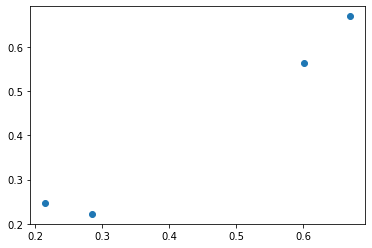

In [229]:
low_limit = -0.04
para_0 = []
para_1 = []
for i in optimizer_3.res:
    los = i['target']
    if los > low_limit:
        #print(i)
        #print("this is coordinate {0} {0} {1}; loss: {2} \n".format(i['params']['x'],i['params']['y'],los))
        para_0.append(i['params']['x_1'])
        para_1.append(i['params']['x_4'])
plt.scatter(para_0,para_1)     
plt.savefig("/home/jyb/lyt/filt_Zr12")

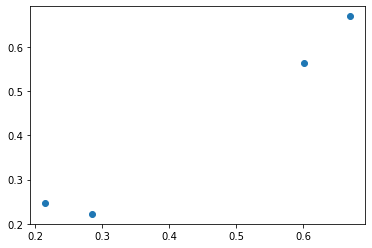

In [233]:
low_limit = -0.037
para_0 = []
para_1 = []
for i in optimizer_3.res:
    los = i['target']
    if los > low_limit:
        #print(i)
        #print("this is coordinate {0} {0} {1}; loss: {2} \n".format(i['params']['x'],i['params']['y'],los))
        para_0.append(i['params']['x_1'])
        para_1.append(i['params']['x_4'])
plt.scatter(para_0,para_1)     
plt.savefig("/home/jyb/lyt/filt_Zr12")